In [1]:
import os
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from datetime import date, timedelta
from scipy.stats import skew, kurtosis

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras import backend as K

2023-07-31 13:19:25.920573: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-31 13:19:26.057975: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-31 13:19:26.058001: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-07-31 13:19:26.636312: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
import pandas as pd
import json

with open("posts_with_newsURLs.json") as f:
    data = []
    for line in f:
        json_data = json.loads(line)
        data.append(json_data)

df = pd.DataFrame(data)

In [3]:
df.head()

_id   type         collected_on  \
0  {'$oid': '5b26afa37135690bc89ba801'}  posts  2018-04-08 15:55:33   
1  {'$oid': '5b26afa37135690bc89ba807'}  posts  2018-04-07 19:51:11   
2  {'$oid': '5b26afa37135690bc89ba819'}  posts  2018-04-29 21:39:32   
3  {'$oid': '5b26afa37135690bc89ba826'}  posts  2018-04-08 19:18:01   
4  {'$oid': '5b26afa37135690bc89ba848'}  posts  2018-04-29 23:20:12   

                                                data        id  
0  {'liked': False, 'revised_at': None, 'is_premi...  20077000  
1  {'liked': False, 'revised_at': None, 'is_premi...  20083000  
2  {'liked': False, 'revised_at': None, 'is_premi...  20102000  
3  {'liked': False, 'revised_at': None, 'is_premi...  20115000  
4  {'liked': False, 'revised_at': None, 'is_premi...  20152000

In [4]:
df_times=[]
df_body=[]

In [5]:
for i in df.index:
    df_times.append(df["data"][i]["created_at"])

In [6]:
for i in df.index:
    df_body.append(df["data"][i]["body"])

In [7]:
urls=[]

In [8]:
import re

In [9]:
for i in df_body:
    m=str(i)
    s=re.search("(?P<url>https?://[^\s]+)", m).group(0)
    urls.append(s)

In [10]:
print(len(urls))
print(len(df_times))


1345279
1345279


In [11]:
h={'TimeStamps':df_times,'urls':urls}

In [12]:
df_required=pd.DataFrame(h)

In [13]:
df_required['TimeStamps'] = pd.to_datetime(df_required['TimeStamps'])

In [14]:
df_required['urls'] = df_required['urls'].astype("string")

In [15]:
data2=pd.DataFrame(pd.read_excel("MediaBias.xlsx"))

In [16]:
data3 = data2[['Media source', 'URL', 'Political Leaning']].copy()

In [17]:
#SPLITTING THE ENTIRE DATASET OF MEDIABIAS INTO LEFT,CENTRE,RIGHT, LEFT LEANING, MIXED, RIGHT LEANING

In [18]:
left_media=[]
right_media=[]
centre_media=[]
left_leaning_media=[]
right_leaning_media=[]
mixed_media=[]

In [19]:
data3.rename(columns = {'Media source':'Media_source', 'Political Leaning':'Political_Leaning'}, inplace = True)
data3.Media_source = data3.Media_source.astype('string')
data3.Political_Leaning=data3.Political_Leaning.astype('string')
data3.URL=data3.URL.astype('string')

In [20]:
data3.dropna(inplace=True)

In [21]:
for ind in data3.index:
    if((data3['Political_Leaning'][ind]=="Left")):
        if(data3['Media_source'][ind] not in left_media):
            left_media.append(data3['Media_source'][ind])
    elif((data3['Political_Leaning'][ind]=="Right")):
        if(data3['Media_source'][ind] not in right_media):
            right_media.append(data3['Media_source'][ind])
    elif((data3['Political_Leaning'][ind]=="Center")):
        if(data3['Media_source'][ind] not in centre_media):
            centre_media.append(data3['Media_source'][ind])
    elif((data3['Political_Leaning'][ind]=="Left Lean")):
        if(data3['Media_source'][ind] not in left_leaning_media):
            left_leaning_media.append(data3['Media_source'][ind])
    elif((data3['Political_Leaning'][ind]=="Right Lean")):
        if(data3['Media_source'][ind] not in right_leaning_media):
            right_leaning_media.append(data3['Media_source'][ind])
    elif((data3['Political_Leaning'][ind]=="Mixed")):
        if(data3['Media_source'][ind] not in mixed_media):
            mixed_media.append(data3['Media_source'][ind])
     
        
            
        

In [22]:
print(len(mixed_media))

11


In [23]:
hashmap_media={}

In [24]:
for ind in data3.index:
    hashmap_media[data3['Media_source'][ind]]=data3['URL'][ind]

In [25]:
left_timestamps=[]
right_timestamps=[]
centre_timestamps=[]
left_leaning_timestamps =[]
right_leaning_timestamps=[]
mixed_timestamps =[]

In [26]:
import re

In [27]:
df_required.isnull().values.any()

False

In [28]:
df_required.dtypes

TimeStamps    datetime64[ns, UTC]
urls                       string
dtype: object

In [29]:
left_suburls=[]
right_suburls=[]
centre_suburls=[]
left_leaning_suburls =[]
right_leaning_suburls =[]
mixed_suburls =[]

In [30]:
for i in range(0,len(left_media)):
    if hashmap_media.get(left_media[i]) not in left_suburls:
        left_suburls.append(hashmap_media.get(left_media[i]))

In [31]:
for i in range(0,len(right_media)):
    if hashmap_media.get(right_media[i]) not in right_suburls:
        right_suburls.append(hashmap_media.get(right_media[i]))

In [32]:
for i in range(0,len(centre_media)):
    if hashmap_media.get(centre_media[i]) not in centre_suburls:
        centre_suburls.append(hashmap_media.get(centre_media[i]))

In [33]:
for i in range(0,len(left_leaning_media)):
    if hashmap_media.get(left_leaning_media[i]) not in left_leaning_suburls:
        left_leaning_suburls.append(hashmap_media.get(left_leaning_media[i]))

In [34]:
for i in range(0,len(right_leaning_media)):
    if hashmap_media.get(right_leaning_media[i]) not in right_leaning_suburls:
        right_leaning_suburls.append(hashmap_media.get(right_leaning_media[i]))

In [35]:
for i in range(0,len(mixed_media)):
    if hashmap_media.get(mixed_media[i]) not in mixed_suburls:
        mixed_suburls.append(hashmap_media.get(mixed_media[i]))

In [36]:
print(len(mixed_suburls))

11


In [37]:
left_timestamps=[]
right_timestamps=[]
centre_timestamps=[]
left_leaning_timestamps =[]
right_leaning_timestamps =[]
mixed_timestamps=[]


In [38]:
df_required.head()

TimeStamps                                               urls
0 2018-02-18 21:52:01+00:00  http://www.latimes.com/local/lanow/la-me-weins...
1 2018-02-19 00:17:25+00:00  http://dailycaller.com/2015/10/12/remember-the...
2 2018-02-19 10:02:34+00:00  https://www.leafly.com/news/health/a-guide-to-...
3 2018-02-19 16:25:48+00:00  http://www.foxnews.com/world/2018/02/18/iran-f...
4 2018-02-20 05:12:18+00:00  http://www.thegatewaypundit.com/2018/02/sarah-...

In [39]:
x=df_required[["TimeStamps","urls"]].to_numpy()

In [40]:
try_formats = [
    '%Y-%m-%d %H:%M:%S%z', 
    '%a %b %d %H:%M:%S %z %Y', 
    '%m/%d/%Y %H:%M:%S', 
]

In [41]:
from datetime import datetime

In [42]:
for y in x:
    for sub  in left_suburls:
        if y[1] is not np.nan:
            if sub in str(y[1]):
                y[0] = str(y[0])
                for format_string in try_formats:
                    try:
                        date_object = datetime.strptime(y[0], format_string)
                        #print(f"Format string: {format_string}")
                        break
                    except ValueError:
                        pass
                
                #y[0] = datetime.strptime(y[0], '%a %b %d %H:%M:%S %z %Y')
                left_timestamps.append(date_object.date())

In [43]:
for y in x:
    for sub  in centre_suburls:
        if y[1] is not np.nan:
            if sub in str(y[1]):
                y[0] = str(y[0])
                for format_string in try_formats:
                    try:
                        date_object = datetime.strptime(y[0], format_string)
                        #print(f"Format string: {format_string}")
                        break
                    except ValueError:
                        pass
                
                #y[0] = datetime.strptime(y[0], '%a %b %d %H:%M:%S %z %Y')
                centre_timestamps.append(date_object.date())

In [44]:
for y in x:
    for sub  in right_suburls:
        if y[1] is not np.nan:
            if sub in str(y[1]):
                y[0] = str(y[0])
                for format_string in try_formats:
                    try:
                        date_object = datetime.strptime(y[0], format_string)
                        #print(f"Format string: {format_string}")
                        break
                    except ValueError:
                        pass
                
                #y[0] = datetime.strptime(y[0], '%a %b %d %H:%M:%S %z %Y')
                right_timestamps.append(date_object.date())

In [45]:
for y in x:
    for sub  in left_leaning_suburls:
        if y[1] is not np.nan:
            if sub in str(y[1]):
                y[0] = str(y[0])
                for format_string in try_formats:
                    try:
                        date_object = datetime.strptime(y[0], format_string)
                        #print(f"Format string: {format_string}")
                        break
                    except ValueError:
                        pass
                
                #y[0] = datetime.strptime(y[0], '%a %b %d %H:%M:%S %z %Y')
                left_leaning_timestamps.append(date_object.date())

In [46]:
for y in x:
    for sub  in right_leaning_suburls:
        if y[1] is not np.nan:
            if sub in str(y[1]):
                y[0] = str(y[0])
                for format_string in try_formats:
                    try:
                        date_object = datetime.strptime(y[0], format_string)
                        #print(f"Format string: {format_string}")
                        break
                    except ValueError:
                        pass
                
                #y[0] = datetime.strptime(y[0], '%a %b %d %H:%M:%S %z %Y')
                right_leaning_timestamps.append(date_object.date())

In [47]:
for y in x:
    for sub  in mixed_suburls:
        if y[1] is not np.nan:
            if sub in str(y[1]):
                y[0] = str(y[0])
                for format_string in try_formats:
                    try:
                        date_object = datetime.strptime(y[0], format_string)
                        #print(f"Format string: {format_string}")
                        break
                    except ValueError:
                        pass
                
                #y[0] = datetime.strptime(y[0], '%a %b %d %H:%M:%S %z %Y')
                mixed_timestamps.append(date_object.date())

In [48]:
print(len(left_timestamps))
print(len(right_timestamps))
print(len(centre_timestamps))
print(len(left_leaning_timestamps))
print(len(right_leaning_timestamps))
print(len(mixed_timestamps))

29091
458616
97346
87951
150127
2


In [49]:
print(mixed_suburls)

['https://abridgenews.com/', 'https://www.allsides.com/unbiased-balanced-news', 'https://www.allsides.com/dictionary/community', 'https://braverangels.org/', 'http://www.counterpointing.com/', 'https://www.listenfirstproject.org', 'https://storycorps.org', 'http://suspendbeliefpodcast.com', 'https://www.theflipside.io/', 'https://lincolnproject.us/', 'https://news.yahoo.com/tagged/360/']


In [50]:
#Creating hashmap of frequency of tweets

In [51]:
df_left_timestamps=pd.DataFrame(left_timestamps)

In [52]:
df_left_timestamps['timestamps']=pd.DataFrame(left_timestamps)

In [53]:
df_left_timestamps.head()

0  timestamps
0  2018-02-19  2018-02-19
1  2018-02-22  2018-02-22
2  2018-02-20  2018-02-20
3  2018-02-21  2018-02-21
4  2018-02-19  2018-02-19

In [54]:
df_right_timestamps=pd.DataFrame(right_timestamps)

In [55]:
df_right_timestamps['timestamps']=pd.DataFrame(right_timestamps)

In [56]:
df_right_timestamps.head()

0  timestamps
0  2018-02-23  2018-02-23
1  2018-02-24  2018-02-24
2  2018-02-19  2018-02-19
3  2018-02-21  2018-02-21
4  2018-02-22  2018-02-22

In [57]:
df_centre_timestamps=pd.DataFrame(centre_timestamps)

In [58]:
df_centre_timestamps['timestamps']=pd.DataFrame(centre_timestamps)

In [59]:
df_centre_timestamps.head()

0  timestamps
0  2018-02-22  2018-02-22
1  2018-02-23  2018-02-23
2  2018-02-25  2018-02-25
3  2018-02-23  2018-02-23
4  2018-02-20  2018-02-20

In [60]:
df_left_leaning_timestamps=pd.DataFrame(left_leaning_timestamps)

In [61]:
df_left_leaning_timestamps['timestamps']=pd.DataFrame(left_leaning_timestamps)

In [62]:
df_left_leaning_timestamps.head()

0  timestamps
0  2018-02-21  2018-02-21
1  2018-02-23  2018-02-23
2  2018-02-24  2018-02-24
3  2018-02-19  2018-02-19
4  2018-02-25  2018-02-25

In [63]:
df_right_leaning_timestamps=pd.DataFrame(right_leaning_timestamps)


In [64]:
df_right_leaning_timestamps['timestamps']=pd.DataFrame(right_leaning_timestamps)

In [65]:
df_right_leaning_timestamps.head()

0  timestamps
0  2018-02-22  2018-02-22
1  2018-02-17  2018-02-17
2  2018-02-17  2018-02-17
3  2018-02-19  2018-02-19
4  2018-02-20  2018-02-20

In [66]:
left_timestamp_frequency={}
right_timestamp_frequency={}
centre_timestamp_frequency={}
left_leaning_timestamp_frequency={}
right_leaning_timestamp_frequency={}

In [67]:
for i in  df_left_timestamps.index :
    if df_left_timestamps['timestamps'][i] not in left_timestamp_frequency:
        left_timestamp_frequency[df_left_timestamps['timestamps'][i]]=1
    else:
        left_timestamp_frequency[df_left_timestamps['timestamps'][i]]+=1

In [68]:
for i in  df_right_timestamps.index :
    if df_right_timestamps['timestamps'][i] not in right_timestamp_frequency:
        right_timestamp_frequency[df_right_timestamps['timestamps'][i]]=1
    else:
        right_timestamp_frequency[df_right_timestamps['timestamps'][i]]+=1

In [69]:
for i in  df_centre_timestamps.index :
    if df_centre_timestamps['timestamps'][i] not in centre_timestamp_frequency:
        centre_timestamp_frequency[df_centre_timestamps['timestamps'][i]]=1
    else:
        centre_timestamp_frequency[df_centre_timestamps['timestamps'][i]]+=1

In [70]:
for i in  df_left_leaning_timestamps.index :
    if df_left_leaning_timestamps['timestamps'][i] not in left_leaning_timestamp_frequency:
        left_leaning_timestamp_frequency[df_left_leaning_timestamps['timestamps'][i]]=1
    else:
        left_leaning_timestamp_frequency[df_left_leaning_timestamps['timestamps'][i]]+=1

In [71]:
for i in  df_right_leaning_timestamps.index :
    if df_right_leaning_timestamps['timestamps'][i] not in right_leaning_timestamp_frequency:
        right_leaning_timestamp_frequency[df_right_leaning_timestamps['timestamps'][i]]=1
    else:
        right_leaning_timestamp_frequency[df_right_leaning_timestamps['timestamps'][i]]+=1

In [72]:
print(len(left_timestamp_frequency))
print(len(right_timestamp_frequency))
print(len(centre_timestamp_frequency))
print(len(left_leaning_timestamp_frequency))
print(len(right_leaning_timestamp_frequency))

301
301
301
301
301


In [73]:
#creating dataframes for models

In [74]:
l1=[]
l2=[]

In [75]:
for key in left_timestamp_frequency:
    l1.append(key)
    l2.append(left_timestamp_frequency[key])

In [76]:
l = {'Date':l1,'frequency':l2}
left_dataset=pd.DataFrame(l)

In [77]:
left_dataset.head()

Date  frequency
0  2018-02-19         52
1  2018-02-22        155
2  2018-02-20         76
3  2018-02-21        142
4  2018-02-23        131

In [78]:
left_dataset['Date'] = pd.to_datetime(left_dataset['Date'], format='%Y-%m-%d')
left_filtered=left_dataset.loc[(left_dataset['Date'] >= '2018-05-01') & (left_dataset['Date'] <= '2018-12-31')]
left_filtered=left_filtered.drop_duplicates()
print(left_filtered.size)

362


In [79]:
left_filtered.head()

Date  frequency
25 2018-05-01         77
27 2018-05-02         74
30 2018-05-03         96
90 2018-05-28         53
91 2018-05-29         83

In [80]:
r1=[]
r2=[]
for key in right_timestamp_frequency:
    r1.append(key)
    r2.append(right_timestamp_frequency[key])

In [81]:
r={'Date':r1,'frequency':r2}
right_dataset=pd.DataFrame(r)

In [82]:
right_dataset.head()

Date  frequency
0  2018-02-23        642
1  2018-02-24        585
2  2018-02-19        446
3  2018-02-21        572
4  2018-02-22        559

In [83]:
right_dataset['Date'] = pd.to_datetime(right_dataset['Date'], format='%Y-%m-%d')
right_filtered=right_dataset.loc[(right_dataset['Date'] >= '2018-05-01') & (right_dataset['Date'] <='2018-12-31')]
right_filtered=right_filtered.drop_duplicates()

In [84]:
right_filtered.head()

Date  frequency
29 2018-05-02        821
30 2018-05-03        749
31 2018-05-01        642
90 2018-05-29        727
91 2018-05-30        887

In [85]:
c1=[]
c2=[]
for key in centre_timestamp_frequency:
    c1.append(key)
    c2.append(centre_timestamp_frequency[key])


In [86]:
c={'Date':c1,'frequency':c2}
centre_dataset=pd.DataFrame(c)

In [87]:
centre_dataset.head()

Date  frequency
0  2018-02-22        315
1  2018-02-23        293
2  2018-02-25        174
3  2018-02-20        189
4  2018-02-18        129

In [88]:
centre_dataset['Date'] = pd.to_datetime(centre_dataset['Date'], format='%Y-%m-%d')
centre_filtered=centre_dataset.loc[(centre_dataset['Date'] >= '2018-05-01') & (centre_dataset['Date'] <= '2018-12-31')]
centre_filtered=centre_filtered.drop_duplicates()

In [89]:
print(centre_filtered.size)

362


In [90]:
ll1=[]
ll2=[]

In [91]:
for key in left_leaning_timestamp_frequency:
    ll1.append(key)
    ll2.append(left_leaning_timestamp_frequency[key])

In [92]:
ll = {'Date':ll1,'frequency':ll2}
left_leaning_dataset=pd.DataFrame(ll)

In [93]:
left_leaning_dataset.head()

Date  frequency
0  2018-02-21        194
1  2018-02-23        256
2  2018-02-24        180
3  2018-02-19        200
4  2018-02-25        195

In [94]:
left_leaning_dataset['Date'] = pd.to_datetime(left_leaning_dataset['Date'], format='%Y-%m-%d')
left_leaning_filtered=left_leaning_dataset.loc[(left_leaning_dataset['Date'] >= '2018-05-01') & (left_leaning_dataset['Date'] <= '2018-12-31')]
left_leaning_filtered=left_leaning_filtered.drop_duplicates()
print(left_leaning_filtered.size)

362


In [95]:
left_leaning_filtered.head()

Date  frequency
28 2018-05-01        334
31 2018-05-03        278
33 2018-05-02        243
90 2018-05-30        231
91 2018-06-04        298

In [96]:
rl1=[]
rl2=[]

In [97]:
for key in right_leaning_timestamp_frequency:
    rl1.append(key)
    rl2.append(right_leaning_timestamp_frequency[key])

In [98]:
rl = {'Date':rl1,'frequency':rl2}
right_leaning_dataset=pd.DataFrame(rl)

In [99]:
right_leaning_dataset.head()

Date  frequency
0  2018-02-22        375
1  2018-02-17        303
2  2018-02-19        351
3  2018-02-20        321
4  2018-02-24        312

In [100]:
right_leaning_dataset['Date'] = pd.to_datetime(right_leaning_dataset['Date'], format='%Y-%m-%d')
right_leaning_filtered=right_leaning_dataset.loc[(right_leaning_dataset['Date'] >= '2018-05-01') & (right_leaning_dataset['Date'] <= '2018-12-31')]
right_leaning_filtered=right_leaning_filtered.drop_duplicates()


In [101]:
right_leaning_filtered.head()

Date  frequency
27 2018-05-02        496
28 2018-05-03        525
31 2018-05-01        439
90 2018-05-29        446
91 2018-05-30        491

In [102]:
print(right_leaning_filtered.size)

362


In [103]:
print(right_filtered.size)

362


In [104]:
print(left_filtered.size)

362


In [105]:
#multiple line plots

In [106]:

merged_df = pd.merge(left_filtered, right_filtered, on='Date', how='inner')
merged_df = pd.merge(merged_df, centre_filtered, on='Date', how='inner')
merged_df = pd.merge(merged_df, left_leaning_filtered, on='Date', how='inner')
merged_df = pd.merge(merged_df, right_leaning_filtered, on='Date', how='inner')


merged_df.columns = ['Date', 'left_gab_posts_frequency', 'right_gab_posts_frequency', 'centre_gab_posts_frequency', 'left_leaning_gab_posts_frequency', 'right_leaning_gab_posts_frequency']


merged_df['Date'] = pd.to_datetime(merged_df['Date'])


#merged_df.set_index('timestamp', inplace=True)


/tmp/ipykernel_863623/2731698423.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'frequency_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = pd.merge(merged_df, left_leaning_filtered, on='Date', how='inner')


In [107]:
merged_df

Date  left_gab_posts_frequency  right_gab_posts_frequency  \
0   2018-05-01                        77                        642   
1   2018-05-02                        74                        821   
2   2018-05-03                        96                        749   
3   2018-05-28                        53                        645   
4   2018-05-29                        83                        727   
..         ...                       ...                        ...   
176 2018-10-20                       114                       3379   
177 2018-10-25                       125                       3915   
178 2018-10-27                       105                       3092   
179 2018-10-26                       112                       3509   
180 2018-10-28                        69                       1024   

     centre_gab_posts_frequency  left_leaning_gab_posts_frequency  \
0                           286                               334   
1                           241                               243   
2                           269                               278   
3                           145                               254   
4                           229                               267   
..                          ...                               ...   
176                         420                               328   
177                         610                               432   
178                         550                               408   
179                         504                               451   
180                         161                               171   

     right_leaning_gab_posts_frequency  
0                                  439  
1                                  496  
2                                  525  
3                                  615  
4                                  446  
..                                 ...  
176                                556  
177                                685  
178                                523  
179                                600  
180                                221  

[181 rows x 6 columns]

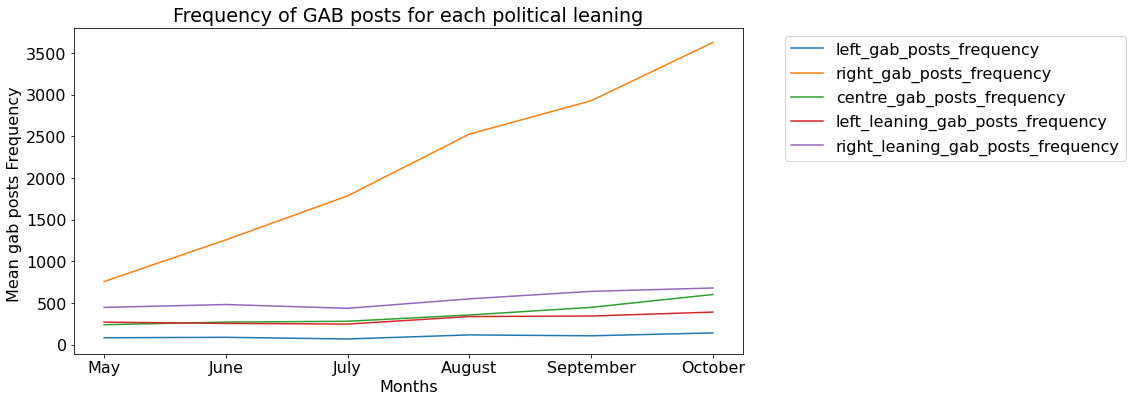

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar


merged_df['month'] = merged_df['Date'].dt.month
#merged_df['month'] = merged_df['month'].apply(lambda x: calendar.month_abbr[x])
#merged_df = merged_df.sort_values('month')

# Group the data by month and calculate the average frequency for each variable

monthly_freq = merged_df.groupby('month').mean()

plt.figure(figsize=(12, 6))
plt.rcParams['font.size'] = '16'
# Create a line plot for each variable
variables = ['left_gab_posts_frequency', 'right_gab_posts_frequency', 'centre_gab_posts_frequency', 'left_leaning_gab_posts_frequency', 'right_leaning_gab_posts_frequency']
for var in variables:
    plt.plot(monthly_freq.index, monthly_freq[var], label=var)
    
month_names = ["May","June","July","August","September","October"]
plt.xticks(monthly_freq.index, month_names)

# Add labels and title
plt.xlabel('Months')
plt.ylabel('Mean gab posts Frequency ')
plt.title('Frequency of GAB posts for each political leaning')

# Add a legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()


In [109]:
#SARIMAX PREDICTION

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [111]:
from datetime import datetime

In [112]:
left_filtered['Date']=pd.to_datetime(left_filtered['Date'])
left_filtered.set_index('Date', inplace=True)
#check datatype of index
left_filtered.index      

DatetimeIndex(['2018-05-01', '2018-05-02', '2018-05-03', '2018-05-28',
               '2018-05-29', '2018-06-02', '2018-05-30', '2018-06-04',
               '2018-06-01', '2018-06-05',
               ...
               '2018-10-19', '2018-10-21', '2018-10-24', '2018-10-23',
               '2018-10-22', '2018-10-20', '2018-10-25', '2018-10-27',
               '2018-10-26', '2018-10-28'],
              dtype='datetime64[ns]', name='Date', length=181, freq=None)

In [113]:
left_ts = left_filtered['frequency']
left_ts.head(10)

Date
2018-05-01     77
2018-05-02     74
2018-05-03     96
2018-05-28     53
2018-05-29     83
2018-06-02     60
2018-05-30     61
2018-06-04     68
2018-06-01    121
2018-06-05     78
Name: frequency, dtype: int64

In [114]:
left_ts=left_ts.sort_index(ascending=True)

In [115]:
from statsmodels.tsa.stattools import adfuller
def check_stationarity(ts):
    dftest = adfuller(ts)
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    if (pvalue < 0.05) and (adf < critical_value):      #here we are defining a function that uses Dicky fuller method and prints the results based on pvalue and test static value
        print('The series is stationary')
    else:
        print('The series is NOT stationary')

In [116]:
check_stationarity(left_ts)

The series is stationary


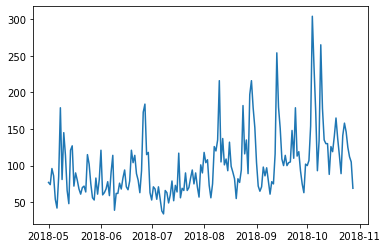

In [117]:
plt.plot(left_ts)

In [118]:
from IPython.display import display

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from time import time
import seaborn as sns
sns.set(style="whitegrid")

import warnings

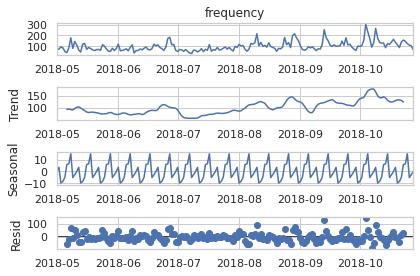

In [119]:
result = seasonal_decompose(left_ts,model='additive',period=10)      #applied seasonal decomposition to get trend and seasons.
fig = result.plot()

/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


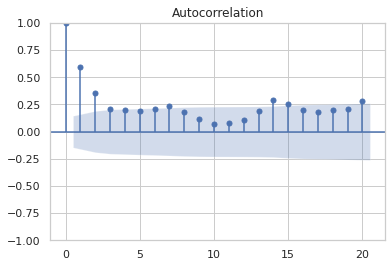

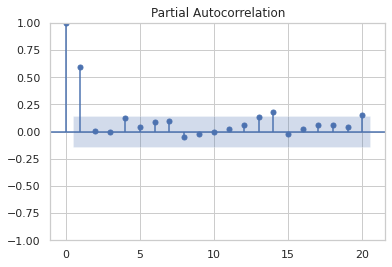

In [120]:
plot_acf(left_ts, lags=20);
plot_pacf(left_ts, lags=20);  #getting order of Auto regression (p) and getting number of forecast errors(q) to specify for the model.
                         #p is point where acf increased significantly, it can be any points but in our graph we get increasing trend at 0.


In [121]:
import time

In [122]:
start_time1 = time.time()
sarima = SARIMAX(left_ts, order=(7,1,10), seasonal_order=(3,1,1,14))
sarima_predictions = sarima.fit().predict()                            #Links to get SARIMAX parameters :- https://machinelearningmastery.com/how-to-grid-search-sarima-model-hyperparameters-for-time-series-forecasting-in-python/
                                                                       #https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/
                                                                       #https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/

/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           22     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.68330D+00    |proj g|=  4.85815D-02


 This problem is unconstrained.



At iterate    5    f=  4.67410D+00    |proj g|=  1.57155D-02

At iterate   10    f=  4.66947D+00    |proj g|=  1.14528D-02

At iterate   15    f=  4.66535D+00    |proj g|=  2.58922D-02

At iterate   20    f=  4.64672D+00    |proj g|=  1.59975D-01

At iterate   25    f=  4.63718D+00    |proj g|=  4.03208D-02

At iterate   30    f=  4.62578D+00    |proj g|=  7.17894D-02

At iterate   35    f=  4.61887D+00    |proj g|=  1.55173D-01

At iterate   40    f=  4.61003D+00    |proj g|=  2.63787D-01

At iterate   45    f=  4.60402D+00    |proj g|=  4.71601D-02

At iterate   50    f=  4.59531D+00    |proj g|=  1.91541D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [123]:
print(f"the time of execution of Sarima for left twweets in seconds is {time.time() - start_time1}")

the time of execution of Sarima for left twweets in seconds is 131.9826774597168


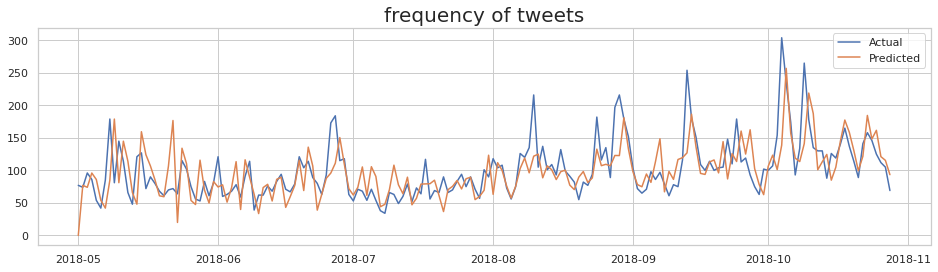

In [124]:
plt.figure(figsize=(16,4))
plt.plot(left_ts, label="Actual")
plt.plot(sarima_predictions, label="Predicted")
plt.title('frequency of tweets', fontsize=20)
#plt.ylabel('Sales', fontsize=16)
plt.legend()

In [125]:
print('RMSE OF SARIMA OF LEFT TWEETS: %.4f'%np.sqrt(sum((left_ts-sarima_predictions)**2)/(len(left_ts))))

RMSE OF SARIMA OF LEFT TWEETS: 37.0040


In [126]:
#right tweets prediction

In [127]:
right_filtered['Date']=pd.to_datetime(right_filtered['Date'])
right_filtered.set_index('Date', inplace=True)
#check datatype of index
right_filtered.index   

DatetimeIndex(['2018-05-02', '2018-05-03', '2018-05-01', '2018-05-29', '2018-05-30', '2018-05-31', '2018-06-01', '2018-06-02', '2018-06-03', '2018-06-04',
               ...
               '2018-10-19', '2018-10-20', '2018-10-21', '2018-10-22', '2018-10-24', '2018-10-25', '2018-10-23', '2018-10-27', '2018-10-26', '2018-10-28'], dtype='datetime64[ns]', name='Date', length=181, freq=None)

In [128]:
right_ts = right_filtered['frequency']
right_ts.head(10)

Date
2018-05-02     821
2018-05-03     749
2018-05-01     642
2018-05-29     727
2018-05-30     887
2018-05-31     860
2018-06-01    1381
2018-06-02    1114
2018-06-03    1080
2018-06-04    1285
Name: frequency, dtype: int64

In [129]:
right_ts=right_ts.sort_index(ascending=True)

In [130]:
check_stationarity(right_ts)

The series is NOT stationary


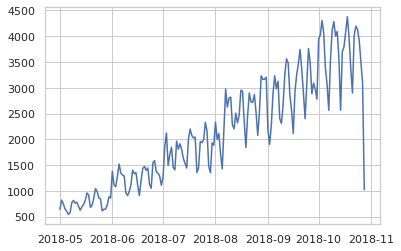

In [131]:
plt.plot(right_ts)

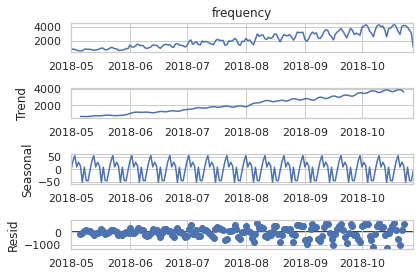

In [132]:
result = seasonal_decompose(right_ts,model='additive',period=10)      #applied seasonal decomposition to get trend and seasons.
fig = result.plot()

/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


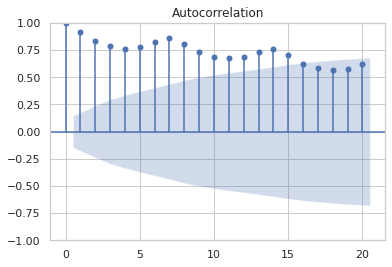

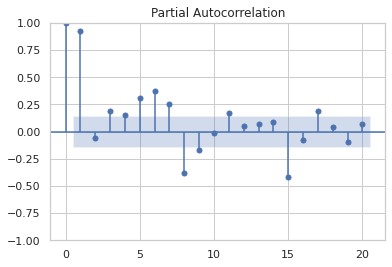

In [133]:
plot_acf(right_ts, lags=20);
plot_pacf(right_ts, lags=20); 

In [134]:
start_time2 = time.time()
sarima = SARIMAX(right_ts, order=(6,2,10), seasonal_order=(4,1,1,11))
sarima_predictions = sarima.fit().predict()                            #Links to get SARIMAX parameters :- https://machinelearningmastery.com/how-to-grid-search-sarima-model-hyperparameters-for-time-series-forecasting-in-python/
                                            

/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           22     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.76302D+00    |proj g|=  2.28643D-01


 This problem is unconstrained.



At iterate    5    f=  6.70790D+00    |proj g|=  2.13890D-01

At iterate   10    f=  6.69046D+00    |proj g|=  1.95582D-02

At iterate   15    f=  6.68390D+00    |proj g|=  2.56469D-02

At iterate   20    f=  6.67991D+00    |proj g|=  1.39692D-02

At iterate   25    f=  6.67758D+00    |proj g|=  3.31879D-02

At iterate   30    f=  6.67640D+00    |proj g|=  1.04852D-02

At iterate   35    f=  6.67500D+00    |proj g|=  8.05039D-03

At iterate   40    f=  6.67370D+00    |proj g|=  6.29728D-02

At iterate   45    f=  6.67208D+00    |proj g|=  4.04359D-02


/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  6.67023D+00    |proj g|=  5.14426D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   22     50     55      1     0     0   5.144D-02   6.670D+00
  F =   6.6702288814324362     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


In [135]:
print(f"the time of execution of Sarima for right tweets in seconds is {time.time() - start_time2}")

the time of execution of Sarima for right tweets in seconds is 43.67947173118591


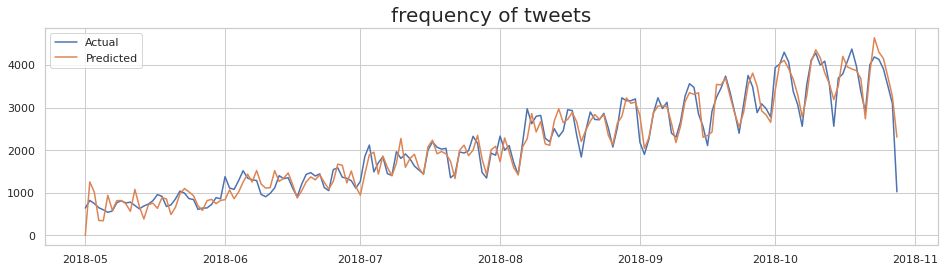

In [136]:
plt.figure(figsize=(16,4))
plt.plot(right_ts, label="Actual")
plt.plot(sarima_predictions, label="Predicted")
plt.title('frequency of tweets', fontsize=20)
#plt.ylabel('Sales', fontsize=16)
plt.legend()

In [137]:
print('RMSE OF SARIMA OF RIGHT TWEETS: %.4f'%np.sqrt(sum((right_ts-sarima_predictions)**2)/(len(right_ts))))

RMSE OF SARIMA OF RIGHT TWEETS: 263.4067


In [138]:
#centre data predictions

In [139]:
centre_filtered['Date']=pd.to_datetime(centre_filtered['Date'])
centre_filtered.set_index('Date', inplace=True)
#check datatype of index
centre_filtered.index 

DatetimeIndex(['2018-05-01', '2018-05-02', '2018-05-03', '2018-05-31', '2018-05-29', '2018-06-04', '2018-06-03', '2018-05-30', '2018-06-01', '2018-06-05',
               ...
               '2018-10-19', '2018-10-20', '2018-10-21', '2018-10-24', '2018-10-22', '2018-10-23', '2018-10-25', '2018-10-28', '2018-10-26', '2018-10-27'], dtype='datetime64[ns]', name='Date', length=181, freq=None)

In [140]:
centre_ts = centre_filtered['frequency']
centre_ts.head(10)

Date
2018-05-01    286
2018-05-02    241
2018-05-03    269
2018-05-31    303
2018-05-29    229
2018-06-04    353
2018-06-03    229
2018-05-30    250
2018-06-01    253
2018-06-05    315
Name: frequency, dtype: int64

In [141]:
centre_ts=centre_ts.sort_index(ascending=True)

In [142]:
check_stationarity(centre_ts)

The series is NOT stationary


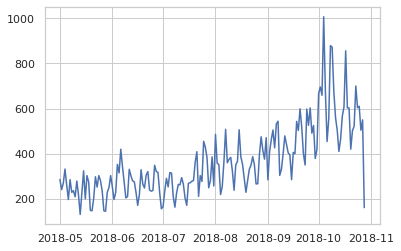

In [143]:
plt.plot(centre_ts)

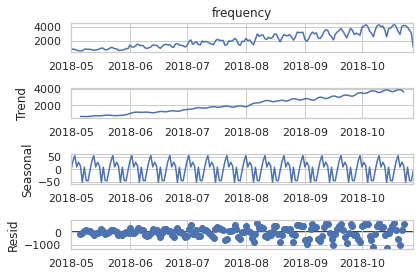

In [144]:
result = seasonal_decompose(right_ts,model='additive',period=10)      #applied seasonal decomposition to get trend and seasons.
fig = result.plot()

/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


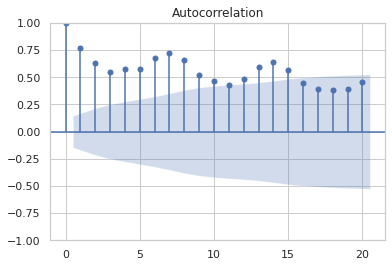

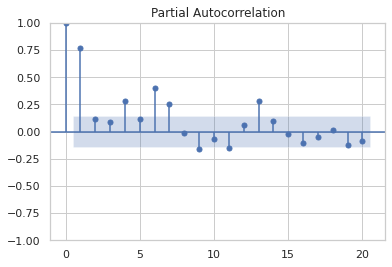

In [145]:
plot_acf(centre_ts, lags=20);
plot_pacf(centre_ts, lags=20); 

In [146]:
start_time3 = time.time()
sarima = SARIMAX(centre_ts, order=(11,1,10), seasonal_order=(2,1,1,14))
sarima_predictions = sarima.fit().predict()    

/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.40315D+00    |proj g|=  1.78127D-01


 This problem is unconstrained.



At iterate    5    f=  5.35753D+00    |proj g|=  3.47139D-02

At iterate   10    f=  5.34872D+00    |proj g|=  4.05070D-02

At iterate   15    f=  5.33589D+00    |proj g|=  2.78696D-02

At iterate   20    f=  5.33208D+00    |proj g|=  3.97238D-02

At iterate   25    f=  5.33073D+00    |proj g|=  3.18161D-02

At iterate   30    f=  5.32948D+00    |proj g|=  1.28146D-02

At iterate   35    f=  5.32814D+00    |proj g|=  8.73993D-03

At iterate   40    f=  5.32750D+00    |proj g|=  7.87249D-03

At iterate   45    f=  5.32645D+00    |proj g|=  6.60205D-03

At iterate   50    f=  5.32544D+00    |proj g|=  6.95254D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [147]:
print(f"the time of execution of Sarima for centre tweets in seconds is {time.time() - start_time3}")

the time of execution of Sarima for centre tweets in seconds is 40.61975884437561


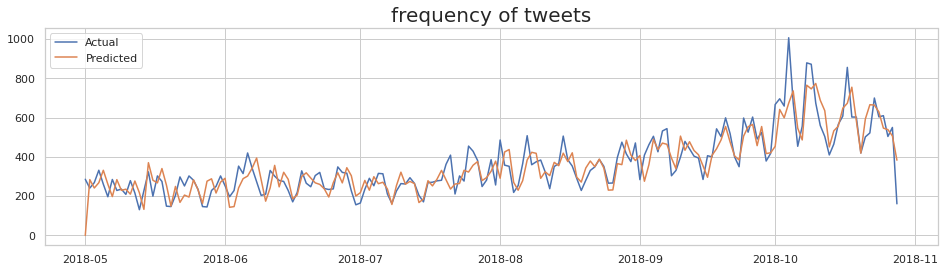

In [148]:
plt.figure(figsize=(16,4))
plt.plot(centre_ts, label="Actual")
plt.plot(sarima_predictions, label="Predicted")
plt.title('frequency of tweets', fontsize=20)
#plt.ylabel('Sales', fontsize=16)
plt.legend()

In [149]:
print('RMSE OF SARIMA OF CENTRE TWEETS: %.4f'%np.sqrt(sum((centre_ts-sarima_predictions)**2)/(len(centre_ts))))

RMSE OF SARIMA OF CENTRE TWEETS: 78.1278


In [150]:
#Left leaning tweets prediction

In [151]:
left_leaning_filtered['Date']=pd.to_datetime(left_leaning_filtered['Date'])
left_leaning_filtered.set_index('Date', inplace=True)
#check datatype of index
left_leaning_filtered.index  

DatetimeIndex(['2018-05-01', '2018-05-03', '2018-05-02', '2018-05-30', '2018-06-04', '2018-05-28', '2018-05-31', '2018-06-01', '2018-06-02', '2018-06-03',
               ...
               '2018-10-19', '2018-10-20', '2018-10-21', '2018-10-24', '2018-10-23', '2018-10-22', '2018-10-25', '2018-10-27', '2018-10-26', '2018-10-28'], dtype='datetime64[ns]', name='Date', length=181, freq=None)

In [152]:
left_leaning_ts = left_leaning_filtered['frequency']
left_leaning_ts.head(10)

Date
2018-05-01    334
2018-05-03    278
2018-05-02    243
2018-05-30    231
2018-06-04    298
2018-05-28    254
2018-05-31    272
2018-06-01    282
2018-06-02    236
2018-06-03    254
Name: frequency, dtype: int64

In [153]:
left_leaning_ts=left_leaning_ts.sort_index(ascending=True)

In [154]:
check_stationarity(left_leaning_ts)

The series is NOT stationary


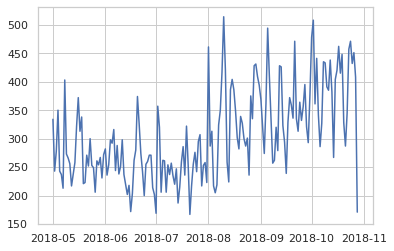

In [155]:
plt.plot(left_leaning_ts)

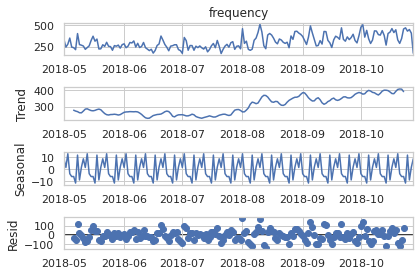

In [156]:
result = seasonal_decompose(left_leaning_ts,model='additive',period=10)      #applied seasonal decomposition to get trend and seasons.
fig = result.plot()

/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


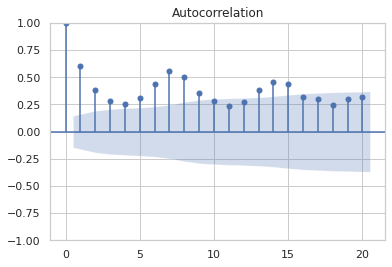

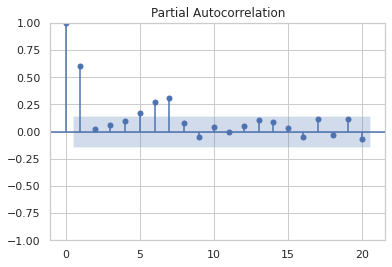

In [157]:
plot_acf(left_leaning_ts, lags=20);
plot_pacf(left_leaning_ts, lags=20);  #getting order of Auto regression (p) and getting number of forecast errors(q) to specify for the model.
                         #p is point where acf increased significantly, it can be any points but in our graph we get increasing trend at 0.


In [158]:
start_time1 = time.time()
sarima = SARIMAX(left_leaning_ts, order=(7,1,10), seasonal_order=(3,1,1,14))
sarima_predictions = sarima.fit().predict()                            #Links to get SARIMAX parameters :- https://machinelearningmastery.com/how-to-grid-search-sarima-model-hyperparameters-for-time-series-forecasting-in-python/
                                                                       #https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/
                                                                       

/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           22     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.14730D+00    |proj g|=  5.88098D-02

At iterate    5    f=  5.13240D+00    |proj g|=  9.89045D-03

At iterate   10    f=  5.11989D+00    |proj g|=  3.12909D-02

At iterate   15    f=  5.11204D+00    |proj g|=  3.86761D-02

At iterate   20    f=  5.10948D+00    |proj g|=  2.81280D-02

At iterate   25    f=  5.10445D+00    |proj g|=  6.41274D-02

At iterate   30    f=  5.10041D+00    |proj g|=  3.53908D-02

At iterate   35    f=  5.09800D+00    |proj g|=  1.67765D-02

At iterate   40    f=  5.09295D+00    |proj g|=  8.41679D-02

At iterate   45    f=  5.08943D+00    |proj g|=  1.09825D-01

At iterate   50    f=  5.08483D+00    |proj g|=  7.04927D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [159]:
print(f"the time of execution of Sarima for left leaning twweets in seconds is {time.time() - start_time1}")

the time of execution of Sarima for left leaning twweets in seconds is 93.87336039543152


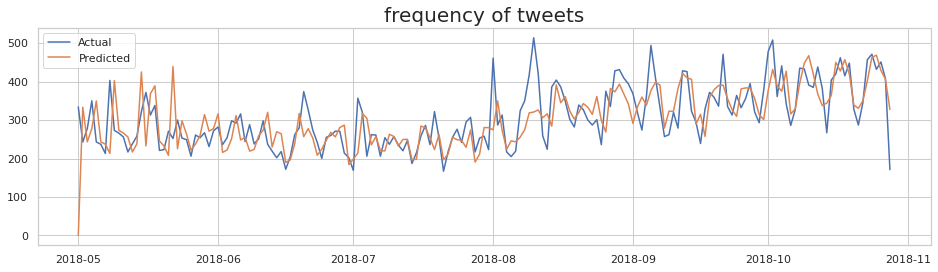

In [160]:
plt.figure(figsize=(16,4))
plt.plot(left_leaning_ts, label="Actual")
plt.plot(sarima_predictions, label="Predicted")
plt.title('frequency of tweets', fontsize=20)
#plt.ylabel('Sales', fontsize=16)
plt.legend()

In [161]:
print('RMSE OF SARIMA OF LEFT LEANING TWEETS: %.4f'%np.sqrt(sum((left_leaning_ts-sarima_predictions)**2)/(len(left_leaning_ts))))

RMSE OF SARIMA OF LEFT LEANING TWEETS: 63.9004


In [162]:
#right leaning tweets prediction

In [163]:
right_leaning_filtered['Date']=pd.to_datetime(right_leaning_filtered['Date'])
right_leaning_filtered.set_index('Date', inplace=True)
#check datatype of index
right_leaning_filtered.index 

DatetimeIndex(['2018-05-02', '2018-05-03', '2018-05-01', '2018-05-29', '2018-05-30', '2018-06-01', '2018-05-31', '2018-05-28', '2018-06-03', '2018-06-04',
               ...
               '2018-10-19', '2018-10-20', '2018-10-21', '2018-10-25', '2018-10-24', '2018-10-23', '2018-10-22', '2018-10-28', '2018-10-26', '2018-10-27'], dtype='datetime64[ns]', name='Date', length=181, freq=None)

In [164]:
right_leaning_ts = right_leaning_filtered['frequency']
right_leaning_ts.head(10)

Date
2018-05-02    496
2018-05-03    525
2018-05-01    439
2018-05-29    446
2018-05-30    491
2018-06-01    501
2018-05-31    453
2018-05-28    615
2018-06-03    394
2018-06-04    521
Name: frequency, dtype: int64

In [165]:
right_leaning_ts=right_leaning_ts.sort_index(ascending=True)

In [166]:
check_stationarity(right_leaning_ts)

The series is NOT stationary


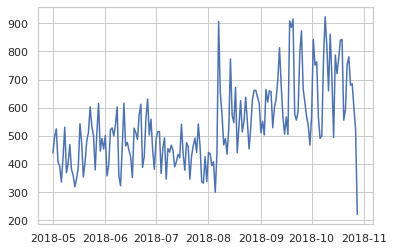

In [167]:
plt.plot(right_leaning_ts)

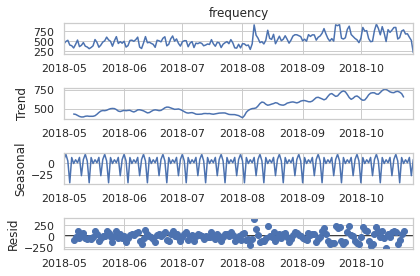

In [168]:
result = seasonal_decompose(right_leaning_ts,model='additive',period=10)      #applied seasonal decomposition to get trend and seasons.
fig = result.plot()

/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


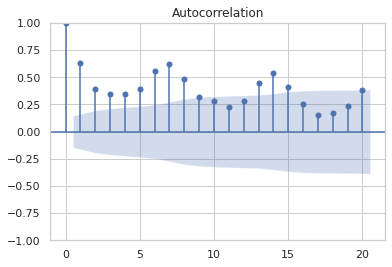

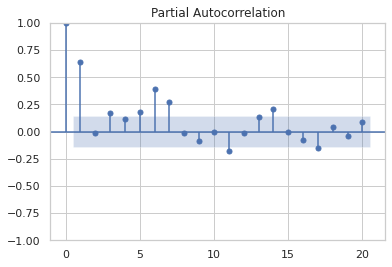

In [169]:
plot_acf(right_leaning_ts, lags=20);
plot_pacf(right_leaning_ts, lags=20);  #getting order of Auto regression (p) and getting number of forecast errors(q) to specify for the model.
                         #p is point where acf increased significantly, it can be any points but in our graph we get increasing trend at 0.


In [170]:
start_time1 = time.time()
sarima = SARIMAX(right_leaning_ts, order=(6,2,10), seasonal_order=(4,1,1,14))
sarima_predictions = sarima.fit().predict()                            #Links to get SARIMAX parameters :- https://machinelearningmastery.com/how-to-grid-search-sarima-model-hyperparameters-for-time-series-forecasting-in-python/
                                                                       #https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/

/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           22     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.67874D+00    |proj g|=  6.29843D-01


 This problem is unconstrained.



At iterate    5    f=  5.49684D+00    |proj g|=  7.35920D-02

At iterate   10    f=  5.48812D+00    |proj g|=  2.27118D-02

At iterate   15    f=  5.48269D+00    |proj g|=  2.49935D-02

At iterate   20    f=  5.47573D+00    |proj g|=  2.10718D-02

At iterate   25    f=  5.47255D+00    |proj g|=  8.01965D-03

At iterate   30    f=  5.47039D+00    |proj g|=  1.42886D-02

At iterate   35    f=  5.46811D+00    |proj g|=  9.15403D-03

At iterate   40    f=  5.46704D+00    |proj g|=  8.70070D-03

At iterate   45    f=  5.46621D+00    |proj g|=  1.65634D-02

At iterate   50    f=  5.46496D+00    |proj g|=  3.91910D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [171]:
print(f"the time of execution of Sarima for right leaning twweets in seconds is {time.time() - start_time1}")

the time of execution of Sarima for right leaning twweets in seconds is 152.97795844078064


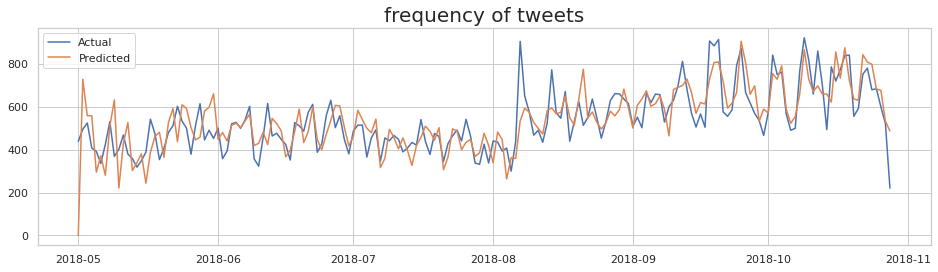

In [172]:
plt.figure(figsize=(16,4))
plt.plot(right_leaning_ts, label="Actual")
plt.plot(sarima_predictions, label="Predicted")
plt.title('frequency of tweets', fontsize=20)
#plt.ylabel('Sales', fontsize=16)
plt.legend()

In [173]:
print('RMSE OF SARIMA OF RIGHT LEANING TWEETS: %.4f'%np.sqrt(sum((right_leaning_ts-sarima_predictions)**2)/(len(right_leaning_ts))))

RMSE OF SARIMA OF RIGHT LEANING TWEETS: 98.6647


In [174]:
# LSTM For 1 day lookback and forecasting 1 day.

In [175]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from pandas import read_csv

In [176]:
dataset=left_ts

In [177]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.values.reshape(-1,1))
train_size = int(len(dataset) * 0.8)   #splitting the dataset into 67 and 33 percent.
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

144 37


In [178]:
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):   #The function takes two arguments: the dataset, which is a NumPy array that we want to convert into a dataset, 
  #and the look_back, which is the number of previous time steps to use as input variables to predict the next time period — in this case defaulted to 1.
#This default will create a dataset where X is the number of passengers at a given time (t) and Y is the number of passengers at the next time (t + 1).
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [179]:
look_back = 1
trainX, trainY = create_dataset(train, look_back) #converting as above mentioned function for training and testing.
testX, testY = create_dataset(test, look_back)
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))     

In [180]:
start_time4 = time.time()
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back))) #4 are the hidden LSTM blocks and 1 input layer as visible.
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
#K.set_value(model.optimizer.learning_rate, 0.01)
model.fit(trainX, trainY, epochs=200, batch_size=4, verbose=2) #training the data with epochs=100,batch size=1;

2023-07-31 10:54:20.079428: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-31 10:54:20.079499: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-07-31 10:54:20.079541: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-07-31 10:54:20.079601: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2023-07-31 10:54:20.079645: W tensorfl

Epoch 1/200
36/36 - 2s - loss: 0.0539 - 2s/epoch - 51ms/step
Epoch 2/200
36/36 - 0s - loss: 0.0362 - 45ms/epoch - 1ms/step
Epoch 3/200
36/36 - 0s - loss: 0.0260 - 43ms/epoch - 1ms/step
Epoch 4/200
36/36 - 0s - loss: 0.0205 - 40ms/epoch - 1ms/step
Epoch 5/200
36/36 - 0s - loss: 0.0182 - 39ms/epoch - 1ms/step
Epoch 6/200
36/36 - 0s - loss: 0.0176 - 39ms/epoch - 1ms/step
Epoch 7/200
36/36 - 0s - loss: 0.0172 - 39ms/epoch - 1ms/step
Epoch 8/200
36/36 - 0s - loss: 0.0171 - 40ms/epoch - 1ms/step
Epoch 9/200
36/36 - 0s - loss: 0.0170 - 39ms/epoch - 1ms/step
Epoch 10/200
36/36 - 0s - loss: 0.0168 - 39ms/epoch - 1ms/step
Epoch 11/200
36/36 - 0s - loss: 0.0166 - 39ms/epoch - 1ms/step
Epoch 12/200
36/36 - 0s - loss: 0.0166 - 39ms/epoch - 1ms/step
Epoch 13/200
36/36 - 0s - loss: 0.0163 - 39ms/epoch - 1ms/step
Epoch 14/200
36/36 - 0s - loss: 0.0162 - 40ms/epoch - 1ms/step
Epoch 15/200
36/36 - 0s - loss: 0.0161 - 40ms/epoch - 1ms/step
Epoch 16/200
36/36 - 0s - loss: 0.0159 - 39ms/epoch - 1ms/step
Ep

In [181]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4)                 96        
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [182]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

2/2 [==============================] - 0s 1ms/step


In [183]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])              #Note that we invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data (thousands of passengers per month).
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [184]:
print(f"the time of execution of LSTM for 1 day lookback for left twweets in seconds is{time.time() - start_time4}")

the time of execution of LSTM for 1 day lookback for left twweets in seconds is11.678313493728638


In [185]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score RMSE OF LEFT TWEETS: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score RMSE OF LEFT TWEETS: %.2f RMSE' % (testScore))

Train Score RMSE OF LEFT TWEETS: 31.98 RMSE
Test Score RMSE OF LEFT TWEETS: 47.92 RMSE


In [186]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)         
trainPredictPlot[:, :] = numpy.nan                                              #Because of how the dataset was prepared, we must shift the predictions so that they align on the x-axis with the original dataset. 
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

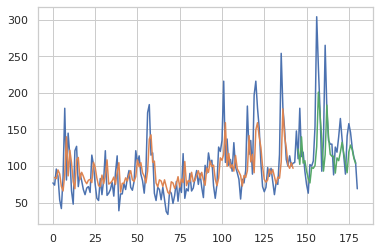

In [187]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot) #red is training data, green is testing data, blue is orginal dataset.
plt.plot(testPredictPlot)  #https://www.applause.com/blog/training-data-validation-data-vs-test-data(differences between training data, test dataset)
plt.show()

In [188]:
#LSTM 1 day lookback predicitng right tweets

In [189]:
dataset=right_ts

In [190]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.values.reshape(-1,1))  

In [191]:
train_size = int(len(dataset) * 0.8)   #splitting the dataset into 67 and 33 percent.
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

144 37


In [192]:
look_back = 1
trainX, trainY = create_dataset(train, look_back) #converting as above mentioned function for training and testing.
testX, testY = create_dataset(test, look_back)

In [193]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1])) 

In [194]:
start_time6 = time.time()
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back))) #4 are the hidden LSTM blocks and 1 input layer as visible.
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='RMSProp')
model.fit(trainX, trainY, epochs=100, batch_size=2, verbose=2) #training the data with epochs=100,batch size=1;

Epoch 1/100
71/71 - 1s - loss: 0.1343 - 1s/epoch - 18ms/step
Epoch 2/100
71/71 - 0s - loss: 0.0829 - 64ms/epoch - 899us/step
Epoch 3/100
71/71 - 0s - loss: 0.0540 - 60ms/epoch - 852us/step
Epoch 4/100
71/71 - 0s - loss: 0.0429 - 59ms/epoch - 837us/step
Epoch 5/100
71/71 - 0s - loss: 0.0390 - 60ms/epoch - 841us/step
Epoch 6/100
71/71 - 0s - loss: 0.0363 - 60ms/epoch - 842us/step
Epoch 7/100
71/71 - 0s - loss: 0.0338 - 60ms/epoch - 844us/step
Epoch 8/100
71/71 - 0s - loss: 0.0316 - 60ms/epoch - 843us/step
Epoch 9/100
71/71 - 0s - loss: 0.0293 - 60ms/epoch - 842us/step
Epoch 10/100
71/71 - 0s - loss: 0.0272 - 60ms/epoch - 846us/step
Epoch 11/100
71/71 - 0s - loss: 0.0251 - 61ms/epoch - 856us/step
Epoch 12/100
71/71 - 0s - loss: 0.0229 - 60ms/epoch - 846us/step
Epoch 13/100
71/71 - 0s - loss: 0.0209 - 60ms/epoch - 844us/step
Epoch 14/100
71/71 - 0s - loss: 0.0189 - 60ms/epoch - 841us/step
Epoch 15/100
71/71 - 0s - loss: 0.0171 - 60ms/epoch - 848us/step
Epoch 16/100
71/71 - 0s - loss: 0.015

In [195]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 4)                 96        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [196]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

2/2 [==============================] - 0s 1ms/step


In [197]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])              #Note that we invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data (thousands of passengers per month).
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [198]:
print(f"the time of execution of LSTM for right tweets in seconds is {time.time() - start_time6}")

the time of execution of LSTM for right tweets in seconds is 7.966671466827393


In [199]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score RMSE OF right tweets: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score RMSE OF right tweets: %.2f RMSE' % (testScore))

Train Score RMSE OF right tweets: 319.89 RMSE
Test Score RMSE OF right tweets: 542.25 RMSE


In [200]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)         
trainPredictPlot[:, :] = numpy.nan                                              #Because of how the dataset was prepared, we must shift the predictions so that they align on the x-axis with the original dataset. 
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

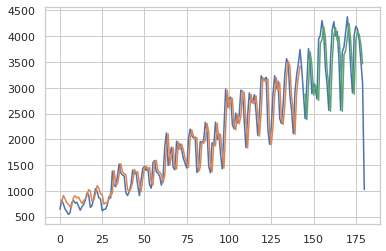

In [201]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot) #red is training data, green is testing data, blue is orginal dataset.
plt.plot(testPredictPlot)  #https://www.applause.com/blog/training-data-validation-data-vs-test-data(differences between training data, test dataset)
plt.show()

In [202]:
#centre tweets prediction

In [203]:
dataset=centre_ts

In [204]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.values.reshape(-1,1))

In [205]:
train_size = int(len(dataset) * 0.8)   #splitting the dataset into 67 and 33 percent.
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

144 37


In [206]:
look_back = 1
trainX, trainY = create_dataset(train, look_back) #converting as above mentioned function for training and testing.
testX, testY = create_dataset(test, look_back)

In [207]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))   

In [208]:
start_time5 = time.time()
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back))) #4 are the hidden LSTM blocks and 1 input layer as visible.
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='RMSProp')
model.fit(trainX, trainY, epochs=200, batch_size=4, verbose=2) #training the data with epochs=100,batch size=1;

Epoch 1/200
36/36 - 2s - loss: 0.0362 - 2s/epoch - 42ms/step
Epoch 2/200
36/36 - 0s - loss: 0.0202 - 42ms/epoch - 1ms/step
Epoch 3/200
36/36 - 0s - loss: 0.0127 - 41ms/epoch - 1ms/step
Epoch 4/200
36/36 - 0s - loss: 0.0105 - 40ms/epoch - 1ms/step
Epoch 5/200
36/36 - 0s - loss: 0.0100 - 39ms/epoch - 1ms/step
Epoch 6/200
36/36 - 0s - loss: 0.0098 - 39ms/epoch - 1ms/step
Epoch 7/200
36/36 - 0s - loss: 0.0097 - 39ms/epoch - 1ms/step
Epoch 8/200
36/36 - 0s - loss: 0.0094 - 39ms/epoch - 1ms/step
Epoch 9/200
36/36 - 0s - loss: 0.0093 - 38ms/epoch - 1ms/step
Epoch 10/200
36/36 - 0s - loss: 0.0092 - 39ms/epoch - 1ms/step
Epoch 11/200
36/36 - 0s - loss: 0.0090 - 38ms/epoch - 1ms/step
Epoch 12/200
36/36 - 0s - loss: 0.0089 - 39ms/epoch - 1ms/step
Epoch 13/200
36/36 - 0s - loss: 0.0088 - 38ms/epoch - 1ms/step
Epoch 14/200
36/36 - 0s - loss: 0.0087 - 39ms/epoch - 1ms/step
Epoch 15/200
36/36 - 0s - loss: 0.0086 - 39ms/epoch - 1ms/step
Epoch 16/200
36/36 - 0s - loss: 0.0084 - 39ms/epoch - 1ms/step
Ep

In [209]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 4)                 96        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [210]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

2/2 [==============================] - 0s 1ms/step


In [211]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])              #Note that we invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data (thousands of passengers per month).
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


In [212]:
print(f"the time of execution of LSTM for 1 day back for centre tweets in seconds is {time.time() - start_time5}")

the time of execution of LSTM for 1 day back for centre tweets in seconds is 9.982871770858765


In [213]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score RMSE OF centre tweets: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score RMSE OF centre tweets: %.2f RMSE' % (testScore))

Train Score RMSE OF centre tweets: 73.89 RMSE
Test Score RMSE OF centre tweets: 166.67 RMSE


In [214]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)         
trainPredictPlot[:, :] = numpy.nan                                              #Because of how the dataset was prepared, we must shift the predictions so that they align on the x-axis with the original dataset. 
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

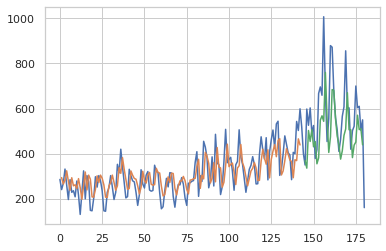

In [215]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot) #red is training data, green is testing data, blue is orginal dataset.
plt.plot(testPredictPlot)  #https://www.applause.com/blog/training-data-validation-data-vs-test-data(differences between training data, test dataset)
plt.show()

In [216]:
#right leaning tweets prediction

In [217]:
dataset=right_leaning_ts

In [218]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.values.reshape(-1,1))

In [219]:
train_size = int(len(dataset) * 0.8)   #splitting the dataset into 67 and 33 percent.
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

144 37


In [220]:
look_back = 1
trainX, trainY = create_dataset(train, look_back) #converting as above mentioned function for training and testing.
testX, testY = create_dataset(test, look_back)

In [221]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))  

In [222]:
start_time5 = time.time()
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back))) #4 are the hidden LSTM blocks and 1 input layer as visible.
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='RMSProp')
model.fit(trainX, trainY, epochs=100, batch_size=2, verbose=2) #training the data with epochs=100,batch size=1;

Epoch 1/100
71/71 - 1s - loss: 0.1361 - 1s/epoch - 17ms/step
Epoch 2/100
71/71 - 0s - loss: 0.0666 - 64ms/epoch - 905us/step
Epoch 3/100
71/71 - 0s - loss: 0.0330 - 61ms/epoch - 866us/step
Epoch 4/100
71/71 - 0s - loss: 0.0243 - 60ms/epoch - 848us/step
Epoch 5/100
71/71 - 0s - loss: 0.0235 - 61ms/epoch - 853us/step
Epoch 6/100
71/71 - 0s - loss: 0.0232 - 60ms/epoch - 848us/step
Epoch 7/100
71/71 - 0s - loss: 0.0230 - 60ms/epoch - 850us/step
Epoch 8/100
71/71 - 0s - loss: 0.0228 - 61ms/epoch - 853us/step
Epoch 9/100
71/71 - 0s - loss: 0.0226 - 61ms/epoch - 856us/step
Epoch 10/100
71/71 - 0s - loss: 0.0223 - 59ms/epoch - 836us/step
Epoch 11/100
71/71 - 0s - loss: 0.0222 - 59ms/epoch - 837us/step
Epoch 12/100
71/71 - 0s - loss: 0.0220 - 59ms/epoch - 835us/step
Epoch 13/100
71/71 - 0s - loss: 0.0218 - 59ms/epoch - 829us/step
Epoch 14/100
71/71 - 0s - loss: 0.0217 - 59ms/epoch - 829us/step
Epoch 15/100
71/71 - 0s - loss: 0.0215 - 59ms/epoch - 837us/step
Epoch 16/100
71/71 - 0s - loss: 0.021

In [223]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 4)                 96        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [224]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

2/2 [==============================] - 0s 1ms/step


In [225]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])              #Note that we invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data (thousands of passengers per month).
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [226]:
print(f"the time of execution of LSTM for 1 day back for centre tweets in seconds is {time.time() - start_time5}")

the time of execution of LSTM for 1 day back for centre tweets in seconds is 7.858283758163452


In [227]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score RMSE OF right leaning tweets: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score RMSE OF right leaning tweets: %.2f RMSE' % (testScore))

Train Score RMSE OF right leaning tweets: 97.52 RMSE
Test Score RMSE OF right leaning tweets: 138.99 RMSE


In [228]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)         
trainPredictPlot[:, :] = numpy.nan                                              #Because of how the dataset was prepared, we must shift the predictions so that they align on the x-axis with the original dataset. 
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

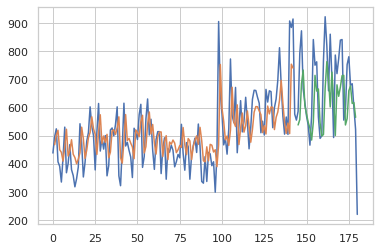

In [229]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot) #red is training data, green is testing data, blue is orginal dataset.
plt.plot(testPredictPlot)  #https://www.applause.com/blog/training-data-validation-data-vs-test-data(differences between training data, test dataset)
plt.show()

In [230]:
#left leaning tweets prediction

In [231]:
dataset=left_leaning_ts

In [232]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.values.reshape(-1,1))

In [233]:
train_size = int(len(dataset) * 0.8)   #splitting the dataset into 67 and 33 percent.
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

144 37


In [234]:
look_back = 1
trainX, trainY = create_dataset(train, look_back) #converting as above mentioned function for training and testing.
testX, testY = create_dataset(test, look_back)

In [235]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))  

In [236]:
start_time5 = time.time()
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back))) #4 are the hidden LSTM blocks and 1 input layer as visible.
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='RMSProp')
model.fit(trainX, trainY, epochs=200, batch_size=4, verbose=2) #training the data with epochs=100,batch size=1;

Epoch 1/200
36/36 - 1s - loss: 0.1078 - 1s/epoch - 41ms/step
Epoch 2/200
36/36 - 0s - loss: 0.0798 - 41ms/epoch - 1ms/step
Epoch 3/200
36/36 - 0s - loss: 0.0588 - 40ms/epoch - 1ms/step
Epoch 4/200
36/36 - 0s - loss: 0.0439 - 39ms/epoch - 1ms/step
Epoch 5/200
36/36 - 0s - loss: 0.0362 - 39ms/epoch - 1ms/step
Epoch 6/200
36/36 - 0s - loss: 0.0328 - 39ms/epoch - 1ms/step
Epoch 7/200
36/36 - 0s - loss: 0.0317 - 38ms/epoch - 1ms/step
Epoch 8/200
36/36 - 0s - loss: 0.0314 - 38ms/epoch - 1ms/step
Epoch 9/200
36/36 - 0s - loss: 0.0310 - 38ms/epoch - 1ms/step
Epoch 10/200
36/36 - 0s - loss: 0.0309 - 38ms/epoch - 1ms/step
Epoch 11/200
36/36 - 0s - loss: 0.0307 - 38ms/epoch - 1ms/step
Epoch 12/200
36/36 - 0s - loss: 0.0305 - 38ms/epoch - 1ms/step
Epoch 13/200
36/36 - 0s - loss: 0.0303 - 39ms/epoch - 1ms/step
Epoch 14/200
36/36 - 0s - loss: 0.0302 - 39ms/epoch - 1ms/step
Epoch 15/200
36/36 - 0s - loss: 0.0301 - 38ms/epoch - 1ms/step
Epoch 16/200
36/36 - 0s - loss: 0.0299 - 39ms/epoch - 1ms/step
Ep

In [237]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 4)                 96        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [238]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

2/2 [==============================] - 0s 1ms/step


In [239]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])              #Note that we invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data (thousands of passengers per month).
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [240]:
print(f"the time of execution of LSTM for 1 day back for left leaning tweets in seconds is {time.time() - start_time5}")

the time of execution of LSTM for 1 day back for left leaning tweets in seconds is 9.946447134017944


In [241]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score RMSE OF left leaning tweets: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score RMSE OF left leaning tweets: %.2f RMSE' % (testScore))

Train Score RMSE OF left leaning tweets: 57.50 RMSE
Test Score RMSE OF left leaning tweets: 73.49 RMSE


In [242]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)         
trainPredictPlot[:, :] = numpy.nan                                              #Because of how the dataset was prepared, we must shift the predictions so that they align on the x-axis with the original dataset. 
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

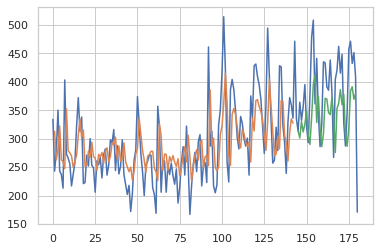

In [243]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot) #red is training data, green is testing data, blue is orginal dataset.
plt.plot(testPredictPlot)  #https://www.applause.com/blog/training-data-validation-data-vs-test-data(differences between training data, test dataset)
plt.show()

In [244]:
#LSTM FOR 14 DAYS LOOKBACK 

In [245]:
dataset1=left_ts

In [246]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset1 = scaler.fit_transform(dataset1.values.reshape(-1,1))
train_size = int(len(dataset1) * 0.8)   #splitting the dataset into 67 and 33 percent.
test_size = len(dataset1) - train_size
train, test = dataset1[0:train_size,:], dataset1[train_size:len(dataset1),:]
print(len(train), len(test))

144 37


Epoch 1/200
33/33 - 1s - loss: 0.1092 - 1s/epoch - 45ms/step
Epoch 2/200
33/33 - 0s - loss: 0.0586 - 38ms/epoch - 1ms/step
Epoch 3/200
33/33 - 0s - loss: 0.0321 - 38ms/epoch - 1ms/step
Epoch 4/200
33/33 - 0s - loss: 0.0211 - 38ms/epoch - 1ms/step
Epoch 5/200
33/33 - 0s - loss: 0.0188 - 37ms/epoch - 1ms/step
Epoch 6/200
33/33 - 0s - loss: 0.0184 - 36ms/epoch - 1ms/step
Epoch 7/200
33/33 - 0s - loss: 0.0180 - 36ms/epoch - 1ms/step
Epoch 8/200
33/33 - 0s - loss: 0.0177 - 37ms/epoch - 1ms/step
Epoch 9/200
33/33 - 0s - loss: 0.0173 - 37ms/epoch - 1ms/step
Epoch 10/200
33/33 - 0s - loss: 0.0169 - 37ms/epoch - 1ms/step
Epoch 11/200
33/33 - 0s - loss: 0.0167 - 37ms/epoch - 1ms/step
Epoch 12/200
33/33 - 0s - loss: 0.0163 - 37ms/epoch - 1ms/step
Epoch 13/200
33/33 - 0s - loss: 0.0163 - 37ms/epoch - 1ms/step
Epoch 14/200
33/33 - 0s - loss: 0.0160 - 37ms/epoch - 1ms/step
Epoch 15/200
33/33 - 0s - loss: 0.0157 - 36ms/epoch - 1ms/step
Epoch 16/200
33/33 - 0s - loss: 0.0155 - 37ms/epoch - 1ms/step
Ep

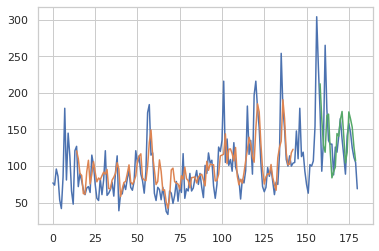

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 4)                 304       
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 309
Trainable params: 309
Non-trainable params: 0
_________________________________________________________________


In [247]:
start_time7 = time.time()
for i in range(14,15):
    trainX, trainY = create_dataset(train, i) #converting as above mentioned function for training and testing.
    testX, testY = create_dataset(test, i)
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, i))) #4 are the hidden LSTM blocks and 1 input layer as visible.
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='RMSProp')
    model.fit(trainX, trainY, epochs=200, batch_size=4, verbose=2) #training the data with epochs=100,batch size=1;
    # make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])              #Note that we invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data (thousands of passengers per month).
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train Score RMSE OF left tweets: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test Score RMSE OF left tweets: %.2f RMSE' % (testScore))
    # shift train predictions for plotting
    trainPredictPlot = numpy.empty_like(dataset1)         
    trainPredictPlot[:, :] = numpy.nan                                              #Because of how the dataset was prepared, we must shift the predictions so that they align on the x-axis with the original dataset. 
    trainPredictPlot[i:len(trainPredict)+i, :] = trainPredict
    # shift test predictions for plotting
    testPredictPlot = numpy.empty_like(dataset1)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(trainPredict)+(i*2)+1:len(dataset1)-1, :] = testPredict
    # plot baseline and predictions
    plt.plot(scaler.inverse_transform(dataset1))
    plt.plot(trainPredictPlot) #red is training data, green is testing data, blue is orginal dataset.
    plt.plot(testPredictPlot)  #https://www.applause.com/blog/training-data-validation-data-vs-test-data(differences between training data, test dataset)
    plt.show()
    model.summary()

In [248]:
#centre tweets prediction for multiple lookbacks

In [249]:
dataset2=centre_ts

In [250]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset2 = scaler.fit_transform(dataset2.values.reshape(-1,1))
train_size = int(len(dataset1) * 0.8)   #splitting the dataset into 67 and 33 percent.
test_size = len(dataset2) - train_size
train, test = dataset2[0:train_size,:], dataset2[train_size:len(dataset2),:]
print(len(train), len(test))

144 37


Epoch 1/200
33/33 - 1s - loss: 0.0203 - 1s/epoch - 44ms/step
Epoch 2/200
33/33 - 0s - loss: 0.0092 - 37ms/epoch - 1ms/step
Epoch 3/200
33/33 - 0s - loss: 0.0081 - 37ms/epoch - 1ms/step
Epoch 4/200
33/33 - 0s - loss: 0.0078 - 36ms/epoch - 1ms/step
Epoch 5/200
33/33 - 0s - loss: 0.0076 - 36ms/epoch - 1ms/step
Epoch 6/200
33/33 - 0s - loss: 0.0073 - 36ms/epoch - 1ms/step
Epoch 7/200
33/33 - 0s - loss: 0.0071 - 36ms/epoch - 1ms/step
Epoch 8/200
33/33 - 0s - loss: 0.0068 - 36ms/epoch - 1ms/step
Epoch 9/200
33/33 - 0s - loss: 0.0067 - 36ms/epoch - 1ms/step
Epoch 10/200
33/33 - 0s - loss: 0.0064 - 36ms/epoch - 1ms/step
Epoch 11/200
33/33 - 0s - loss: 0.0063 - 36ms/epoch - 1ms/step
Epoch 12/200
33/33 - 0s - loss: 0.0061 - 36ms/epoch - 1ms/step
Epoch 13/200
33/33 - 0s - loss: 0.0061 - 35ms/epoch - 1ms/step
Epoch 14/200
33/33 - 0s - loss: 0.0060 - 35ms/epoch - 1ms/step
Epoch 15/200
33/33 - 0s - loss: 0.0059 - 35ms/epoch - 1ms/step
Epoch 16/200
33/33 - 0s - loss: 0.0058 - 36ms/epoch - 1ms/step
Ep

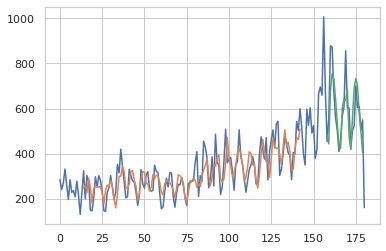

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 4)                 304       
                                                                 
 dense_6 (Dense)             (None, 1)                 5         
                                                                 
Total params: 309
Trainable params: 309
Non-trainable params: 0
_________________________________________________________________


In [251]:
start_time8 = time.time()
for i in range(14,15):
    trainX, trainY = create_dataset(train, i) #converting as above mentioned function for training and testing.
    testX, testY = create_dataset(test, i)
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, i))) #4 are the hidden LSTM blocks and 1 input layer as visible.
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='RMSProp')
    model.fit(trainX, trainY, epochs=200, batch_size=4, verbose=2) #training the data with epochs=100,batch size=1;
    # make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])              #Note that we invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data (thousands of passengers per month).
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train Score RMSE OF centre tweets: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test Score RMSE OF centre tweets: %.2f RMSE' % (testScore))
    # shift train predictions for plotting
    trainPredictPlot = numpy.empty_like(dataset2)         
    trainPredictPlot[:, :] = numpy.nan                                              #Because of how the dataset was prepared, we must shift the predictions so that they align on the x-axis with the original dataset. 
    trainPredictPlot[i:len(trainPredict)+i, :] = trainPredict
    # shift test predictions for plotting
    testPredictPlot = numpy.empty_like(dataset2)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(trainPredict)+(i*2)+1:len(dataset2)-1, :] = testPredict
    # plot baseline and predictions
    plt.plot(scaler.inverse_transform(dataset2))
    plt.plot(trainPredictPlot) #red is training data, green is testing data, blue is orginal dataset.
    plt.plot(testPredictPlot)  #https://www.applause.com/blog/training-data-validation-data-vs-test-data(differences between training data, test dataset)
    plt.show()
    model.summary()

In [252]:
print(f"the time of execution of LSTM for 14 days look back for centre tweets in seconds is {time.time() - start_time8}")

the time of execution of LSTM for 14 days look back for centre tweets in seconds is 9.49135446548462


In [253]:
# right tweets prediction for multiple lookbacks

In [254]:
dataset3=right_ts

In [255]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset3 = scaler.fit_transform(dataset3.values.reshape(-1,1))
train_size = int(len(dataset3) * 0.8)   #splitting the dataset into 67 and 33 percent.
test_size = len(dataset3) - train_size
train, test = dataset3[0:train_size,:], dataset3[train_size:len(dataset3),:]
print(len(train), len(test))

144 37


Epoch 1/100
65/65 - 2s - loss: 0.0525 - 2s/epoch - 24ms/step
Epoch 2/100
65/65 - 0s - loss: 0.0119 - 75ms/epoch - 1ms/step
Epoch 3/100
65/65 - 0s - loss: 0.0095 - 72ms/epoch - 1ms/step
Epoch 4/100
65/65 - 0s - loss: 0.0086 - 72ms/epoch - 1ms/step
Epoch 5/100
65/65 - 0s - loss: 0.0086 - 72ms/epoch - 1ms/step
Epoch 6/100
65/65 - 0s - loss: 0.0077 - 71ms/epoch - 1ms/step
Epoch 7/100
65/65 - 0s - loss: 0.0075 - 71ms/epoch - 1ms/step
Epoch 8/100
65/65 - 0s - loss: 0.0072 - 71ms/epoch - 1ms/step
Epoch 9/100
65/65 - 0s - loss: 0.0068 - 71ms/epoch - 1ms/step
Epoch 10/100
65/65 - 0s - loss: 0.0065 - 71ms/epoch - 1ms/step
Epoch 11/100
65/65 - 0s - loss: 0.0063 - 71ms/epoch - 1ms/step
Epoch 12/100
65/65 - 0s - loss: 0.0060 - 70ms/epoch - 1ms/step
Epoch 13/100
65/65 - 0s - loss: 0.0058 - 69ms/epoch - 1ms/step
Epoch 14/100
65/65 - 0s - loss: 0.0058 - 69ms/epoch - 1ms/step
Epoch 15/100
65/65 - 0s - loss: 0.0057 - 70ms/epoch - 1ms/step
Epoch 16/100
65/65 - 0s - loss: 0.0055 - 70ms/epoch - 1ms/step
Ep

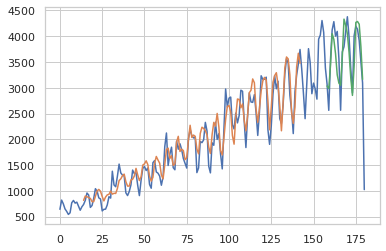

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 4)                 304       
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 309
Trainable params: 309
Non-trainable params: 0
_________________________________________________________________


In [256]:
start_time9 = time.time()
for i in range(14,15):
    trainX, trainY = create_dataset(train, i) #converting as above mentioned function for training and testing.
    testX, testY = create_dataset(test, i)
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, i))) #4 are the hidden LSTM blocks and 1 input layer as visible.
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=100, batch_size=2, verbose=2) #training the data with epochs=100,batch size=1;
    # make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])              #Note that we invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data (thousands of passengers per month).
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train Score RMSE OF right tweets: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test Score RMSE OF right tweets: %.2f RMSE' % (testScore))
    # shift train predictions for plotting
    trainPredictPlot = numpy.empty_like(dataset3)         
    trainPredictPlot[:, :] = numpy.nan                                              #Because of how the dataset was prepared, we must shift the predictions so that they align on the x-axis with the original dataset. 
    trainPredictPlot[i:len(trainPredict)+i, :] = trainPredict
    # shift test predictions for plotting
    testPredictPlot = numpy.empty_like(dataset3)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(trainPredict)+(i*2)+1:len(dataset3)-1, :] = testPredict
    # plot baseline and predictions
    plt.plot(scaler.inverse_transform(dataset3))
    plt.plot(trainPredictPlot) #red is training data, green is testing data, blue is orginal dataset.
    plt.plot(testPredictPlot)  #https://www.applause.com/blog/training-data-validation-data-vs-test-data(differences between training data, test dataset)
    plt.show()
    model.summary()

In [257]:
# right leaning tweets prediction for multiple lookbacks

In [258]:
dataset4=right_leaning_ts

In [259]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset4 = scaler.fit_transform(dataset4.values.reshape(-1,1))
train_size = int(len(dataset4) * 0.8)   #splitting the dataset into 67 and 33 percent.
test_size = len(dataset4) - train_size
train, test = dataset4[0:train_size,:], dataset4[train_size:len(dataset4),:]
print(len(train), len(test))

144 37


Epoch 1/100
65/65 - 2s - loss: 0.1210 - 2s/epoch - 24ms/step
Epoch 2/100
65/65 - 0s - loss: 0.0299 - 75ms/epoch - 1ms/step
Epoch 3/100
65/65 - 0s - loss: 0.0247 - 70ms/epoch - 1ms/step
Epoch 4/100
65/65 - 0s - loss: 0.0239 - 69ms/epoch - 1ms/step
Epoch 5/100
65/65 - 0s - loss: 0.0233 - 69ms/epoch - 1ms/step
Epoch 6/100
65/65 - 0s - loss: 0.0221 - 69ms/epoch - 1ms/step
Epoch 7/100
65/65 - 0s - loss: 0.0217 - 69ms/epoch - 1ms/step
Epoch 8/100
65/65 - 0s - loss: 0.0209 - 69ms/epoch - 1ms/step
Epoch 9/100
65/65 - 0s - loss: 0.0203 - 69ms/epoch - 1ms/step
Epoch 10/100
65/65 - 0s - loss: 0.0195 - 69ms/epoch - 1ms/step
Epoch 11/100
65/65 - 0s - loss: 0.0192 - 69ms/epoch - 1ms/step
Epoch 12/100
65/65 - 0s - loss: 0.0190 - 69ms/epoch - 1ms/step
Epoch 13/100
65/65 - 0s - loss: 0.0185 - 69ms/epoch - 1ms/step
Epoch 14/100
65/65 - 0s - loss: 0.0181 - 69ms/epoch - 1ms/step
Epoch 15/100
65/65 - 0s - loss: 0.0187 - 69ms/epoch - 1ms/step
Epoch 16/100
65/65 - 0s - loss: 0.0177 - 69ms/epoch - 1ms/step
Ep

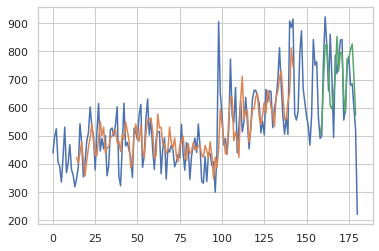

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 4)                 304       
                                                                 
 dense_8 (Dense)             (None, 1)                 5         
                                                                 
Total params: 309
Trainable params: 309
Non-trainable params: 0
_________________________________________________________________


In [260]:
start_time9 = time.time()
for i in range(14,15):
    trainX, trainY = create_dataset(train, i) #converting as above mentioned function for training and testing.
    testX, testY = create_dataset(test, i)
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, i))) #4 are the hidden LSTM blocks and 1 input layer as visible.
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=100, batch_size=2, verbose=2) #training the data with epochs=100,batch size=1;
    # make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])              #Note that we invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data (thousands of passengers per month).
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train Score RMSE OF right leaning tweets: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test Score RMSE OF right leaning tweets: %.2f RMSE' % (testScore))
    # shift train predictions for plotting
    trainPredictPlot = numpy.empty_like(dataset4)         
    trainPredictPlot[:, :] = numpy.nan                                              #Because of how the dataset was prepared, we must shift the predictions so that they align on the x-axis with the original dataset. 
    trainPredictPlot[i:len(trainPredict)+i, :] = trainPredict
    # shift test predictions for plotting
    testPredictPlot = numpy.empty_like(dataset4)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(trainPredict)+(i*2)+1:len(dataset4)-1, :] = testPredict
    # plot baseline and predictions
    plt.plot(scaler.inverse_transform(dataset4))
    plt.plot(trainPredictPlot) #red is training data, green is testing data, blue is orginal dataset.
    plt.plot(testPredictPlot)  #https://www.applause.com/blog/training-data-validation-data-vs-test-data(differences between training data, test dataset)
    plt.show()
    model.summary()

In [261]:
# prediction of left leaning tweets in LSTM 14 days as feedback

In [262]:
dataset5=left_leaning_ts

In [263]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset5 = scaler.fit_transform(dataset5.values.reshape(-1,1))
train_size = int(len(dataset5) * 0.8)   #splitting the dataset into 67 and 33 percent.
test_size = len(dataset5) - train_size
train, test = dataset5[0:train_size,:], dataset5[train_size:len(dataset5),:]
print(len(train), len(test))

144 37


Epoch 1/100
33/33 - 2s - loss: 0.2282 - 2s/epoch - 45ms/step
Epoch 2/100
33/33 - 0s - loss: 0.1585 - 40ms/epoch - 1ms/step
Epoch 3/100
33/33 - 0s - loss: 0.1081 - 39ms/epoch - 1ms/step
Epoch 4/100
33/33 - 0s - loss: 0.0693 - 39ms/epoch - 1ms/step
Epoch 5/100
33/33 - 0s - loss: 0.0433 - 38ms/epoch - 1ms/step
Epoch 6/100
33/33 - 0s - loss: 0.0326 - 39ms/epoch - 1ms/step
Epoch 7/100
33/33 - 0s - loss: 0.0298 - 38ms/epoch - 1ms/step
Epoch 8/100
33/33 - 0s - loss: 0.0291 - 38ms/epoch - 1ms/step
Epoch 9/100
33/33 - 0s - loss: 0.0288 - 38ms/epoch - 1ms/step
Epoch 10/100
33/33 - 0s - loss: 0.0285 - 38ms/epoch - 1ms/step
Epoch 11/100
33/33 - 0s - loss: 0.0282 - 38ms/epoch - 1ms/step
Epoch 12/100
33/33 - 0s - loss: 0.0280 - 38ms/epoch - 1ms/step
Epoch 13/100
33/33 - 0s - loss: 0.0277 - 38ms/epoch - 1ms/step
Epoch 14/100
33/33 - 0s - loss: 0.0274 - 38ms/epoch - 1ms/step
Epoch 15/100
33/33 - 0s - loss: 0.0273 - 38ms/epoch - 1ms/step
Epoch 16/100
33/33 - 0s - loss: 0.0269 - 38ms/epoch - 1ms/step
Ep

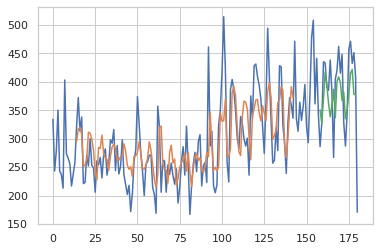

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 4)                 304       
                                                                 
 dense_9 (Dense)             (None, 1)                 5         
                                                                 
Total params: 309
Trainable params: 309
Non-trainable params: 0
_________________________________________________________________


In [264]:
start_time9 = time.time()
for i in range(14,15):
    trainX, trainY = create_dataset(train, i) #converting as above mentioned function for training and testing.
    testX, testY = create_dataset(test, i)
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, i))) #4 are the hidden LSTM blocks and 1 input layer as visible.
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=100, batch_size=4, verbose=2) #training the data with epochs=100,batch size=1;
    # make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])              #Note that we invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data (thousands of passengers per month).
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train Score RMSE OF left leaning tweets: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test Score RMSE OF left leaning tweets: %.2f RMSE' % (testScore))
    # shift train predictions for plotting
    trainPredictPlot = numpy.empty_like(dataset5)         
    trainPredictPlot[:, :] = numpy.nan                                              #Because of how the dataset was prepared, we must shift the predictions so that they align on the x-axis with the original dataset. 
    trainPredictPlot[i:len(trainPredict)+i, :] = trainPredict
    # shift test predictions for plotting
    testPredictPlot = numpy.empty_like(dataset5)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(trainPredict)+(i*2)+1:len(dataset5)-1, :] = testPredict
    # plot baseline and predictions
    plt.plot(scaler.inverse_transform(dataset5))
    plt.plot(trainPredictPlot) #red is training data, green is testing data, blue is orginal dataset.
    plt.plot(testPredictPlot)  #https://www.applause.com/blog/training-data-validation-data-vs-test-data(differences between training data, test dataset)
    plt.show()
    model.summary()

In [265]:
#Multistep timeseries forecasting

In [266]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
from numpy import array

/tmp/ipykernel_623782/1754570070.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [267]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
 
# convert time series into supervised learning problem
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)
 
# transform series into train and test sets for supervised learning
def prepare_data(series, n_test, n_lag, n_seq):
    # extract raw values
    raw_values = series.values
    # transform data to be stationary
    diff_series = difference(raw_values, 1)
    diff_values = diff_series.values
    diff_values = diff_values.reshape(len(diff_values), 1)
    # rescale values to -1, 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_values = scaler.fit_transform(diff_values)
    scaled_values = scaled_values.reshape(len(scaled_values), 1)
    # transform into supervised learning problem X, y
    supervised = series_to_supervised(scaled_values, n_lag, n_seq)
    supervised_values = supervised.values
    # split into train and test sets
    train, test = supervised_values[0:-n_test], supervised_values[-n_test:]
    return scaler, train, test
 
# fit an LSTM network to training data
def fit_lstm(train, n_lag, n_seq, n_batch, nb_epoch, n_neurons):
    # reshape training into [samples, timesteps, features]
    X, y = train[:, 0:n_lag], train[:, n_lag:]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    # design network
    model = Sequential()
    model.add(LSTM(n_neurons, batch_input_shape=(n_batch, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(y.shape[1]))
    model.compile(loss='mean_squared_error', optimizer='RMSProp')
    # fit network
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=n_batch, verbose=2, shuffle=False)
        model.reset_states()
    return model
 
# make one forecast with an LSTM,
def forecast_lstm(model, X, n_batch):
    # reshape input pattern to [samples, timesteps, features]
    X = X.reshape(1, 1, len(X))
    # make forecast
    forecast = model.predict(X, batch_size=n_batch)
    # convert to array
    return [x for x in forecast[0, :]]
 
# evaluate the persistence model
def make_forecasts(model, n_batch, train, test, n_lag, n_seq):
    forecasts = list()
    for i in range(len(test)):
        X, y = test[i, 0:n_lag], test[i, n_lag:]
        # make forecast
        forecast = forecast_lstm(model, X, n_batch)
        # store the forecast
        forecasts.append(forecast)
    return forecasts
 
# invert differenced forecast
def inverse_difference(last_ob, forecast):
    # invert first forecast
    inverted = list()
    inverted.append(forecast[0] + last_ob)
    # propagate difference forecast using inverted first value
    for i in range(1, len(forecast)):
        inverted.append(forecast[i] + inverted[i-1])
    return inverted
 
# inverse data transform on forecasts
def inverse_transform(series, forecasts, scaler, n_test):
    inverted = list()
    for i in range(len(forecasts)):
        # create array from forecast
        forecast = array(forecasts[i])
        forecast = forecast.reshape(1, len(forecast))
        # invert scaling
        inv_scale = scaler.inverse_transform(forecast)
        inv_scale = inv_scale[0, :]
        # invert differencing
        index = len(series) - n_test + i - 1
        last_ob = series.values[index]
        inv_diff = inverse_difference(last_ob, inv_scale)
        # store
        inverted.append(inv_diff)
    return inverted
 
# evaluate the RMSE for each forecast time step
def evaluate_forecasts(test, forecasts, n_lag, n_seq):
    for i in range(n_seq):
        actual = [row[i] for row in test]
        predicted = [forecast[i] for forecast in forecasts]
        rmse = sqrt(mean_squared_error(actual, predicted))
        print('t+%d RMSE: %f' % ((i+1), rmse))
 
# plot the forecasts in the context of the original dataset
def plot_forecasts(series, forecasts, n_test):
    # plot the entire dataset in blue
    pyplot.plot(series.values)
    # plot the forecasts in red
    for i in range(len(forecasts)):
        off_s = len(series) - n_test + i - 1
        off_e = off_s + len(forecasts[i]) + 1
        xaxis = [x for x in range(off_s, off_e)]
        yaxis = [series.values[off_s]] + forecasts[i]
        pyplot.plot(xaxis, yaxis, color='red')
    # show the plot
    pyplot.show()
 


123/123 - 1s - loss: 0.2060 - 1s/epoch - 9ms/step
123/123 - 0s - loss: 0.0609 - 106ms/epoch - 863us/step
123/123 - 0s - loss: 0.0235 - 102ms/epoch - 829us/step
123/123 - 0s - loss: 0.0198 - 101ms/epoch - 818us/step
123/123 - 0s - loss: 0.0190 - 100ms/epoch - 813us/step
123/123 - 0s - loss: 0.0188 - 100ms/epoch - 809us/step
123/123 - 0s - loss: 0.0188 - 100ms/epoch - 813us/step
123/123 - 0s - loss: 0.0187 - 102ms/epoch - 832us/step
123/123 - 0s - loss: 0.0187 - 102ms/epoch - 831us/step
123/123 - 0s - loss: 0.0187 - 106ms/epoch - 860us/step
123/123 - 0s - loss: 0.0186 - 104ms/epoch - 849us/step
123/123 - 0s - loss: 0.0186 - 102ms/epoch - 829us/step
123/123 - 0s - loss: 0.0185 - 102ms/epoch - 831us/step
123/123 - 0s - loss: 0.0185 - 103ms/epoch - 837us/step
123/123 - 0s - loss: 0.0185 - 103ms/epoch - 841us/step
123/123 - 0s - loss: 0.0184 - 103ms/epoch - 833us/step
123/123 - 0s - loss: 0.0184 - 103ms/epoch - 839us/step
123/123 - 0s - loss: 0.0184 - 103ms/epoch - 839us/step
123/123 - 0s - 

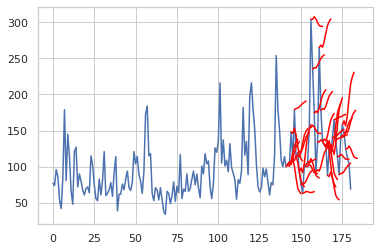

In [268]:

# load dataset
series = left_ts
# configure
n_lag = 14
n_seq = 7
n_test = 37
n_epochs = 200
n_batch = 1
n_neurons = 1
# prepare data
scaler, train, test = prepare_data(series, n_test, n_lag, n_seq)

start_time10 = time.time()
# fit model
model = fit_lstm(train, n_lag, n_seq, n_batch, n_epochs, n_neurons)
# make forecasts
forecasts = make_forecasts(model, n_batch, train, test, n_lag, n_seq)
# inverse transform forecasts and test
forecasts = inverse_transform(series, forecasts, scaler, n_test+2)
actual = [row[n_lag:] for row in test]
actual = inverse_transform(series, actual, scaler, n_test+2)
# evaluate forecasts
evaluate_forecasts(actual, forecasts, n_lag, n_seq)
# plot forecasts
plot_forecasts(series, forecasts, n_test+2)

In [269]:
# Multistep forecasting for centre data

123/123 - 1s - loss: 0.2666 - 1s/epoch - 9ms/step
123/123 - 0s - loss: 0.1325 - 103ms/epoch - 836us/step
123/123 - 0s - loss: 0.0647 - 104ms/epoch - 842us/step
123/123 - 0s - loss: 0.0290 - 104ms/epoch - 847us/step
123/123 - 0s - loss: 0.0158 - 102ms/epoch - 832us/step
123/123 - 0s - loss: 0.0130 - 109ms/epoch - 890us/step
123/123 - 0s - loss: 0.0126 - 105ms/epoch - 852us/step
123/123 - 0s - loss: 0.0125 - 108ms/epoch - 877us/step
123/123 - 0s - loss: 0.0125 - 106ms/epoch - 858us/step
123/123 - 0s - loss: 0.0125 - 105ms/epoch - 857us/step
123/123 - 0s - loss: 0.0125 - 108ms/epoch - 882us/step
123/123 - 0s - loss: 0.0124 - 108ms/epoch - 880us/step
123/123 - 0s - loss: 0.0124 - 107ms/epoch - 874us/step
123/123 - 0s - loss: 0.0124 - 107ms/epoch - 871us/step
123/123 - 0s - loss: 0.0124 - 108ms/epoch - 877us/step
123/123 - 0s - loss: 0.0124 - 108ms/epoch - 877us/step
123/123 - 0s - loss: 0.0124 - 107ms/epoch - 869us/step
123/123 - 0s - loss: 0.0123 - 107ms/epoch - 869us/step
123/123 - 0s - 

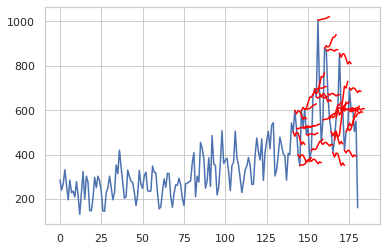

In [270]:

# load dataset
series = centre_ts
# configure
n_lag = 14
n_seq = 7
n_test = 37
n_epochs = 75
n_batch = 1
n_neurons = 1
# prepare data
scaler, train, test = prepare_data(series, n_test, n_lag, n_seq)

start_time10 = time.time()
# fit model
model = fit_lstm(train, n_lag, n_seq, n_batch, n_epochs, n_neurons)
# make forecasts
forecasts = make_forecasts(model, n_batch, train, test, n_lag, n_seq)
# inverse transform forecasts and test
forecasts = inverse_transform(series, forecasts, scaler, n_test+2)
actual = [row[n_lag:] for row in test]
actual = inverse_transform(series, actual, scaler, n_test+2)
# evaluate forecasts
evaluate_forecasts(actual, forecasts, n_lag, n_seq)
# plot forecasts
plot_forecasts(series, forecasts, n_test+2)

In [271]:
# Multistep timeseries forecasting for right tweets

123/123 - 1s - loss: 0.2250 - 1s/epoch - 9ms/step
123/123 - 0s - loss: 0.0924 - 109ms/epoch - 885us/step
123/123 - 0s - loss: 0.0419 - 106ms/epoch - 859us/step
123/123 - 0s - loss: 0.0190 - 105ms/epoch - 855us/step
123/123 - 0s - loss: 0.0122 - 107ms/epoch - 872us/step
123/123 - 0s - loss: 0.0114 - 104ms/epoch - 846us/step
123/123 - 0s - loss: 0.0114 - 104ms/epoch - 843us/step
123/123 - 0s - loss: 0.0114 - 104ms/epoch - 843us/step
123/123 - 0s - loss: 0.0114 - 102ms/epoch - 831us/step
123/123 - 0s - loss: 0.0114 - 103ms/epoch - 838us/step
123/123 - 0s - loss: 0.0114 - 104ms/epoch - 845us/step
123/123 - 0s - loss: 0.0113 - 104ms/epoch - 845us/step
123/123 - 0s - loss: 0.0113 - 108ms/epoch - 876us/step
123/123 - 0s - loss: 0.0113 - 105ms/epoch - 855us/step
123/123 - 0s - loss: 0.0113 - 107ms/epoch - 866us/step
123/123 - 0s - loss: 0.0113 - 105ms/epoch - 857us/step
123/123 - 0s - loss: 0.0113 - 105ms/epoch - 851us/step
123/123 - 0s - loss: 0.0113 - 105ms/epoch - 853us/step
123/123 - 0s - 

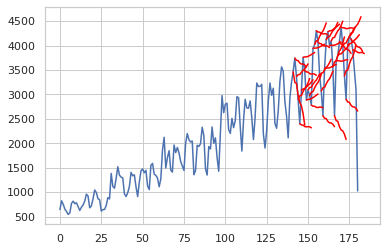

In [272]:

# load dataset
series = right_ts
# configure
n_lag = 14
n_seq = 7
n_test = 37
n_epochs = 150
n_batch = 1
n_neurons = 1
# prepare data
scaler, train, test = prepare_data(series, n_test, n_lag, n_seq)

start_time10 = time.time()
# fit model
model = fit_lstm(train, n_lag, n_seq, n_batch, n_epochs, n_neurons)
# make forecasts
forecasts = make_forecasts(model, n_batch, train, test, n_lag, n_seq)
# inverse transform forecasts and test
forecasts = inverse_transform(series, forecasts, scaler, n_test+2)
actual = [row[n_lag:] for row in test]
actual = inverse_transform(series, actual, scaler, n_test+2)
# evaluate forecasts
evaluate_forecasts(actual, forecasts, n_lag, n_seq)
# plot forecasts
plot_forecasts(series, forecasts, n_test+2)

In [273]:
# Multistep time series forecasting for right leaning tweets

123/123 - 1s - loss: 0.1487 - 1s/epoch - 9ms/step
123/123 - 0s - loss: 0.0795 - 102ms/epoch - 832us/step
123/123 - 0s - loss: 0.0406 - 102ms/epoch - 826us/step
123/123 - 0s - loss: 0.0243 - 104ms/epoch - 846us/step
123/123 - 0s - loss: 0.0198 - 105ms/epoch - 858us/step
123/123 - 0s - loss: 0.0190 - 110ms/epoch - 897us/step
123/123 - 0s - loss: 0.0188 - 105ms/epoch - 857us/step
123/123 - 0s - loss: 0.0188 - 105ms/epoch - 852us/step
123/123 - 0s - loss: 0.0188 - 106ms/epoch - 866us/step
123/123 - 0s - loss: 0.0187 - 107ms/epoch - 870us/step
123/123 - 0s - loss: 0.0187 - 106ms/epoch - 862us/step
123/123 - 0s - loss: 0.0187 - 108ms/epoch - 877us/step
123/123 - 0s - loss: 0.0187 - 108ms/epoch - 882us/step
123/123 - 0s - loss: 0.0187 - 107ms/epoch - 866us/step
123/123 - 0s - loss: 0.0187 - 106ms/epoch - 864us/step
123/123 - 0s - loss: 0.0187 - 107ms/epoch - 870us/step
123/123 - 0s - loss: 0.0186 - 106ms/epoch - 861us/step
123/123 - 0s - loss: 0.0186 - 105ms/epoch - 854us/step
123/123 - 0s - 

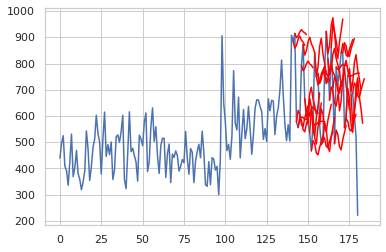

In [274]:

# load dataset
series = right_leaning_ts
# configure
n_lag = 14
n_seq = 7
n_test = 37
n_epochs = 150
n_batch = 1
n_neurons = 1
# prepare data
scaler, train, test = prepare_data(series, n_test, n_lag, n_seq)

start_time10 = time.time()
# fit model
model = fit_lstm(train, n_lag, n_seq, n_batch, n_epochs, n_neurons)
# make forecasts
forecasts = make_forecasts(model, n_batch, train, test, n_lag, n_seq)
# inverse transform forecasts and test
forecasts = inverse_transform(series, forecasts, scaler, n_test+2)
actual = [row[n_lag:] for row in test]
actual = inverse_transform(series, actual, scaler, n_test+2)
# evaluate forecasts
evaluate_forecasts(actual, forecasts, n_lag, n_seq)
# plot forecasts
plot_forecasts(series, forecasts, n_test+2)

In [275]:
# Multistep timeseries forecasting for left leaning

123/123 - 1s - loss: 0.1600 - 1s/epoch - 9ms/step
123/123 - 0s - loss: 0.0835 - 104ms/epoch - 843us/step
123/123 - 0s - loss: 0.0456 - 103ms/epoch - 836us/step
123/123 - 0s - loss: 0.0277 - 102ms/epoch - 832us/step
123/123 - 0s - loss: 0.0211 - 102ms/epoch - 831us/step
123/123 - 0s - loss: 0.0195 - 109ms/epoch - 883us/step
123/123 - 0s - loss: 0.0193 - 104ms/epoch - 846us/step
123/123 - 0s - loss: 0.0192 - 105ms/epoch - 850us/step
123/123 - 0s - loss: 0.0192 - 105ms/epoch - 853us/step
123/123 - 0s - loss: 0.0191 - 103ms/epoch - 841us/step
123/123 - 0s - loss: 0.0191 - 107ms/epoch - 872us/step
123/123 - 0s - loss: 0.0190 - 107ms/epoch - 866us/step
123/123 - 0s - loss: 0.0190 - 109ms/epoch - 886us/step
123/123 - 0s - loss: 0.0190 - 107ms/epoch - 870us/step
123/123 - 0s - loss: 0.0190 - 109ms/epoch - 882us/step
123/123 - 0s - loss: 0.0189 - 106ms/epoch - 864us/step
123/123 - 0s - loss: 0.0189 - 106ms/epoch - 859us/step
123/123 - 0s - loss: 0.0189 - 109ms/epoch - 883us/step
123/123 - 0s - 

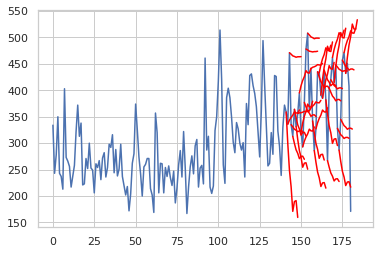

In [276]:

# load dataset
series = left_leaning_ts
# configure
n_lag = 14
n_seq = 7
n_test = 37
n_epochs = 200
n_batch = 1
n_neurons = 1
# prepare data
scaler, train, test = prepare_data(series, n_test, n_lag, n_seq)

start_time10 = time.time()
# fit model
model = fit_lstm(train, n_lag, n_seq, n_batch, n_epochs, n_neurons)
# make forecasts
forecasts = make_forecasts(model, n_batch, train, test, n_lag, n_seq)
# inverse transform forecasts and test
forecasts = inverse_transform(series, forecasts, scaler, n_test+2)
actual = [row[n_lag:] for row in test]
actual = inverse_transform(series, actual, scaler, n_test+2)
# evaluate forecasts
evaluate_forecasts(actual, forecasts, n_lag, n_seq)
# plot forecasts
plot_forecasts(series, forecasts, n_test+2)

In [277]:
# Gated reccurent time series forecasting

In [278]:
left_gru = left_filtered
centre_gru =centre_filtered
right_gru = right_filtered
left_leaning_gru = left_leaning_filtered
right_leaning_gru = right_leaning_filtered

In [279]:
train_size = int(len(left_gru)*0.8)

train_data = left_gru.iloc[:train_size]
test_data = left_gru.iloc[train_size:]

In [280]:
scaler = MinMaxScaler().fit(train_data)
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

In [281]:
def create_dataset (X, look_back = 1):
    Xs, ys = [], []
 
    for i in range(len(X)-look_back):
        v = X[i:i+look_back]
        Xs.append(v)
        ys.append(X[i+look_back])
 
    return np.array(Xs), np.array(ys)
LOOK_BACK = 14
X_train, y_train = create_dataset(train_scaled,LOOK_BACK)
X_test, y_test = create_dataset(test_scaled,LOOK_BACK)
# Print data shape
print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
print("X_test.shape: ", X_test.shape) 
print("y_test.shape: ", y_test.shape)

X_train.shape:  (130, 14, 1)
y_train.shape:  (130, 1)
X_test.shape:  (23, 14, 1)
y_test.shape:  (23, 1)


In [282]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

In [283]:
# Create GRU model
def create_gru(units):
    model = Sequential()
    # Input layer
    model.add(GRU (units = units, return_sequences = True, 
    input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2)) 
    # Hidden layer
    model.add(GRU(units = units)) 
    model.add(Dropout(0.2))
    model.add(Dense(units = 1)) 
    #Compile model
    model.compile(optimizer="adam",loss="mse")
    return model
model_gru = create_gru(64)

In [284]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = "val_loss",
                                               patience = 10)
    history = model.fit(X_train, y_train, epochs = 100,  
                        validation_split = 0.2,
                        batch_size = 16, shuffle = False, 
                        callbacks = [early_stop])
    return history
history_gru = fit_model(model_gru)

Epoch 1/100
7/7 [==============================] - 13s 118ms/step - loss: 0.0509 - val_loss: 0.0563
Epoch 2/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0349 - val_loss: 0.0531
Epoch 3/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0302 - val_loss: 0.0571
Epoch 4/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0312 - val_loss: 0.0537
Epoch 5/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0279 - val_loss: 0.0527
Epoch 6/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0291 - val_loss: 0.0526
Epoch 7/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0292 - val_loss: 0.0536
Epoch 8/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0275 - val_loss: 0.0525
Epoch 9/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0292 - val_loss: 0.0523
Epoch 10/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0281 - val_loss: 0.0531
Epoch 11/100
7/7 

In [285]:
y_test = scaler.inverse_transform(y_test)
y_train = scaler.inverse_transform(y_train)

5/5 [==============================] - 1s 3ms/step


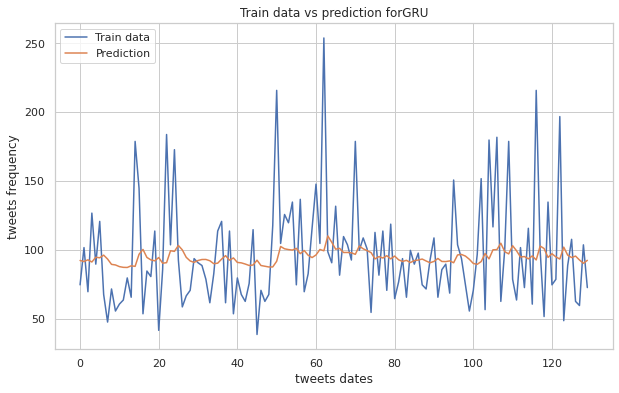

In [286]:
def prediction(model):
    prediction = model.predict(X_train)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)

# Plot test data vs prediction
def plot_future(prediction, model_name, y_train):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_train), 
             label="Train data")
    plt.plot(np.arange(range_future), 
             np.array(prediction),label="Prediction")
    plt.title("Train data vs prediction for" + model_name)
    plt.legend(loc="upper left")
    plt.xlabel("tweets dates")
    plt.ylabel("tweets frequency")
 
plot_future(prediction_gru, "GRU", y_train)

In [287]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ":")
    print("Mean Absolute Error: {:.4f}".format(mae))
    print("Root Mean Square Error: {:.4f}".format(rmse))
    print("")
evaluate_prediction(prediction_gru, y_train, "GRU")

GRU:
Mean Absolute Error: 28.2723
Root Mean Square Error: 38.7530



1/1 [==============================] - 0s 25ms/step


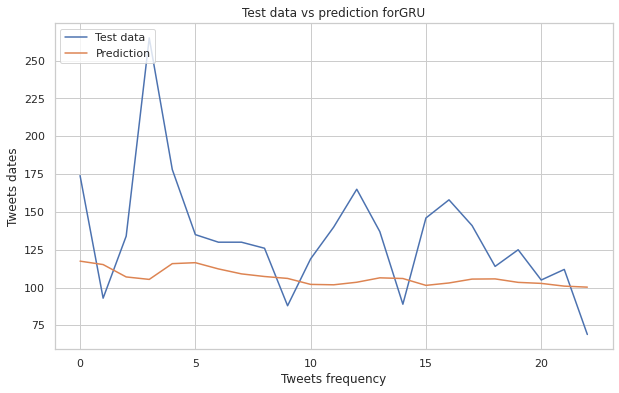

In [288]:
# Make prediction
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)
#prediction_bilstm = prediction(model_bilstm)
# Plot test data vs prediction
def plot_future(prediction, model_name, y_test):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), 
             label= "Test data")
    plt.plot(np.arange(range_future), 
             np.array(prediction),label="Prediction")
    plt.title("Test data vs prediction for" + model_name)
    plt.legend(loc="upper left")
    plt.xlabel("Tweets frequency")
    plt.ylabel("Tweets dates")
 
plot_future(prediction_gru, "GRU", y_test)

In [289]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ":")
    print("Mean Absolute Error: {:.4f}".format(mae))
    print("Root Mean Square Error: {:.4f}".format(rmse))
    print("")
evaluate_prediction(prediction_gru, y_test, "GRU")

GRU:
Mean Absolute Error: 34.5530
Root Mean Square Error: 46.6999



In [290]:
# Gru for right tweets

In [291]:
train_size = int(len(right_gru)*0.8)

train_data = right_gru.iloc[:train_size]
test_data = right_gru.iloc[train_size:]

In [292]:
scaler = MinMaxScaler().fit(train_data)
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

In [293]:
def create_dataset (X, look_back = 1):
    Xs, ys = [], []
 
    for i in range(len(X)-look_back):
        v = X[i:i+look_back]
        Xs.append(v)
        ys.append(X[i+look_back])
 
    return np.array(Xs), np.array(ys)
LOOK_BACK = 14
X_train, y_train = create_dataset(train_scaled,LOOK_BACK)
X_test, y_test = create_dataset(test_scaled,LOOK_BACK)
# Print data shape
print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
print("X_test.shape: ", X_test.shape) 
print("y_test.shape: ", y_test.shape)

X_train.shape:  (130, 14, 1)
y_train.shape:  (130, 1)
X_test.shape:  (23, 14, 1)
y_test.shape:  (23, 1)


In [294]:
# Create GRU model
def create_gru(units):
    model = Sequential()
    # Input layer
    model.add(GRU (units = units, return_sequences = True, 
    input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2)) 
    # Hidden layer
    model.add(GRU(units = units)) 
    model.add(Dropout(0.2))
    model.add(Dense(units = 1)) 
    #Compile model
    model.compile(optimizer="adam",loss="mse")
    return model
model_gru = create_gru(64)

In [295]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = "val_loss",
                                               patience = 10)
    history = model.fit(X_train, y_train, epochs = 100,  
                        validation_split = 0.2,
                        batch_size = 16, shuffle = False, 
                        callbacks = [early_stop])
    return history
history_gru = fit_model(model_gru)

Epoch 1/100
7/7 [==============================] - 4s 106ms/step - loss: 0.0536 - val_loss: 0.0451
Epoch 2/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0456 - val_loss: 0.0502
Epoch 3/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0315 - val_loss: 0.0479
Epoch 4/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0299 - val_loss: 0.0432
Epoch 5/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0261 - val_loss: 0.0483
Epoch 6/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0244 - val_loss: 0.0444
Epoch 7/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0262 - val_loss: 0.0438
Epoch 8/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0255 - val_loss: 0.0450
Epoch 9/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0290 - val_loss: 0.0446
Epoch 10/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0254 - val_loss: 0.0438
Epoch 11/100
7/7 [

In [296]:
y_test = scaler.inverse_transform(y_test)
y_train = scaler.inverse_transform(y_train)

5/5 [==============================] - 1s 3ms/step


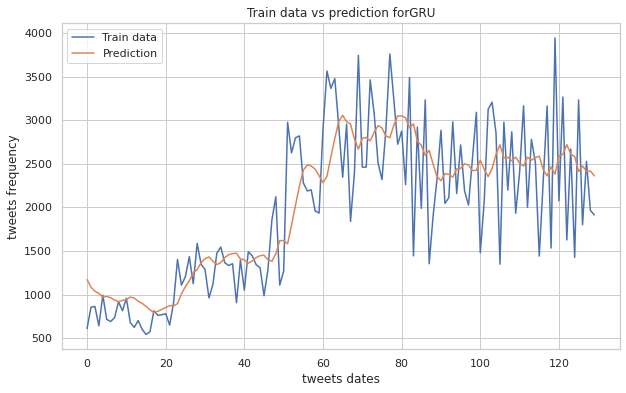

In [297]:
def prediction(model):
    prediction = model.predict(X_train)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)

# Plot test data vs prediction
def plot_future(prediction, model_name, y_train):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_train), 
             label="Train data")
    plt.plot(np.arange(range_future), 
             np.array(prediction),label="Prediction")
    plt.title("Train data vs prediction for" + model_name)
    plt.legend(loc="upper left")
    plt.xlabel("tweets dates")
    plt.ylabel("tweets frequency")
 
plot_future(prediction_gru, "GRU", y_train)

In [298]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ":")
    print("Mean Absolute Error: {:.4f}".format(mae))
    print("Root Mean Square Error: {:.4f}".format(rmse))
    print("")
evaluate_prediction(prediction_gru, y_train, "GRU")

GRU:
Mean Absolute Error: 433.3522
Root Mean Square Error: 559.3719



1/1 [==============================] - 0s 22ms/step


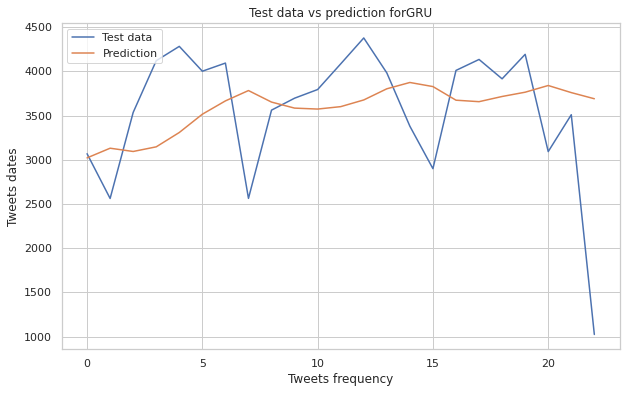

In [299]:
# Make prediction
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)
#prediction_bilstm = prediction(model_bilstm)
# Plot test data vs prediction
def plot_future(prediction, model_name, y_test):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), 
             label= "Test data")
    plt.plot(np.arange(range_future), 
             np.array(prediction),label="Prediction")
    plt.title("Test data vs prediction for" + model_name)
    plt.legend(loc="upper left")
    plt.xlabel("Tweets frequency")
    plt.ylabel("Tweets dates")
 
plot_future(prediction_gru, "GRU", y_test)

In [300]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ":")
    print("Mean Absolute Error: {:.4f}".format(mae))
    print("Root Mean Square Error: {:.4f}".format(rmse))
    print("")
evaluate_prediction(prediction_gru, y_test, "GRU")

GRU:
Mean Absolute Error: 584.9945
Root Mean Square Error: 795.3301



In [301]:
# gru for centre tweets

In [302]:
train_size = int(len(centre_gru)*0.8)

train_data = centre_gru.iloc[:train_size]
test_data = centre_gru.iloc[train_size:]

In [303]:
scaler = MinMaxScaler().fit(train_data)
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

In [304]:
def create_dataset (X, look_back = 1):
    Xs, ys = [], []
 
    for i in range(len(X)-look_back):
        v = X[i:i+look_back]
        Xs.append(v)
        ys.append(X[i+look_back])
 
    return np.array(Xs), np.array(ys)
LOOK_BACK = 14
X_train, y_train = create_dataset(train_scaled,LOOK_BACK)
X_test, y_test = create_dataset(test_scaled,LOOK_BACK)
# Print data shape
print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
print("X_test.shape: ", X_test.shape) 
print("y_test.shape: ", y_test.shape)

X_train.shape:  (130, 14, 1)
y_train.shape:  (130, 1)
X_test.shape:  (23, 14, 1)
y_test.shape:  (23, 1)


In [305]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = "val_loss",
                                               patience = 10)
    history = model.fit(X_train, y_train, epochs = 100,  
                        validation_split = 0.2,
                        batch_size = 16, shuffle = False, 
                        callbacks = [early_stop])
    return history
history_gru = fit_model(model_gru)

Epoch 1/100
7/7 [==============================] - 0s 18ms/step - loss: 0.0260 - val_loss: 0.0578
Epoch 2/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0257 - val_loss: 0.0572
Epoch 3/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0274 - val_loss: 0.0574
Epoch 4/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0256 - val_loss: 0.0582
Epoch 5/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0271 - val_loss: 0.0564
Epoch 6/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0267 - val_loss: 0.0570
Epoch 7/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0278 - val_loss: 0.0568
Epoch 8/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0264 - val_loss: 0.0557
Epoch 9/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0263 - val_loss: 0.0579
Epoch 10/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0271 - val_loss: 0.0560
Epoch 11/100
7/7 [=

In [306]:
y_test = scaler.inverse_transform(y_test)
y_train = scaler.inverse_transform(y_train)

5/5 [==============================] - 0s 3ms/step


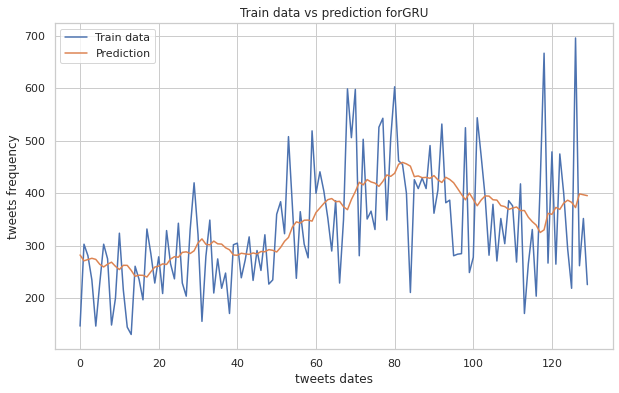

In [307]:
def prediction(model):
    prediction = model.predict(X_train)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)

# Plot test data vs prediction
def plot_future(prediction, model_name, y_train):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_train), 
             label="Train data")
    plt.plot(np.arange(range_future), 
             np.array(prediction),label="Prediction")
    plt.title("Train data vs prediction for" + model_name)
    plt.legend(loc="upper left")
    plt.xlabel("tweets dates")
    plt.ylabel("tweets frequency")
 
plot_future(prediction_gru, "GRU", y_train)

In [308]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ":")
    print("Mean Absolute Error: {:.4f}".format(mae))
    print("Root Mean Square Error: {:.4f}".format(rmse))
    print("")
evaluate_prediction(prediction_gru, y_train, "GRU")

GRU:
Mean Absolute Error: 77.5701
Root Mean Square Error: 99.2759



1/1 [==============================] - 0s 22ms/step


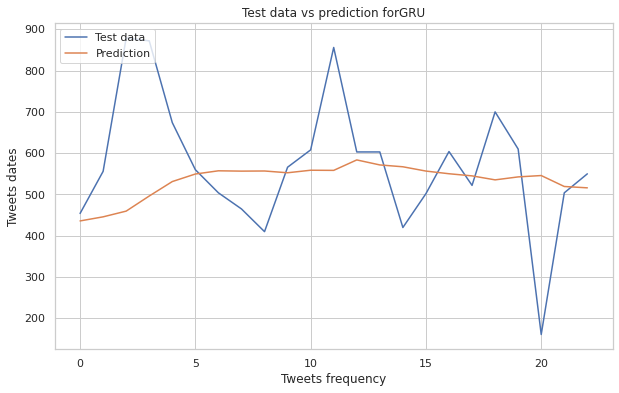

In [309]:
# Make prediction
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)
#prediction_bilstm = prediction(model_bilstm)
# Plot test data vs prediction
def plot_future(prediction, model_name, y_test):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), 
             label= "Test data")
    plt.plot(np.arange(range_future), 
             np.array(prediction),label="Prediction")
    plt.title("Test data vs prediction for" + model_name)
    plt.legend(loc="upper left")
    plt.xlabel("Tweets frequency")
    plt.ylabel("Tweets dates")
 
plot_future(prediction_gru, "GRU", y_test)

In [310]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ":")
    print("Mean Absolute Error: {:.4f}".format(mae))
    print("Root Mean Square Error: {:.4f}".format(rmse))
    print("")
evaluate_prediction(prediction_gru, y_test, "GRU")

GRU:
Mean Absolute Error: 118.4355
Root Mean Square Error: 172.5062



In [311]:
# GRU for right leaning tweets

In [312]:
train_size = int(len(right_leaning_gru)*0.8)

train_data = right_leaning_gru.iloc[:train_size]
test_data = right_leaning_gru.iloc[train_size:]

In [313]:
scaler = MinMaxScaler().fit(train_data)
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

In [314]:
def create_dataset (X, look_back = 1):
    Xs, ys = [], []
 
    for i in range(len(X)-look_back):
        v = X[i:i+look_back]
        Xs.append(v)
        ys.append(X[i+look_back])
 
    return np.array(Xs), np.array(ys)
LOOK_BACK = 14
X_train, y_train = create_dataset(train_scaled,LOOK_BACK)
X_test, y_test = create_dataset(test_scaled,LOOK_BACK)
# Print data shape
print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
print("X_test.shape: ", X_test.shape) 
print("y_test.shape: ", y_test.shape)

X_train.shape:  (130, 14, 1)
y_train.shape:  (130, 1)
X_test.shape:  (23, 14, 1)
y_test.shape:  (23, 1)


In [315]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = "val_loss",
                                               patience = 10)
    history = model.fit(X_train, y_train, epochs = 100,  
                        validation_split = 0.2,
                        batch_size = 16, shuffle = False, 
                        callbacks = [early_stop])
    return history
history_gru = fit_model(model_gru)

Epoch 1/100
7/7 [==============================] - 0s 19ms/step - loss: 0.0402 - val_loss: 0.0317
Epoch 2/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0415 - val_loss: 0.0317
Epoch 3/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0377 - val_loss: 0.0326
Epoch 4/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0412 - val_loss: 0.0320
Epoch 5/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0388 - val_loss: 0.0321
Epoch 6/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0400 - val_loss: 0.0322
Epoch 7/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0385 - val_loss: 0.0321
Epoch 8/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0374 - val_loss: 0.0329
Epoch 9/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0371 - val_loss: 0.0331
Epoch 10/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0379 - val_loss: 0.0324
Epoch 11/100
7/7 [=

In [316]:
y_test = scaler.inverse_transform(y_test)
y_train = scaler.inverse_transform(y_train)

5/5 [==============================] - 0s 2ms/step


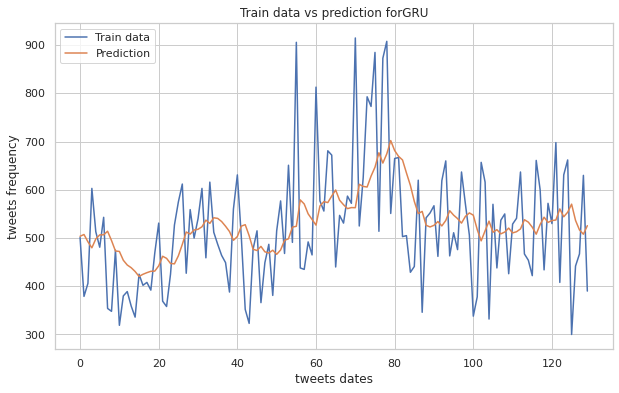

In [317]:
def prediction(model):
    prediction = model.predict(X_train)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)

# Plot test data vs prediction
def plot_future(prediction, model_name, y_train):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_train), 
             label="Train data")
    plt.plot(np.arange(range_future), 
             np.array(prediction),label="Prediction")
    plt.title("Train data vs prediction for" + model_name)
    plt.legend(loc="upper left")
    plt.xlabel("tweets dates")
    plt.ylabel("tweets frequency")
 
plot_future(prediction_gru, "GRU", y_train)

In [318]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ":")
    print("Mean Absolute Error: {:.4f}".format(mae))
    print("Root Mean Square Error: {:.4f}".format(rmse))
    print("")
evaluate_prediction(prediction_gru, y_train, "GRU")

GRU:
Mean Absolute Error: 92.4455
Root Mean Square Error: 116.2327



1/1 [==============================] - 0s 22ms/step


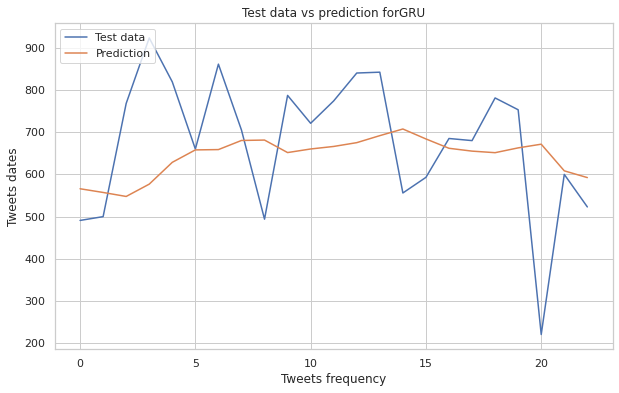

In [319]:
# Make prediction
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)
#prediction_bilstm = prediction(model_bilstm)
# Plot test data vs prediction
def plot_future(prediction, model_name, y_test):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), 
             label= "Test data")
    plt.plot(np.arange(range_future), 
             np.array(prediction),label="Prediction")
    plt.title("Test data vs prediction for" + model_name)
    plt.legend(loc="upper left")
    plt.xlabel("Tweets frequency")
    plt.ylabel("Tweets dates")
 
plot_future(prediction_gru, "GRU", y_test)

In [320]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ":")
    print("Mean Absolute Error: {:.4f}".format(mae))
    print("Root Mean Square Error: {:.4f}".format(rmse))
    print("")
evaluate_prediction(prediction_gru, y_test, "GRU")

GRU:
Mean Absolute Error: 128.8234
Root Mean Square Error: 166.6236



In [321]:
# Gru for left leaning tweets

In [322]:
train_size = int(len(left_leaning_gru)*0.8)

train_data = left_leaning_gru.iloc[:train_size]
test_data = left_leaning_gru.iloc[train_size:]

In [323]:
scaler = MinMaxScaler().fit(train_data)
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

In [324]:
def create_dataset (X, look_back = 1):
    Xs, ys = [], []
 
    for i in range(len(X)-look_back):
        v = X[i:i+look_back]
        Xs.append(v)
        ys.append(X[i+look_back])
 
    return np.array(Xs), np.array(ys)
LOOK_BACK = 14
X_train, y_train = create_dataset(train_scaled,LOOK_BACK)
X_test, y_test = create_dataset(test_scaled,LOOK_BACK)
# Print data shape
print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
print("X_test.shape: ", X_test.shape) 
print("y_test.shape: ", y_test.shape)

X_train.shape:  (130, 14, 1)
y_train.shape:  (130, 1)
X_test.shape:  (23, 14, 1)
y_test.shape:  (23, 1)


In [325]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = "val_loss",
                                               patience = 10)
    history = model.fit(X_train, y_train, epochs = 100,  
                        validation_split = 0.2,
                        batch_size = 16, shuffle = False, 
                        callbacks = [early_stop])
    return history
history_gru = fit_model(model_gru)

Epoch 1/100
7/7 [==============================] - 0s 18ms/step - loss: 0.0385 - val_loss: 0.0646
Epoch 2/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0407 - val_loss: 0.0643
Epoch 3/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0388 - val_loss: 0.0640
Epoch 4/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0403 - val_loss: 0.0637
Epoch 5/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0406 - val_loss: 0.0635
Epoch 6/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0380 - val_loss: 0.0632
Epoch 7/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0384 - val_loss: 0.0631
Epoch 8/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0412 - val_loss: 0.0629
Epoch 9/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0419 - val_loss: 0.0628
Epoch 10/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0420 - val_loss: 0.0625
Epoch 11/100
7/7 [=

In [326]:
y_test = scaler.inverse_transform(y_test)
y_train = scaler.inverse_transform(y_train)

5/5 [==============================] - 0s 3ms/step


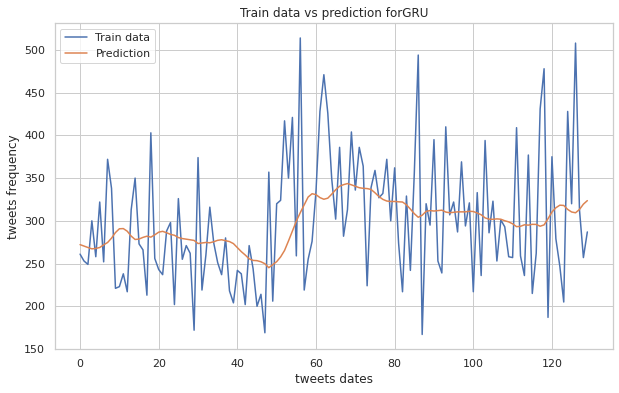

In [327]:
def prediction(model):
    prediction = model.predict(X_train)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)

# Plot test data vs prediction
def plot_future(prediction, model_name, y_train):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_train), 
             label="Train data")
    plt.plot(np.arange(range_future), 
             np.array(prediction),label="Prediction")
    plt.title("Train data vs prediction for" + model_name)
    plt.legend(loc="upper left")
    plt.xlabel("tweets dates")
    plt.ylabel("tweets frequency")
 
plot_future(prediction_gru, "GRU", y_train)

In [328]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ":")
    print("Mean Absolute Error: {:.4f}".format(mae))
    print("Root Mean Square Error: {:.4f}".format(rmse))
    print("")
evaluate_prediction(prediction_gru, y_train, "GRU")

GRU:
Mean Absolute Error: 55.1336
Root Mean Square Error: 70.6797



1/1 [==============================] - 0s 22ms/step


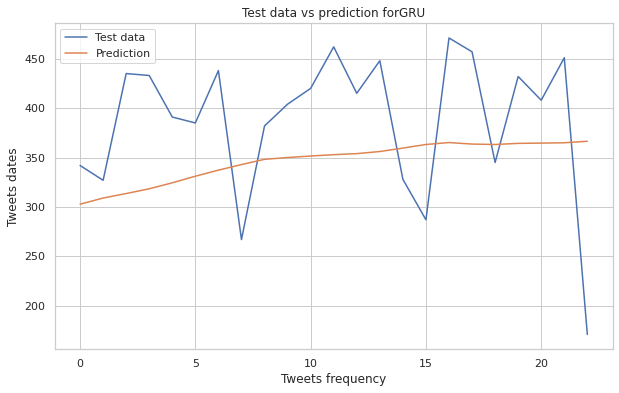

In [329]:
# Make prediction
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)
#prediction_bilstm = prediction(model_bilstm)
# Plot test data vs prediction
def plot_future(prediction, model_name, y_test):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), 
             label= "Test data")
    plt.plot(np.arange(range_future), 
             np.array(prediction),label="Prediction")
    plt.title("Test data vs prediction for" + model_name)
    plt.legend(loc="upper left")
    plt.xlabel("Tweets frequency")
    plt.ylabel("Tweets dates")
 
plot_future(prediction_gru, "GRU", y_test)

In [330]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ":")
    print("Mean Absolute Error: {:.4f}".format(mae))
    print("Root Mean Square Error: {:.4f}".format(rmse))
    print("")
evaluate_prediction(prediction_gru, y_test, "GRU")

GRU:
Mean Absolute Error: 75.0510
Root Mean Square Error: 84.6750



In [109]:
likes=[]

In [110]:
for i in df.index:
    likes.append(df["data"][i]["like_count"])
    

In [111]:
df_required["likes_count"]=likes

In [112]:
df_required.head()

TimeStamps  \
0 2018-02-18 21:52:01+00:00   
1 2018-02-19 00:17:25+00:00   
2 2018-02-19 10:02:34+00:00   
3 2018-02-19 16:25:48+00:00   
4 2018-02-20 05:12:18+00:00   

                                                urls  likes_count  
0  http://www.latimes.com/local/lanow/la-me-weins...            2  
1  http://dailycaller.com/2015/10/12/remember-the...            0  
2  https://www.leafly.com/news/health/a-guide-to-...            0  
3  http://www.foxnews.com/world/2018/02/18/iran-f...            1  
4  http://www.thegatewaypundit.com/2018/02/sarah-...            0

In [113]:
x1=df_required[["TimeStamps","urls","likes_count"]].to_numpy()

In [114]:
left_timestamps1=[]
right_timestamps1=[]
centre_timestamps1=[]
left_leaning_timestamps1 =[]
right_leaning_timestamps1 =[]
left_likes=[]
right_likes=[]
centre_likes=[]
left_leaning_likes=[]
right_leaning_likes=[]


In [115]:
for y in x1:
    for sub  in left_suburls:
        if y[1] is not np.nan:
            if sub in str(y[1]):
                date_format = '%a %b %d %H:%M:%S %z %Y'
                #date_object = datetime.strptime(y[0], date_format)
                left_timestamps1.append(y[0].date())
                left_likes.append(y[2])
                ##left_dislikes.append(y[3])
                #left_reposts.append(y[3])

In [116]:
df_left_timestamps1=pd.DataFrame()

In [117]:
df_left_timestamps1['timestamps']=pd.DataFrame(left_timestamps1)

In [118]:
df_left_timestamps1['likes']=left_likes

In [119]:
df_left_timestamps1.head()

timestamps  likes
0  2018-02-19      0
1  2018-02-22      0
2  2018-02-20      0
3  2018-02-21      2
4  2018-02-19      7

In [120]:
df_left_timestamps2=df_left_timestamps1.drop_duplicates(keep='first')

In [121]:
left_likes_frequency=dict(zip(df_left_timestamps2.timestamps, df_left_timestamps2.likes))

In [122]:
for i in range(4138,len(df_left_timestamps1)):
    left_likes_frequency[df_left_timestamps1.loc[i,"timestamps"]]+=df_left_timestamps1.loc[i,"likes"]

In [123]:
t1=[]
like=[]

In [124]:
for key in left_likes_frequency:
    t1.append(key)
    like.append(left_likes_frequency[key])

In [125]:
l3 = {'Date':t1,'likes_count':like}
left_likes_dataset=pd.DataFrame(l3)

In [126]:
left_likes_dataset.head()

Date  likes_count
0  2018-02-19            3
1  2018-02-22           20
2  2018-02-20           12
3  2018-02-21            9
4  2018-02-23           55

In [127]:
# getting right likes

In [128]:
for y in x1:
    for sub  in right_suburls:
        if y[1] is not np.nan:
            if sub in str(y[1]):
                date_format = '%a %b %d %H:%M:%S %z %Y'
                #date_object = datetime.strptime(y[0], date_format)
                right_timestamps1.append(y[0].date())
                right_likes.append(y[2])
                ##left_dislikes.append(y[3])
                #left_reposts.append(y[3])

In [129]:
df_right_timestamps1=pd.DataFrame()

In [130]:
df_right_timestamps1['timestamps']=pd.DataFrame(right_timestamps1)

In [131]:
df_right_timestamps1['likes']=right_likes

In [132]:
df_right_timestamps1.head()

timestamps  likes
0  2018-02-23      1
1  2018-02-24      0
2  2018-02-19      1
3  2018-02-21      0
4  2018-02-22      4

In [133]:
df_right_timestamps2=df_right_timestamps1.drop_duplicates(keep='first')

In [134]:
right_likes_frequency=dict(zip(df_right_timestamps2.timestamps, df_right_timestamps2.likes))

In [135]:
for i in range(4138,len(df_right_timestamps1)):
    right_likes_frequency[df_right_timestamps1.loc[i,"timestamps"]]+=df_right_timestamps1.loc[i,"likes"]

In [136]:
t1=[]
like=[]

In [137]:
for key in right_likes_frequency:
    t1.append(key)
    like.append(right_likes_frequency[key])

In [138]:
l3 = {'Date':t1,'likes_count':like}
right_likes_dataset=pd.DataFrame(l3)

In [139]:
right_likes_dataset.head()

Date  likes_count
0  2018-02-23          121
1  2018-02-24           27
2  2018-02-19           82
3  2018-02-21           61
4  2018-02-22          278

In [140]:
# centre likes 

In [141]:
for y in x1:
    for sub  in centre_suburls:
        if y[1] is not np.nan:
            if sub in str(y[1]):
                date_format = '%a %b %d %H:%M:%S %z %Y'
                #date_object = datetime.strptime(y[0], date_format)
                centre_timestamps1.append(y[0].date())
                centre_likes.append(y[2])
                ##left_dislikes.append(y[3])
                #left_reposts.append(y[3])
                
df_centre_timestamps1=pd.DataFrame()
df_centre_timestamps1['timestamps']=pd.DataFrame(centre_timestamps1)
df_centre_timestamps1['likes']=centre_likes
df_centre_timestamps1.head()
df_centre_timestamps2=df_centre_timestamps1.drop_duplicates(keep='first')
centre_likes_frequency=dict(zip(df_centre_timestamps2.timestamps, df_centre_timestamps2.likes))

for i in range(4138,len(df_centre_timestamps1)):
    centre_likes_frequency[df_centre_timestamps1.loc[i,"timestamps"]]+=df_centre_timestamps1.loc[i,"likes"]
    
t1=[]
like=[]

for key in centre_likes_frequency:
    t1.append(key)
    like.append(centre_likes_frequency[key])
    
l3 = {'Date':t1,'likes_count':like}
centre_likes_dataset=pd.DataFrame(l3)

centre_likes_dataset.head()
 

Date  likes_count
0  2018-02-22           73
1  2018-02-23           46
2  2018-02-25          171
3  2018-02-20            8
4  2018-02-18           25

In [142]:
# left leaning likes

In [143]:
for y in x1:
    for sub  in left_leaning_suburls:
        if y[1] is not np.nan:
            if sub in str(y[1]):
                date_format = '%a %b %d %H:%M:%S %z %Y'
                #date_object = datetime.strptime(y[0], date_format)
                left_leaning_timestamps1.append(y[0].date())
                left_leaning_likes.append(y[2])
                ##left_dislikes.append(y[3])
                #left_reposts.append(y[3])
                
df_left_leaning_timestamps1=pd.DataFrame()
df_left_leaning_timestamps1['timestamps']=pd.DataFrame(left_leaning_timestamps1)
df_left_leaning_timestamps1['likes']=left_leaning_likes
df_left_leaning_timestamps1.head()
df_left_leaning_timestamps2=df_left_leaning_timestamps1.drop_duplicates(keep='first')
left_leaning_likes_frequency=dict(zip(df_left_leaning_timestamps2.timestamps, df_left_leaning_timestamps2.likes))

for i in range(4138,len(df_left_leaning_timestamps1)):
    left_leaning_likes_frequency[df_left_leaning_timestamps1.loc[i,"timestamps"]]+=df_left_leaning_timestamps1.loc[i,"likes"]
    
t1=[]
like=[]

for key in left_leaning_likes_frequency:
    t1.append(key)
    like.append(left_leaning_likes_frequency[key])
    
l3 = {'Date':t1,'likes_count':like}
left_leaning_likes_dataset=pd.DataFrame(l3)

left_leaning_likes_dataset.head()
 

Date  likes_count
0  2018-02-21            9
1  2018-02-23           20
2  2018-02-24           10
3  2018-02-19            5
4  2018-02-25          106

In [144]:
# right leaning likes

In [145]:
for y in x1:
    for sub  in right_leaning_suburls:
        if y[1] is not np.nan:
            if sub in str(y[1]):
                date_format = '%a %b %d %H:%M:%S %z %Y'
                #date_object = datetime.strptime(y[0], date_format)
                right_leaning_timestamps1.append(y[0].date())
                right_leaning_likes.append(y[2])
                ##left_dislikes.append(y[3])
                #left_reposts.append(y[3])
                
df_right_leaning_timestamps1=pd.DataFrame()
df_right_leaning_timestamps1['timestamps']=pd.DataFrame(right_leaning_timestamps1)
df_right_leaning_timestamps1['likes']=right_leaning_likes
df_right_leaning_timestamps1.head()
df_right_leaning_timestamps2=df_right_leaning_timestamps1.drop_duplicates(keep='first')
right_leaning_likes_frequency=dict(zip(df_right_leaning_timestamps2.timestamps, df_right_leaning_timestamps2.likes))

for i in range(4138,len(df_right_leaning_timestamps1)):
    right_leaning_likes_frequency[df_right_leaning_timestamps1.loc[i,"timestamps"]]+=df_right_leaning_timestamps1.loc[i,"likes"]
    
t1=[]
like=[]

for key in right_leaning_likes_frequency:
    t1.append(key)
    like.append(right_leaning_likes_frequency[key])
    
l3 = {'Date':t1,'likes_count':like}
right_leaning_likes_dataset=pd.DataFrame(l3)

right_leaning_likes_dataset.head()
 

Date  likes_count
0  2018-02-22           16
1  2018-02-17          277
2  2018-02-19           12
3  2018-02-20            9
4  2018-02-24           81

In [146]:
# multiple line plots

In [147]:
left_likes_dataset['Date'] = pd.to_datetime(left_dataset['Date'], format='%Y-%m-%d')
left_likes_filtered=left_likes_dataset.loc[(left_likes_dataset['Date'] >= '2018-05-01') & (left_likes_dataset['Date'] <= '2018-12-31')]
right_likes_dataset['Date'] = pd.to_datetime(right_dataset['Date'], format='%Y-%m-%d')
right_likes_filtered=right_likes_dataset.loc[(right_likes_dataset['Date'] >= '2018-05-01') & (right_likes_dataset['Date'] <= '2018-12-31')]
centre_likes_dataset['Date'] = pd.to_datetime(centre_dataset['Date'], format='%Y-%m-%d')
centre_likes_filtered=centre_likes_dataset.loc[(centre_likes_dataset['Date'] >= '2018-05-01') & (centre_likes_dataset['Date'] <= '2018-12-31')]
left_leaning_likes_dataset['Date'] = pd.to_datetime(left_leaning_dataset['Date'], format='%Y-%m-%d')
left_leaning_likes_filtered= left_leaning_likes_dataset.loc[(left_leaning_likes_dataset['Date'] >= '2018-05-01') & (left_leaning_likes_dataset['Date'] <= '2018-12-31')]
right_leaning_likes_dataset['Date'] = pd.to_datetime(right_leaning_dataset['Date'], format='%Y-%m-%d')
right_leaning_likes_filtered= right_leaning_likes_dataset.loc[(right_leaning_likes_dataset['Date'] >= '2018-05-01') & (right_leaning_likes_dataset['Date'] <= '2018-12-31')]
                                                            




In [148]:

merged_likes_df = pd.merge(left_likes_filtered, right_likes_filtered, on='Date')
merged_likes_df = pd.merge(merged_likes_df, centre_likes_filtered, on='Date')
merged_likes_df = pd.merge(merged_likes_df, left_leaning_likes_filtered, on='Date')
merged_likes_df = pd.merge(merged_likes_df, right_leaning_likes_filtered, on='Date')


merged_likes_df.columns = ['Date', 'left_likes_frequency', 'right_likes_frequency', 'centre_likes_frequency', 'left_leaning_likes_frequency', 'right_leaning_likes_frequency']


merged_likes_df['Date'] = pd.to_datetime(merged_likes_df['Date'])


#merged_df.set_index('timestamp', inplace=True)

/tmp/ipykernel_863623/3205739213.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'likes_count_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_likes_df = pd.merge(merged_likes_df, left_leaning_likes_filtered, on='Date')


In [149]:
merged_likes_df

Date  left_likes_frequency  right_likes_frequency  \
0   2018-05-01                    55                   1258   
1   2018-05-02                    51                   1826   
2   2018-05-03                    11                   1238   
3   2018-05-28                    93                   1212   
4   2018-05-29                   193                   1248   
..         ...                   ...                    ...   
176 2018-10-20                   230                   5454   
177 2018-10-25                   162                   6531   
178 2018-10-27                   172                   5785   
179 2018-10-26                   241                   7250   
180 2018-10-28                    56                   1067   

     centre_likes_frequency  left_leaning_likes_frequency  \
0                       436                           574   
1                       736                           437   
2                       490                           564   
3                       274                           479   
4                       351                          1080   
..                      ...                           ...   
176                    1260                           732   
177                    1429                           401   
178                     855                           644   
179                     732                           548   
180                     269                           190   

     right_leaning_likes_frequency  
0                              843  
1                             1680  
2                             1479  
3                             1447  
4                             1061  
..                             ...  
176                            824  
177                            653  
178                            537  
179                            981  
180                            158  

[181 rows x 6 columns]

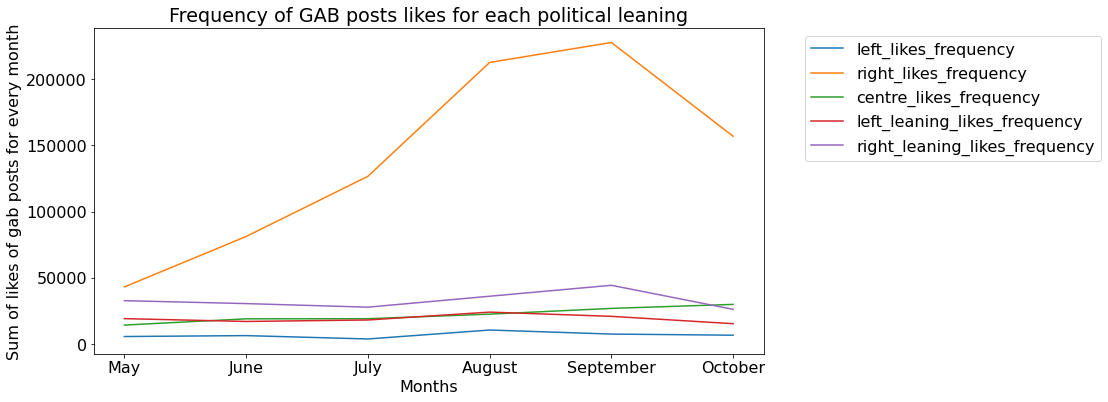

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar


merged_likes_df['month'] = merged_likes_df['Date'].dt.month
#merged_df['month'] = merged_df['month'].apply(lambda x: calendar.month_abbr[x])
#merged_df = merged_df.sort_values('month')

# Group the data by month and calculate the average frequency for each variable
monthly_freq = merged_likes_df.groupby('month').sum()

plt.figure(figsize=(12, 6))
plt.rcParams['font.size'] = '16'
# Create a line plot for each variable
variables = ['left_likes_frequency', 'right_likes_frequency', 'centre_likes_frequency', 'left_leaning_likes_frequency', 'right_leaning_likes_frequency']
for var in variables:
    plt.plot(monthly_freq.index, monthly_freq[var], label=var)

month_names = ["May","June","July","August","September","October"]
plt.xticks(monthly_freq.index, month_names)
plt.xlabel('Months')
plt.ylabel('Sum of likes of gab posts for every month')
plt.title('Frequency of GAB posts likes for each political leaning')

# Add a legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()


In [373]:
monthly_freq

left_likes_frequency  right_likes_frequency  centre_likes_frequency  left_leaning_likes_frequency  right_leaning_likes_frequency
month                                                                                                                                  
5                      5739                  43179                   14393                         19239                          32801
6                      6438                  81248                   19099                         17115                          30597
7                      3895                 126644                   19199                         18225                          27901
8                     10648                 212599                   22616                         24159                          36158
9                      7599                 227679                   26976                         20980                          44410
10                     6748                 156876                   29986                         15429                          26259

In [374]:
# preprocessing of likes

In [375]:
left_likes_dataset['Date'] = pd.to_datetime(left_dataset['Date'], format='%Y-%m-%d')
left_likes_filtered=left_likes_dataset.loc[(left_likes_dataset['Date'] >= '2018-05-01') & (left_likes_dataset['Date'] <= '2018-12-31')]
from datetime import datetime
con=left_likes_filtered['Date']
left_likes_filtered['Date']=pd.to_datetime(left_likes_filtered['Date'])
left_likes_filtered.set_index('Date', inplace=True)
#check datatype of index
left_likes_filtered.index                                 #converting object type of month to timestamp of dataframe of datatime64[ns]
left_likes_ts = left_likes_filtered['likes_count']
left_likes_ts.head(10)

/tmp/ipykernel_623782/3099160170.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_likes_filtered['Date']=pd.to_datetime(left_likes_filtered['Date'])


Date
2018-05-01     55
2018-05-02     51
2018-05-03     11
2018-05-28     93
2018-05-29    193
2018-06-02    127
2018-05-30    127
2018-06-04    104
2018-06-01    279
2018-06-05    217
Name: likes_count, dtype: int64

In [376]:
right_likes_dataset['Date'] = pd.to_datetime(right_dataset['Date'], format='%Y-%m-%d')
right_likes_filtered=right_likes_dataset.loc[(right_likes_dataset['Date'] >= '2018-05-01') & (right_likes_dataset['Date'] <= '2018-12-31')]
from datetime import datetime
con=right_likes_filtered['Date']
right_likes_filtered['Date']=pd.to_datetime(right_likes_filtered['Date'])
right_likes_filtered.set_index('Date', inplace=True)
#check datatype of index
right_likes_filtered.index                                 #converting object type of month to timestamp of dataframe of datatime64[ns]
right_likes_ts = right_likes_filtered['likes_count']
right_likes_ts.head(10)

/tmp/ipykernel_623782/1334449091.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_likes_filtered['Date']=pd.to_datetime(right_likes_filtered['Date'])


Date
2018-05-02    1826
2018-05-03    1238
2018-05-01    1258
2018-05-29    1248
2018-05-30    1419
2018-05-31    1551
2018-06-01    2718
2018-06-02    2462
2018-06-03    2167
2018-06-04    2741
Name: likes_count, dtype: int64

In [377]:
centre_likes_dataset['Date'] = pd.to_datetime(centre_dataset['Date'], format='%Y-%m-%d')
centre_likes_filtered=centre_likes_dataset.loc[(centre_likes_dataset['Date'] >= '2018-05-01') & (centre_likes_dataset['Date'] <= '2018-12-31')]
from datetime import datetime
con=centre_likes_filtered['Date']
centre_likes_filtered['Date']=pd.to_datetime(centre_likes_filtered['Date'])
centre_likes_filtered.set_index('Date', inplace=True)
#check datatype of index
centre_likes_filtered.index                                 #converting object type of month to timestamp of dataframe of datatime64[ns]
centre_likes_ts = centre_likes_filtered['likes_count']
centre_likes_ts.head(10)

/tmp/ipykernel_623782/2149077913.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  centre_likes_filtered['Date']=pd.to_datetime(centre_likes_filtered['Date'])


Date
2018-05-01     436
2018-05-02     736
2018-05-03     490
2018-05-31     748
2018-05-29     351
2018-06-04    1278
2018-06-03     557
2018-05-30     379
2018-06-01     615
2018-06-05     874
Name: likes_count, dtype: int64

In [378]:
left_leaning_likes_dataset['Date'] = pd.to_datetime(left_leaning_dataset['Date'], format='%Y-%m-%d')
left_leaning_likes_filtered= left_leaning_likes_dataset.loc[(left_leaning_likes_dataset['Date'] >= '2018-05-01') & (left_leaning_likes_dataset['Date'] <= '2018-12-31')]
from datetime import datetime
con=left_leaning_likes_filtered['Date']
left_leaning_likes_filtered['Date']=pd.to_datetime(left_leaning_likes_filtered['Date'])
left_leaning_likes_filtered.set_index('Date', inplace=True)
#check datatype of index
left_leaning_likes_filtered.index                                 #converting object type of month to timestamp of dataframe of datatime64[ns]
left_leaning_likes_ts = left_leaning_likes_filtered['likes_count']
left_leaning_likes_ts.head(10)

/tmp/ipykernel_623782/730871097.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_leaning_likes_filtered['Date']=pd.to_datetime(left_leaning_likes_filtered['Date'])


Date
2018-05-01    574
2018-05-03    564
2018-05-02    437
2018-05-30    482
2018-06-04    672
2018-05-28    479
2018-05-31    540
2018-06-01    461
2018-06-02    872
2018-06-03    568
Name: likes_count, dtype: int64

In [379]:
right_leaning_likes_dataset['Date'] = pd.to_datetime(right_leaning_dataset['Date'], format='%Y-%m-%d')
right_leaning_likes_filtered= right_leaning_likes_dataset.loc[(right_leaning_likes_dataset['Date'] >= '2018-05-01') & (right_leaning_likes_dataset['Date'] <= '2018-12-31')]
from datetime import datetime
con=right_leaning_likes_filtered['Date']
right_leaning_likes_filtered['Date']=pd.to_datetime(right_leaning_likes_filtered['Date'])
right_leaning_likes_filtered.set_index('Date', inplace=True)
#check datatype of index
right_leaning_likes_filtered.index                                 #converting object type of month to timestamp of dataframe of datatime64[ns]
right_leaning_likes_ts = right_leaning_likes_filtered['likes_count']
right_leaning_likes_ts.head(10)

/tmp/ipykernel_623782/2687261075.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_leaning_likes_filtered['Date']=pd.to_datetime(right_leaning_likes_filtered['Date'])


Date
2018-05-02    1680
2018-05-03    1479
2018-05-01     843
2018-05-29    1061
2018-05-30     872
2018-06-01     960
2018-05-31     961
2018-05-28    1447
2018-06-03     744
2018-06-04    1336
Name: likes_count, dtype: int64

In [380]:
# SARIMA MODEL PREDICTION OF LIKES

In [381]:
#left likes prediction

The series is stationary


/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/hom

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.33406D+00    |proj g|=  1.23488D+00


 This problem is unconstrained.



At iterate    5    f=  6.81843D+00    |proj g|=  3.95647D-02

At iterate   10    f=  6.81431D+00    |proj g|=  7.87854D-03

At iterate   15    f=  6.81205D+00    |proj g|=  4.00715D-03

At iterate   20    f=  6.81179D+00    |proj g|=  3.19304D-03

At iterate   25    f=  6.81155D+00    |proj g|=  2.25011D-03

At iterate   30    f=  6.81081D+00    |proj g|=  5.66788D-03

At iterate   35    f=  6.80933D+00    |proj g|=  1.00011D-02

At iterate   40    f=  6.80752D+00    |proj g|=  1.19418D-02

At iterate   45    f=  6.80481D+00    |proj g|=  1.31068D-02

At iterate   50    f=  6.80386D+00    |proj g|=  3.64406D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


the time of execution of Sarima for  for left twweets like in seconds is 35.14063382148743
RMSE OF SARIMA of LEFT Likes count: 223.0653


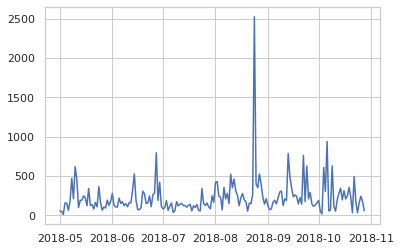

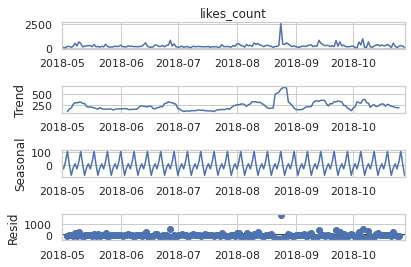

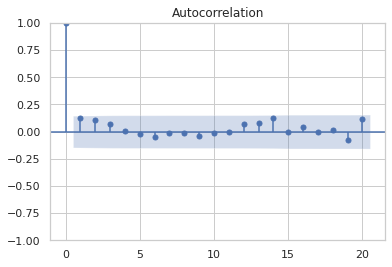

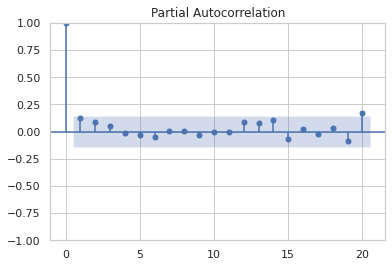

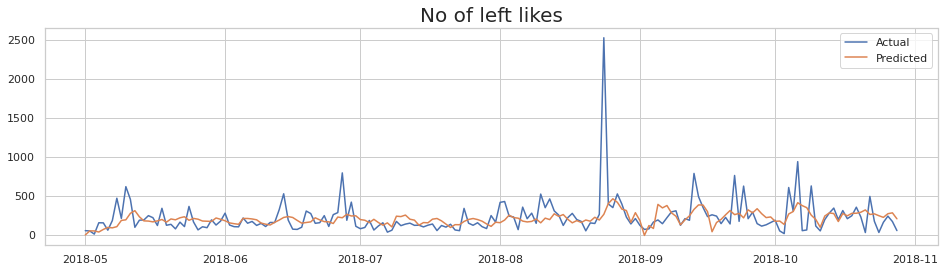

In [382]:
left_likes_ts=left_likes_ts.sort_index(ascending=True)
check_stationarity(left_likes_ts)
plt.plot(left_likes_ts)
result = seasonal_decompose(left_likes_ts,model='additive')      #applied seasonal decomposition to get trend and seasons.
fig = result.plot()
plot_acf(left_likes_ts, lags=20);
plot_pacf(left_likes_ts, lags=20);  #getting order of Auto regression (p) and getting number of forecast errors(q) to specify for the model.
                         #p is point where acf increased significantly, it can be any points but in our graph we get increasing trend at 0.

start_time13 = time.time()
sarima = SARIMAX(left_likes_ts, order=(11,1,6), seasonal_order=(3,0,4,12))
sarima_predictions = sarima.fit().predict()                            #Links to get SARIMAX parameters :- https://machinelearningmastery.com/how-to-grid-search-sarima-model-hyperparameters-for-time-series-forecasting-in-python/
                                                                       #https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/
    
print(f"the time of execution of Sarima for  for left twweets like in seconds is {time.time() - start_time13}")

plt.figure(figsize=(16,4))
plt.plot(left_likes_ts, label="Actual")
plt.plot(sarima_predictions, label="Predicted")
plt.title('No of left likes', fontsize=20)
#plt.ylabel('Sales', fontsize=16)
plt.legend()


print('RMSE OF SARIMA of LEFT Likes count: %.4f'%np.sqrt(sum((left_likes_ts-sarima_predictions)**2)/(len(left_likes_ts))))

The series is NOT stationary


/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving averag

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.24603D+00    |proj g|=  2.58332D-01


 This problem is unconstrained.



At iterate    5    f=  8.17686D+00    |proj g|=  1.05555D-01

At iterate   10    f=  8.16517D+00    |proj g|=  6.71242D-02

At iterate   15    f=  8.16319D+00    |proj g|=  2.47410D-02

At iterate   20    f=  8.16191D+00    |proj g|=  1.77780D-02

At iterate   25    f=  8.16029D+00    |proj g|=  2.92645D-02

At iterate   30    f=  8.15452D+00    |proj g|=  1.86885D-01

At iterate   35    f=  8.14956D+00    |proj g|=  4.29539D-02

At iterate   40    f=  8.14215D+00    |proj g|=  5.64920D-02

At iterate   45    f=  8.13623D+00    |proj g|=  2.63409D-02

At iterate   50    f=  8.13321D+00    |proj g|=  2.04845D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


the time of execution of Sarima for  for right twweets like in seconds is 52.45210123062134
RMSE OF SARIMA of right Likes count: 1265.4250


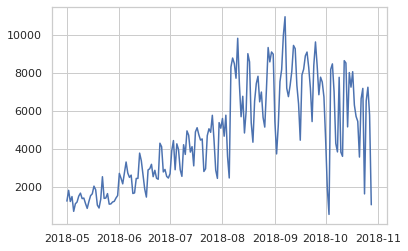

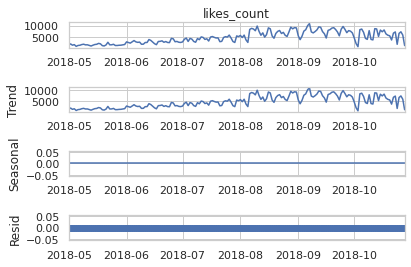

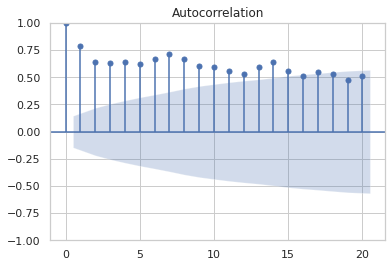

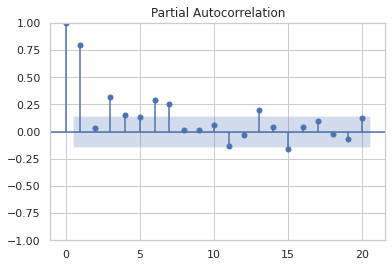

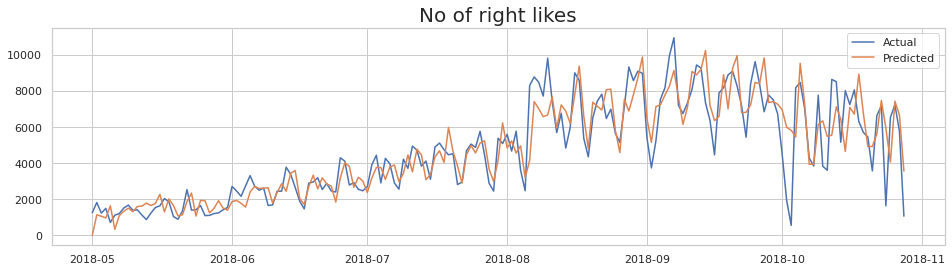

In [383]:
right_likes_ts= right_likes_ts.sort_index(ascending=True)
check_stationarity(right_likes_ts)
plt.plot(right_likes_ts)
result = seasonal_decompose(right_likes_ts,model='additive',extrapolate_trend='freq', period=1)      #applied seasonal decomposition to get trend and seasons.
fig = result.plot()
plot_acf(right_likes_ts, lags=20);
plot_pacf(right_likes_ts, lags=20);  #getting order of Auto regression (p) and getting number of forecast errors(q) to specify for the model.
                         #p is point where acf increased significantly, it can be any points but in our graph we get increasing trend at 0.

start_time13 = time.time()
sarima = SARIMAX(right_likes_ts, order=(9,1,11), seasonal_order=(1,1,3,12))
sarima_predictions = sarima.fit().predict()                            #Links to get SARIMAX parameters :- https://machinelearningmastery.com/how-to-grid-search-sarima-model-hyperparameters-for-time-series-forecasting-in-python/
                                                                       #https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/
    
print(f"the time of execution of Sarima for  for right twweets like in seconds is {time.time() - start_time13}")

plt.figure(figsize=(16,4))
plt.plot(right_likes_ts, label="Actual")
plt.plot(sarima_predictions, label="Predicted")
plt.title('No of right likes', fontsize=20)
#plt.ylabel('Sales', fontsize=16)
plt.legend()


print('RMSE OF SARIMA of right Likes count: %.4f'%np.sqrt(sum((right_likes_ts-sarima_predictions)**2)/(len(right_likes_ts))))

In [384]:
# centre likes forecasting

The series is stationary


/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           24     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.45006D+00    |proj g|=  5.43940D-01

At iterate    5    f=  7.19203D+00    |proj g|=  6.79426D-02

At iterate   10    f=  7.18651D+00    |proj g|=  2.20834D-02

At iterate   15    f=  7.18501D+00    |proj g|=  1.10085D-02

At iterate   20    f=  7.16851D+00    |proj g|=  5.07170D-02

At iterate   25    f=  7.16102D+00    |proj g|=  2.57923D-02

At iterate   30    f=  7.15378D+00    |proj g|=  3.49649D-02

At iterate   35    f=  7.15206D+00    |proj g|=  1.17568D-02

At iterate   40    f=  7.15119D+00    |proj g|=  1.56667D-02

At iterate   45    f=  7.15005D+00    |proj g|=  2.27736D-02


/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  7.14955D+00    |proj g|=  1.23644D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   24     50     61      1     0     0   1.236D-02   7.150D+00
  F =   7.1495523783603918     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
the time of execution of Sarima for  for centre tweets like in seconds is 43.93144249916077
RMSE OF SARIMA of centre Likes count: 310.9579


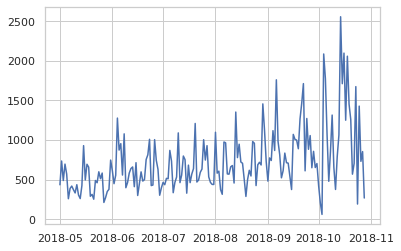

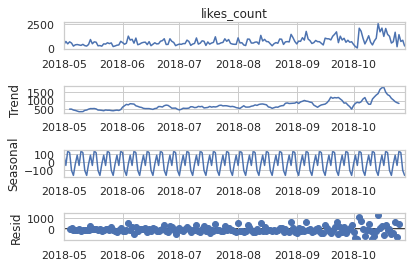

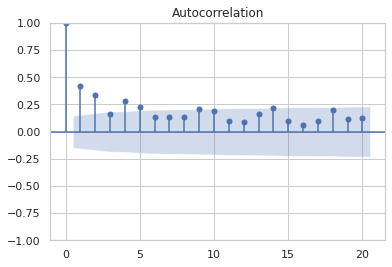

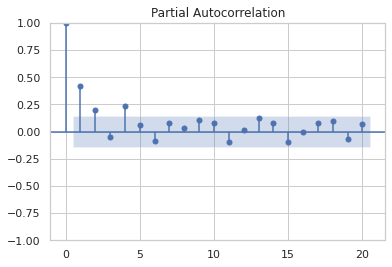

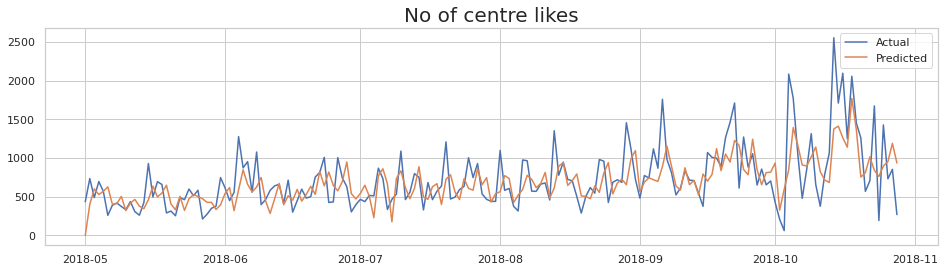

In [385]:
centre_likes_ts=centre_likes_ts.sort_index(ascending=True)
check_stationarity(centre_likes_ts)
plt.plot(centre_likes_ts)
result = seasonal_decompose(centre_likes_ts,model='additive')      #applied seasonal decomposition to get trend and seasons.
fig = result.plot()
plot_acf(centre_likes_ts, lags=20);
plot_pacf(centre_likes_ts, lags=20);  #getting order of Auto regression (p) and getting number of forecast errors(q) to specify for the model.
                         #p is point where acf increased significantly, it can be any points but in our graph we get increasing trend at 0.

start_time13 = time.time()
sarima = SARIMAX(centre_likes_ts, order=(8,1,11), seasonal_order=(4,0,0,12))
sarima_predictions = sarima.fit().predict()                            #Links to get SARIMAX parameters :- https://machinelearningmastery.com/how-to-grid-search-sarima-model-hyperparameters-for-time-series-forecasting-in-python/
                                                                       #https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/
    
print(f"the time of execution of Sarima for  for centre tweets like in seconds is {time.time() - start_time13}")

plt.figure(figsize=(16,4))
plt.plot(centre_likes_ts, label="Actual")
plt.plot(sarima_predictions, label="Predicted")
plt.title('No of centre likes', fontsize=20)
#plt.ylabel('Sales', fontsize=16)
plt.legend()


print('RMSE OF SARIMA of centre Likes count: %.4f'%np.sqrt(sum((centre_likes_ts-sarima_predictions)**2)/(len(centre_likes_ts))))

In [386]:
#left leaning tweets

The series is stationary


/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.22661D+00    |proj g|=  7.88535D-01


 This problem is unconstrained.



At iterate    5    f=  6.86823D+00    |proj g|=  5.45686D-02

At iterate   10    f=  6.85586D+00    |proj g|=  6.25949D-03

At iterate   15    f=  6.85309D+00    |proj g|=  2.49721D-02

At iterate   20    f=  6.84980D+00    |proj g|=  2.18117D-02

At iterate   25    f=  6.84857D+00    |proj g|=  1.41303D-02

At iterate   30    f=  6.84499D+00    |proj g|=  2.52250D-02

At iterate   35    f=  6.84358D+00    |proj g|=  6.55439D-03

At iterate   40    f=  6.84183D+00    |proj g|=  2.47465D-02

At iterate   45    f=  6.83917D+00    |proj g|=  1.86976D-02


/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  6.83633D+00    |proj g|=  2.12127D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25     50     60      1     0     0   2.121D-02   6.836D+00
  F =   6.8363261663878792     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
the time of execution of Sarima for  for left leaning like in seconds is 49.335493087768555
RMSE OF SARIMA of LEFT leaning Likes count: 235.6633


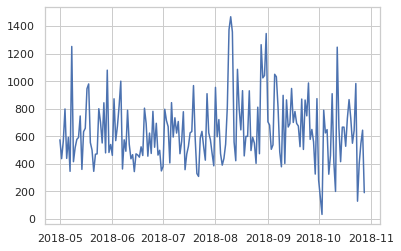

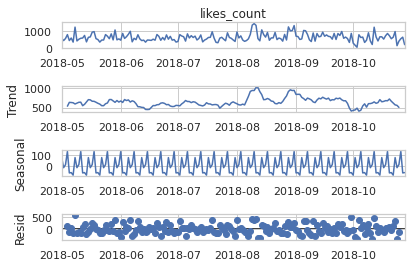

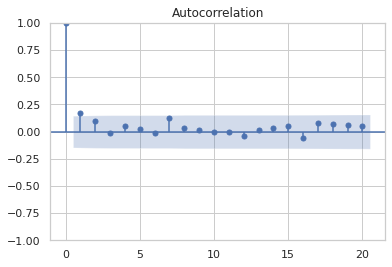

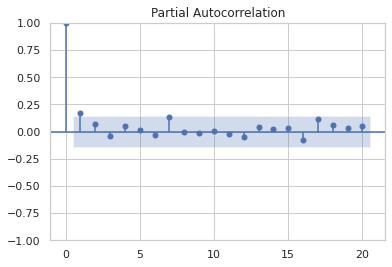

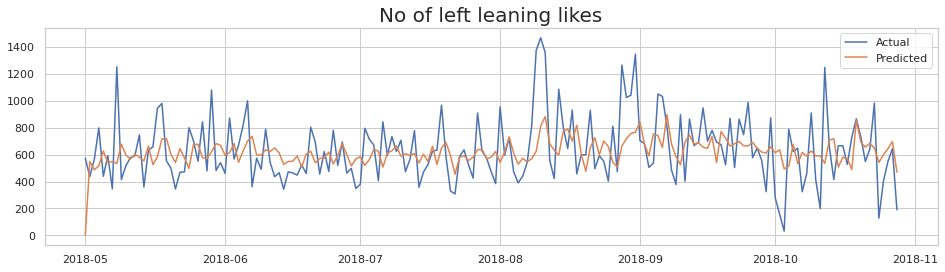

In [387]:
left_leaning_likes_ts=left_leaning_likes_ts.sort_index(ascending=True)
check_stationarity(left_leaning_likes_ts)
plt.plot(left_leaning_likes_ts)
result = seasonal_decompose(left_leaning_likes_ts,model='additive')      #applied seasonal decomposition to get trend and seasons.
fig = result.plot()
plot_acf(left_leaning_likes_ts, lags=20);
plot_pacf(left_leaning_likes_ts, lags=20);  #getting order of Auto regression (p) and getting number of forecast errors(q) to specify for the model.
                         #p is point where acf increased significantly, it can be any points but in our graph we get increasing trend at 0.

start_time13 = time.time()
sarima = SARIMAX(left_leaning_likes_ts, order=(11,1,6), seasonal_order=(3,0,4,12))
sarima_predictions = sarima.fit().predict()                            #Links to get SARIMAX parameters :- https://machinelearningmastery.com/how-to-grid-search-sarima-model-hyperparameters-for-time-series-forecasting-in-python/
                                                                       #https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/
    
print(f"the time of execution of Sarima for  for left leaning like in seconds is {time.time() - start_time13}")

plt.figure(figsize=(16,4))
plt.plot(left_leaning_likes_ts, label="Actual")
plt.plot(sarima_predictions, label="Predicted")
plt.title('No of left leaning likes', fontsize=20)
#plt.ylabel('Sales', fontsize=16)
plt.legend()


print('RMSE OF SARIMA of LEFT leaning Likes count: %.4f'%np.sqrt(sum((left_leaning_likes_ts-sarima_predictions)**2)/(len(left_leaning_likes_ts))))

The series is stationary


/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.03007D+00    |proj g|=  1.78638D-01


 This problem is unconstrained.



At iterate    5    f=  6.99521D+00    |proj g|=  8.78005D-03

At iterate   10    f=  6.99114D+00    |proj g|=  1.97267D-02

At iterate   15    f=  6.98795D+00    |proj g|=  1.55034D-02

At iterate   20    f=  6.98655D+00    |proj g|=  1.64116D-02

At iterate   25    f=  6.98548D+00    |proj g|=  1.60162D-02

At iterate   30    f=  6.98518D+00    |proj g|=  5.32111D-03

At iterate   35    f=  6.98458D+00    |proj g|=  1.31831D-02

At iterate   40    f=  6.98410D+00    |proj g|=  3.77940D-03

At iterate   45    f=  6.98388D+00    |proj g|=  4.93381D-03

At iterate   50    f=  6.98376D+00    |proj g|=  6.06241D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/srinath/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


the time of execution of Sarima for  for right leaning like in seconds is 43.030927658081055
RMSE OF SARIMA of right leaning Likes count: 395.3616


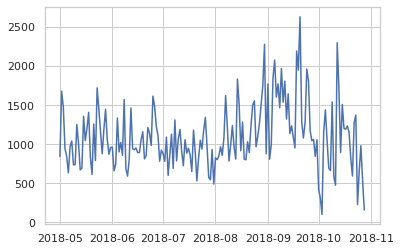

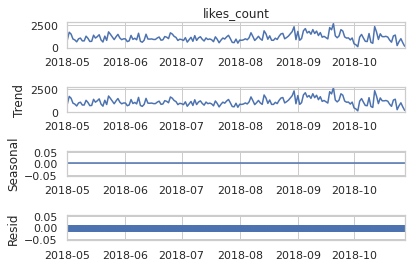

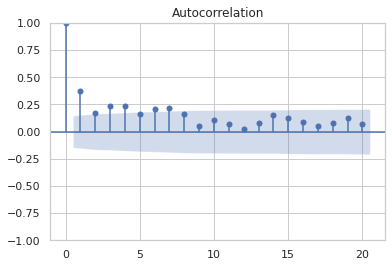

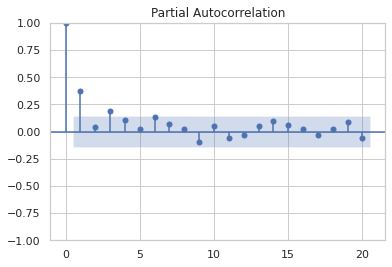

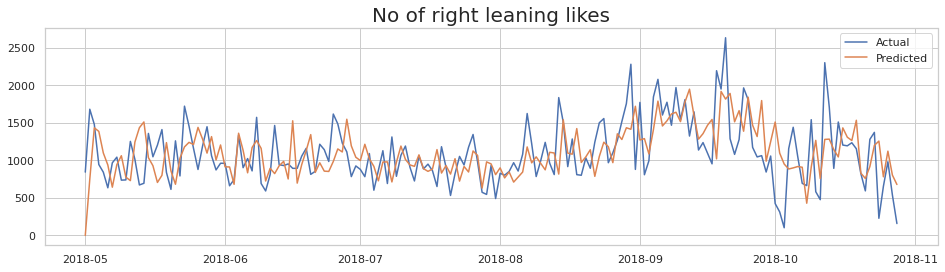

In [388]:
right_leaning_likes_ts=right_leaning_likes_ts.sort_index(ascending=True)
check_stationarity(right_leaning_likes_ts)
plt.plot(right_leaning_likes_ts)
result = seasonal_decompose(right_leaning_likes_ts,model='additive',extrapolate_trend='freq', period=1)      #applied seasonal decomposition to get trend and seasons.
fig = result.plot()
plot_acf(right_leaning_likes_ts, lags=20);
plot_pacf(right_leaning_likes_ts, lags=20);  #getting order of Auto regression (p) and getting number of forecast errors(q) to specify for the model.
                         #p is point where acf increased significantly, it can be any points but in our graph we get increasing trend at 0.

start_time13 = time.time()
sarima = SARIMAX(right_leaning_likes_ts, order=(9,1,11), seasonal_order=(1,1,3,12))
sarima_predictions = sarima.fit().predict()                            #Links to get SARIMAX parameters :- https://machinelearningmastery.com/how-to-grid-search-sarima-model-hyperparameters-for-time-series-forecasting-in-python/
                                                                       #https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/
    
print(f"the time of execution of Sarima for  for right leaning like in seconds is {time.time() - start_time13}")

plt.figure(figsize=(16,4))
plt.plot(right_leaning_likes_ts, label="Actual")
plt.plot(sarima_predictions, label="Predicted")
plt.title('No of right leaning likes', fontsize=20)
#plt.ylabel('Sales', fontsize=16)
plt.legend()


print('RMSE OF SARIMA of right leaning Likes count: %.4f'%np.sqrt(sum((right_leaning_likes_ts-sarima_predictions)**2)/(len(right_leaning_likes_ts))))

In [389]:
# LSTM 1 DAY FORECASTING of likes

In [390]:
#left likes prediction

In [391]:
dataset=left_likes_ts

In [392]:
print(left_likes_ts)

Date
2018-05-01     55
2018-05-02     51
2018-05-03     11
2018-05-04    156
2018-05-05    155
             ... 
2018-10-24     32
2018-10-25    162
2018-10-26    241
2018-10-27    172
2018-10-28     56
Name: likes_count, Length: 181, dtype: int64


In [393]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.values.reshape(-1,1))
train_size = int(len(dataset) * 0.7)   #splitting the dataset into 67 and 33 percent.
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

126 55


In [394]:
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):   #The function takes two arguments: the dataset, which is a NumPy array that we want to convert into a dataset, 
  #and the look_back, which is the number of previous time steps to use as input variables to predict the next time period — in this case defaulted to 1.
#This default will create a dataset where X is the number of passengers at a given time (t) and Y is the number of passengers at the next time (t + 1).
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [395]:
look_back = 1
trainX, trainY = create_dataset(train, look_back) #converting as above mentioned function for training and testing.
testX, testY = create_dataset(test, look_back)
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))     

In [396]:
start_time4 = time.time()
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back))) #4 are the hidden LSTM blocks and 1 input layer as visible.
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
#K.set_value(model.optimizer.learning_rate, 0.01)
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2) #training the data with epochs=100,batch size=1;

Epoch 1/100
124/124 - 1s - loss: 0.0105 - 1s/epoch - 11ms/step
Epoch 2/100
124/124 - 0s - loss: 0.0095 - 107ms/epoch - 866us/step
Epoch 3/100
124/124 - 0s - loss: 0.0094 - 104ms/epoch - 836us/step
Epoch 4/100
124/124 - 0s - loss: 0.0095 - 103ms/epoch - 828us/step
Epoch 5/100
124/124 - 0s - loss: 0.0094 - 103ms/epoch - 828us/step
Epoch 6/100
124/124 - 0s - loss: 0.0094 - 103ms/epoch - 827us/step
Epoch 7/100
124/124 - 0s - loss: 0.0093 - 103ms/epoch - 828us/step
Epoch 8/100
124/124 - 0s - loss: 0.0094 - 103ms/epoch - 829us/step
Epoch 9/100
124/124 - 0s - loss: 0.0094 - 101ms/epoch - 818us/step
Epoch 10/100
124/124 - 0s - loss: 0.0094 - 102ms/epoch - 821us/step
Epoch 11/100
124/124 - 0s - loss: 0.0094 - 101ms/epoch - 814us/step
Epoch 12/100
124/124 - 0s - loss: 0.0093 - 102ms/epoch - 819us/step
Epoch 13/100
124/124 - 0s - loss: 0.0093 - 101ms/epoch - 817us/step
Epoch 14/100
124/124 - 0s - loss: 0.0095 - 101ms/epoch - 816us/step
Epoch 15/100
124/124 - 0s - loss: 0.0094 - 103ms/epoch - 828u

In [397]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

2/2 [==============================] - 0s 1ms/step


In [398]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])              #Note that we invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data (thousands of passengers per month).
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [399]:
print(f"the time of execution of LSTM for 1 day lookback for left twweets in seconds is{time.time() - start_time4}")

the time of execution of LSTM for 1 day lookback for left twweets in seconds is12.225682973861694


In [400]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score RMSE OF LEFT likes : %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score RMSE OF LEFT likes: %.2f RMSE' % (testScore))

Train Score RMSE OF LEFT likes : 239.44 RMSE
Test Score RMSE OF LEFT likes: 213.96 RMSE


In [401]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)         
trainPredictPlot[:, :] = numpy.nan                                              #Because of how the dataset was prepared, we must shift the predictions so that they align on the x-axis with the original dataset. 
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

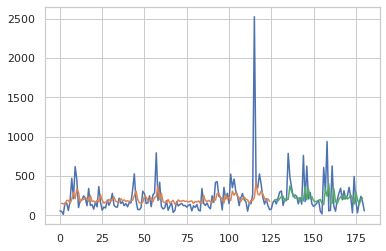

In [402]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot) #red is training data, green is testing data, blue is orginal dataset.
plt.plot(testPredictPlot)  #https://www.applause.com/blog/training-data-validation-data-vs-test-data(differences between training data, test dataset)
plt.show()

In [403]:
# RIGHT LIKES PREDICTION

In [404]:
dataset=right_likes_ts

In [405]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.values.reshape(-1,1))
train_size = int(len(dataset) * 0.8)   #splitting the dataset into 67 and 33 percent.
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

144 37


In [406]:
look_back = 1
trainX, trainY = create_dataset(train, look_back) #converting as above mentioned function for training and testing.
testX, testY = create_dataset(test, look_back)
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))     

In [407]:
start_time4 = time.time()
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back))) #4 are the hidden LSTM blocks and 1 input layer as visible.
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
#K.set_value(model.optimizer.learning_rate, 0.01)
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2) #training the data with epochs=100,batch size=1;

Epoch 1/100
142/142 - 1s - loss: 0.1763 - 1s/epoch - 9ms/step
Epoch 2/100
142/142 - 0s - loss: 0.0896 - 118ms/epoch - 833us/step
Epoch 3/100
142/142 - 0s - loss: 0.0576 - 116ms/epoch - 817us/step
Epoch 4/100
142/142 - 0s - loss: 0.0473 - 116ms/epoch - 816us/step
Epoch 5/100
142/142 - 0s - loss: 0.0427 - 118ms/epoch - 831us/step
Epoch 6/100
142/142 - 0s - loss: 0.0386 - 116ms/epoch - 819us/step
Epoch 7/100
142/142 - 0s - loss: 0.0347 - 116ms/epoch - 814us/step
Epoch 8/100
142/142 - 0s - loss: 0.0312 - 115ms/epoch - 813us/step
Epoch 9/100
142/142 - 0s - loss: 0.0281 - 116ms/epoch - 815us/step
Epoch 10/100
142/142 - 0s - loss: 0.0251 - 116ms/epoch - 815us/step
Epoch 11/100
142/142 - 0s - loss: 0.0226 - 116ms/epoch - 814us/step
Epoch 12/100
142/142 - 0s - loss: 0.0205 - 116ms/epoch - 818us/step
Epoch 13/100
142/142 - 0s - loss: 0.0189 - 116ms/epoch - 814us/step
Epoch 14/100
142/142 - 0s - loss: 0.0175 - 116ms/epoch - 816us/step
Epoch 15/100
142/142 - 0s - loss: 0.0164 - 115ms/epoch - 813us

In [408]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

2/2 [==============================] - 0s 1ms/step


In [409]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])              #Note that we invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data (thousands of passengers per month).
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [410]:
print(f"the time of execution of LSTM for 1 day lookback for left twweets in seconds is{time.time() - start_time4}")

the time of execution of LSTM for 1 day lookback for left twweets in seconds is13.432991743087769


In [411]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score RMSE OF right likes : %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score RMSE OF right likes: %.2f RMSE' % (testScore))

Train Score RMSE OF right likes : 1218.38 RMSE
Test Score RMSE OF right likes: 2546.65 RMSE


In [412]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)         
trainPredictPlot[:, :] = numpy.nan                                              #Because of how the dataset was prepared, we must shift the predictions so that they align on the x-axis with the original dataset. 
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

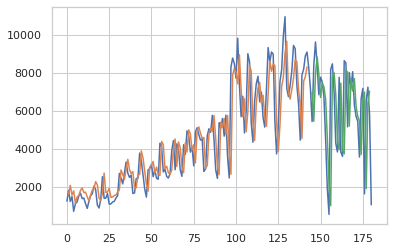

In [413]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot) #red is training data, green is testing data, blue is orginal dataset.
plt.plot(testPredictPlot)  #https://www.applause.com/blog/training-data-validation-data-vs-test-data(differences between training data, test dataset)
plt.show()

In [414]:
# Centre likes prediction

In [415]:
dataset=centre_likes_ts

In [416]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.values.reshape(-1,1))
train_size = int(len(dataset) * 0.8)   #splitting the dataset into 67 and 33 percent.
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

144 37


In [417]:
look_back = 1
trainX, trainY = create_dataset(train, look_back) #converting as above mentioned function for training and testing.
testX, testY = create_dataset(test, look_back)
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))     

In [418]:
start_time4 = time.time()
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back))) #4 are the hidden LSTM blocks and 1 input layer as visible.
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
#K.set_value(model.optimizer.learning_rate, 0.01)
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2) #training the data with epochs=100,batch size=1;

Epoch 1/100
142/142 - 1s - loss: 0.0331 - 1s/epoch - 9ms/step
Epoch 2/100
142/142 - 0s - loss: 0.0120 - 119ms/epoch - 837us/step
Epoch 3/100
142/142 - 0s - loss: 0.0113 - 116ms/epoch - 815us/step
Epoch 4/100
142/142 - 0s - loss: 0.0113 - 112ms/epoch - 790us/step
Epoch 5/100
142/142 - 0s - loss: 0.0114 - 113ms/epoch - 797us/step
Epoch 6/100
142/142 - 0s - loss: 0.0112 - 113ms/epoch - 796us/step
Epoch 7/100
142/142 - 0s - loss: 0.0112 - 113ms/epoch - 794us/step
Epoch 8/100
142/142 - 0s - loss: 0.0110 - 113ms/epoch - 794us/step
Epoch 9/100
142/142 - 0s - loss: 0.0111 - 113ms/epoch - 794us/step
Epoch 10/100
142/142 - 0s - loss: 0.0111 - 113ms/epoch - 796us/step
Epoch 11/100
142/142 - 0s - loss: 0.0109 - 113ms/epoch - 794us/step
Epoch 12/100
142/142 - 0s - loss: 0.0110 - 113ms/epoch - 798us/step
Epoch 13/100
142/142 - 0s - loss: 0.0110 - 113ms/epoch - 796us/step
Epoch 14/100
142/142 - 0s - loss: 0.0109 - 113ms/epoch - 792us/step
Epoch 15/100
142/142 - 0s - loss: 0.0109 - 112ms/epoch - 789us

In [419]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


2/2 [==============================] - 0s 1ms/step


In [420]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])              #Note that we invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data (thousands of passengers per month).
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [421]:
print(f"the time of execution of LSTM for 1 day lookback for left twweets in seconds is{time.time() - start_time4}")

the time of execution of LSTM for 1 day lookback for left twweets in seconds is13.147025108337402


In [422]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score RMSE OF centre likes : %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score RMSE OF centre likes: %.2f RMSE' % (testScore))

Train Score RMSE OF centre likes : 257.73 RMSE
Test Score RMSE OF centre likes: 625.29 RMSE


In [423]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)         
trainPredictPlot[:, :] = numpy.nan                                              #Because of how the dataset was prepared, we must shift the predictions so that they align on the x-axis with the original dataset. 
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

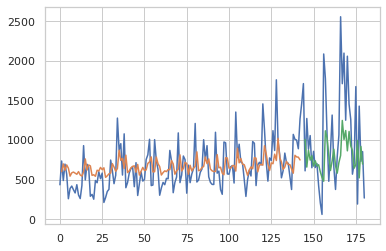

In [424]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot) #red is training data, green is testing data, blue is orginal dataset.
plt.plot(testPredictPlot)  #https://www.applause.com/blog/training-data-validation-data-vs-test-data(differences between training data, test dataset)
plt.show()

In [425]:
# left leaning likes forecasting

In [426]:
dataset= left_leaning_likes_ts

In [427]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.values.reshape(-1,1))
train_size = int(len(dataset) * 0.7)   #splitting the dataset into 67 and 33 percent.
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

126 55


In [428]:
look_back = 1
trainX, trainY = create_dataset(train, look_back) #converting as above mentioned function for training and testing.
testX, testY = create_dataset(test, look_back)
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))     

In [429]:
start_time4 = time.time()
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back))) #4 are the hidden LSTM blocks and 1 input layer as visible.
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
#K.set_value(model.optimizer.learning_rate, 0.01)
model.fit(trainX, trainY, epochs=200, batch_size=1, verbose=2) #training the data with epochs=100,batch size=1;

Epoch 1/200
124/124 - 1s - loss: 0.1096 - 1s/epoch - 10ms/step
Epoch 2/200
124/124 - 0s - loss: 0.0397 - 101ms/epoch - 816us/step
Epoch 3/200
124/124 - 0s - loss: 0.0275 - 101ms/epoch - 813us/step
Epoch 4/200
124/124 - 0s - loss: 0.0267 - 100ms/epoch - 809us/step
Epoch 5/200
124/124 - 0s - loss: 0.0268 - 101ms/epoch - 812us/step
Epoch 6/200
124/124 - 0s - loss: 0.0269 - 100ms/epoch - 807us/step
Epoch 7/200
124/124 - 0s - loss: 0.0269 - 100ms/epoch - 809us/step
Epoch 8/200
124/124 - 0s - loss: 0.0268 - 101ms/epoch - 811us/step
Epoch 9/200
124/124 - 0s - loss: 0.0268 - 101ms/epoch - 812us/step
Epoch 10/200
124/124 - 0s - loss: 0.0267 - 101ms/epoch - 814us/step
Epoch 11/200
124/124 - 0s - loss: 0.0268 - 101ms/epoch - 815us/step
Epoch 12/200
124/124 - 0s - loss: 0.0267 - 101ms/epoch - 812us/step
Epoch 13/200
124/124 - 0s - loss: 0.0270 - 101ms/epoch - 812us/step
Epoch 14/200
124/124 - 0s - loss: 0.0267 - 101ms/epoch - 811us/step
Epoch 15/200
124/124 - 0s - loss: 0.0268 - 100ms/epoch - 807u

In [430]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)






2/2 [==============================] - 0s 1ms/step


In [431]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])              #Note that we invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data (thousands of passengers per month).
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [432]:
print(f"the time of execution of LSTM for 1 day lookback for left twweets in seconds is{time.time() - start_time4}")

the time of execution of LSTM for 1 day lookback for left twweets in seconds is22.07159924507141


In [433]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score RMSE OF LEFT leaning likes : %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score RMSE OF LEFT leaning likes: %.2f RMSE' % (testScore))

Train Score RMSE OF LEFT leaning likes : 233.50 RMSE
Test Score RMSE OF LEFT leaning likes: 257.12 RMSE


In [434]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)         
trainPredictPlot[:, :] = numpy.nan                                              #Because of how the dataset was prepared, we must shift the predictions so that they align on the x-axis with the original dataset. 
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


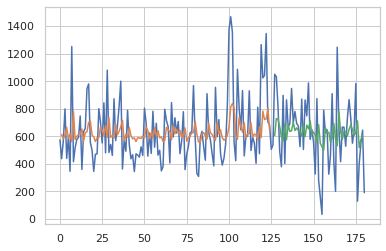

In [435]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot) #red is training data, green is testing data, blue is orginal dataset.
plt.plot(testPredictPlot)  #https://www.applause.com/blog/training-data-validation-data-vs-test-data(differences between training data, test dataset)
plt.show()

In [436]:
# right leaning likes prediction

In [437]:
dataset=right_leaning_likes_ts

In [438]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.values.reshape(-1,1))
train_size = int(len(dataset) * 0.8)   #splitting the dataset into 67 and 33 percent.
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

144 37


In [439]:
look_back = 1
trainX, trainY = create_dataset(train, look_back) #converting as above mentioned function for training and testing.
testX, testY = create_dataset(test, look_back)
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))     

In [440]:
start_time4 = time.time()
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back))) #4 are the hidden LSTM blocks and 1 input layer as visible.
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
#K.set_value(model.optimizer.learning_rate, 0.01)
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2) #training the data with epochs=100,batch size=1;

Epoch 1/100
142/142 - 1s - loss: 0.1580 - 1s/epoch - 9ms/step
Epoch 2/100
142/142 - 0s - loss: 0.0549 - 121ms/epoch - 851us/step
Epoch 3/100
142/142 - 0s - loss: 0.0262 - 116ms/epoch - 817us/step
Epoch 4/100
142/142 - 0s - loss: 0.0231 - 114ms/epoch - 802us/step
Epoch 5/100
142/142 - 0s - loss: 0.0228 - 114ms/epoch - 804us/step
Epoch 6/100
142/142 - 0s - loss: 0.0226 - 115ms/epoch - 808us/step
Epoch 7/100
142/142 - 0s - loss: 0.0224 - 114ms/epoch - 805us/step
Epoch 8/100
142/142 - 0s - loss: 0.0221 - 114ms/epoch - 806us/step
Epoch 9/100
142/142 - 0s - loss: 0.0220 - 114ms/epoch - 803us/step
Epoch 10/100
142/142 - 0s - loss: 0.0218 - 115ms/epoch - 808us/step
Epoch 11/100
142/142 - 0s - loss: 0.0216 - 117ms/epoch - 825us/step
Epoch 12/100
142/142 - 0s - loss: 0.0215 - 114ms/epoch - 805us/step
Epoch 13/100
142/142 - 0s - loss: 0.0215 - 115ms/epoch - 808us/step
Epoch 14/100
142/142 - 0s - loss: 0.0211 - 115ms/epoch - 808us/step
Epoch 15/100
142/142 - 0s - loss: 0.0211 - 115ms/epoch - 807us

In [441]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


2/2 [==============================] - 0s 1ms/step


In [442]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])              #Note that we invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data (thousands of passengers per month).
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [443]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score RMSE OF right leaning likes : %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score RMSE OF right leaning likes: %.2f RMSE' % (testScore))

Train Score RMSE OF right leaning likes : 351.64 RMSE
Test Score RMSE OF right leaning likes: 475.98 RMSE


In [444]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)         
trainPredictPlot[:, :] = numpy.nan                                              #Because of how the dataset was prepared, we must shift the predictions so that they align on the x-axis with the original dataset. 
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


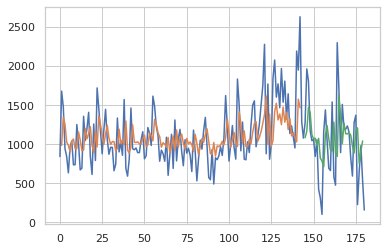

In [445]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot) #red is training data, green is testing data, blue is orginal dataset.
plt.plot(testPredictPlot)  #https://www.applause.com/blog/training-data-validation-data-vs-test-data(differences between training data, test dataset)
plt.show()

In [446]:
#LSTM FOR 14 DAYS lookback 

In [447]:
dataset1=left_likes_ts

In [448]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset1 = scaler.fit_transform(dataset1.values.reshape(-1,1))
train_size = int(len(dataset1) * 0.7)   #splitting the dataset into 67 and 33 percent.
test_size = len(dataset1) - train_size
train, test = dataset1[0:train_size,:], dataset1[train_size:len(dataset1),:]
print(len(train), len(test))

126 55


Epoch 1/100
111/111 - 1s - loss: 0.0115 - 1s/epoch - 11ms/step
Epoch 2/100
111/111 - 0s - loss: 0.0105 - 93ms/epoch - 838us/step
Epoch 3/100
111/111 - 0s - loss: 0.0103 - 93ms/epoch - 838us/step
Epoch 4/100
111/111 - 0s - loss: 0.0102 - 92ms/epoch - 831us/step
Epoch 5/100
111/111 - 0s - loss: 0.0101 - 92ms/epoch - 827us/step
Epoch 6/100
111/111 - 0s - loss: 0.0100 - 92ms/epoch - 825us/step
Epoch 7/100
111/111 - 0s - loss: 0.0099 - 91ms/epoch - 824us/step
Epoch 8/100
111/111 - 0s - loss: 0.0099 - 92ms/epoch - 830us/step
Epoch 9/100
111/111 - 0s - loss: 0.0099 - 92ms/epoch - 833us/step
Epoch 10/100
111/111 - 0s - loss: 0.0098 - 92ms/epoch - 827us/step
Epoch 11/100
111/111 - 0s - loss: 0.0097 - 92ms/epoch - 828us/step
Epoch 12/100
111/111 - 0s - loss: 0.0096 - 92ms/epoch - 829us/step
Epoch 13/100
111/111 - 0s - loss: 0.0096 - 92ms/epoch - 828us/step
Epoch 14/100
111/111 - 0s - loss: 0.0096 - 93ms/epoch - 836us/step
Epoch 15/100
111/111 - 0s - loss: 0.0095 - 92ms/epoch - 828us/step
Epoch 1

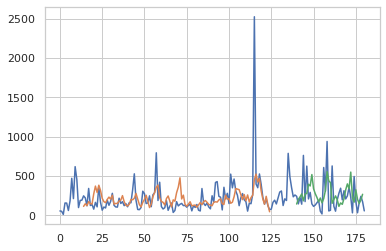

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 4)                 304       
                                                                 
 dense_22 (Dense)            (None, 1)                 5         
                                                                 
Total params: 309
Trainable params: 309
Non-trainable params: 0
_________________________________________________________________


In [449]:
start_time19 =time.time()
for i in range(14,15):
    trainX, trainY = create_dataset(train, i) #converting as above mentioned function for training and testing.
    testX, testY = create_dataset(test, i)
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, i))) #4 are the hidden LSTM blocks and 1 input layer as visible.
    #model.add(Dense(units=4))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2) #training the data with epochs=100,batch size=1;
    # make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])              #Note that we invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data (thousands of passengers per month).
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train Score RMSE OF left tweets: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test Score RMSE OF left tweets: %.2f RMSE' % (testScore))
    # shift train predictions for plotting
    trainPredictPlot = numpy.empty_like(dataset1)         
    trainPredictPlot[:, :] = numpy.nan                                              #Because of how the dataset was prepared, we must shift the predictions so that they align on the x-axis with the original dataset. 
    trainPredictPlot[i:len(trainPredict)+i, :] = trainPredict
    # shift test predictions for plotting
    testPredictPlot = numpy.empty_like(dataset1)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(trainPredict)+(i*2)+1:len(dataset1)-1, :] = testPredict
    # plot baseline and predictions
    plt.plot(scaler.inverse_transform(dataset1))
    plt.plot(trainPredictPlot) #red is training data, green is testing data, blue is orginal dataset.
    plt.plot(testPredictPlot)  #https://www.applause.com/blog/training-data-validation-data-vs-test-data(differences between training data, test dataset)
    plt.show()
    model.summary()

In [450]:
#right likes prediction

In [451]:
dataset1=right_likes_ts

In [452]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset1 = scaler.fit_transform(dataset1.values.reshape(-1,1))
train_size = int(len(dataset1) * 0.8)   #splitting the dataset into 67 and 33 percent.
test_size = len(dataset1) - train_size
train, test = dataset1[0:train_size,:], dataset1[train_size:len(dataset1),:]
print(len(train), len(test))

144 37


Epoch 1/100
129/129 - 1s - loss: 0.0723 - 1s/epoch - 9ms/step
Epoch 2/100
129/129 - 0s - loss: 0.0179 - 111ms/epoch - 862us/step
Epoch 3/100
129/129 - 0s - loss: 0.0157 - 109ms/epoch - 844us/step
Epoch 4/100
129/129 - 0s - loss: 0.0145 - 109ms/epoch - 842us/step
Epoch 5/100
129/129 - 0s - loss: 0.0138 - 108ms/epoch - 839us/step
Epoch 6/100
129/129 - 0s - loss: 0.0129 - 108ms/epoch - 838us/step
Epoch 7/100
129/129 - 0s - loss: 0.0124 - 108ms/epoch - 839us/step
Epoch 8/100
129/129 - 0s - loss: 0.0121 - 109ms/epoch - 844us/step
Epoch 9/100
129/129 - 0s - loss: 0.0117 - 108ms/epoch - 834us/step
Epoch 10/100
129/129 - 0s - loss: 0.0114 - 108ms/epoch - 836us/step
Epoch 11/100
129/129 - 0s - loss: 0.0116 - 108ms/epoch - 834us/step
Epoch 12/100
129/129 - 0s - loss: 0.0112 - 107ms/epoch - 832us/step
Epoch 13/100
129/129 - 0s - loss: 0.0110 - 107ms/epoch - 831us/step
Epoch 14/100
129/129 - 0s - loss: 0.0107 - 108ms/epoch - 836us/step
Epoch 15/100
129/129 - 0s - loss: 0.0106 - 109ms/epoch - 843us

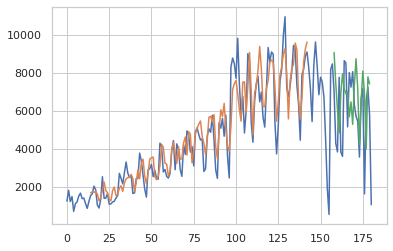

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 4)                 304       
                                                                 
 dense_23 (Dense)            (None, 1)                 5         
                                                                 
Total params: 309
Trainable params: 309
Non-trainable params: 0
_________________________________________________________________


In [453]:
start_time19 =time.time()
for i in range(14,15):
    trainX, trainY = create_dataset(train, i) #converting as above mentioned function for training and testing.
    testX, testY = create_dataset(test, i)
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, i))) #4 are the hidden LSTM blocks and 1 input layer as visible.
    #model.add(Dense(units=4))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2) #training the data with epochs=100,batch size=1;
    # make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])              #Note that we invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data (thousands of passengers per month).
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train Score RMSE OF right likes: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test Score RMSE OF right likes: %.2f RMSE' % (testScore))
    # shift train predictions for plotting
    trainPredictPlot = numpy.empty_like(dataset1)         
    trainPredictPlot[:, :] = numpy.nan                                              #Because of how the dataset was prepared, we must shift the predictions so that they align on the x-axis with the original dataset. 
    trainPredictPlot[i:len(trainPredict)+i, :] = trainPredict
    # shift test predictions for plotting
    testPredictPlot = numpy.empty_like(dataset1)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(trainPredict)+(i*2)+1:len(dataset1)-1, :] = testPredict
    # plot baseline and predictions
    plt.plot(scaler.inverse_transform(dataset1))
    plt.plot(trainPredictPlot) #red is training data, green is testing data, blue is orginal dataset.
    plt.plot(testPredictPlot)  #https://www.applause.com/blog/training-data-validation-data-vs-test-data(differences between training data, test dataset)
    plt.show()
    model.summary()

In [454]:
#Centre likes prediction

In [455]:
dataset1=centre_likes_ts

In [456]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset1 = scaler.fit_transform(dataset1.values.reshape(-1,1))
train_size = int(len(dataset1) * 0.8)   #splitting the dataset into 67 and 33 percent.
test_size = len(dataset1) - train_size
train, test = dataset1[0:train_size,:], dataset1[train_size:len(dataset1),:]
print(len(train), len(test))

144 37


Epoch 1/100
129/129 - 1s - loss: 0.0169 - 1s/epoch - 10ms/step
Epoch 2/100
129/129 - 0s - loss: 0.0114 - 115ms/epoch - 890us/step
Epoch 3/100
129/129 - 0s - loss: 0.0114 - 111ms/epoch - 863us/step
Epoch 4/100
129/129 - 0s - loss: 0.0108 - 109ms/epoch - 846us/step
Epoch 5/100
129/129 - 0s - loss: 0.0110 - 108ms/epoch - 834us/step
Epoch 6/100
129/129 - 0s - loss: 0.0108 - 108ms/epoch - 841us/step
Epoch 7/100
129/129 - 0s - loss: 0.0108 - 108ms/epoch - 841us/step
Epoch 8/100
129/129 - 0s - loss: 0.0106 - 110ms/epoch - 854us/step
Epoch 9/100
129/129 - 0s - loss: 0.0106 - 108ms/epoch - 839us/step
Epoch 10/100
129/129 - 0s - loss: 0.0106 - 108ms/epoch - 833us/step
Epoch 11/100
129/129 - 0s - loss: 0.0105 - 106ms/epoch - 824us/step
Epoch 12/100
129/129 - 0s - loss: 0.0103 - 106ms/epoch - 824us/step
Epoch 13/100
129/129 - 0s - loss: 0.0104 - 106ms/epoch - 824us/step
Epoch 14/100
129/129 - 0s - loss: 0.0101 - 106ms/epoch - 826us/step
Epoch 15/100
129/129 - 0s - loss: 0.0103 - 108ms/epoch - 834u

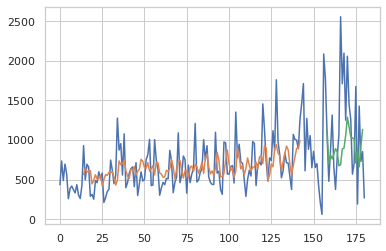

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 4)                 304       
                                                                 
 dense_24 (Dense)            (None, 1)                 5         
                                                                 
Total params: 309
Trainable params: 309
Non-trainable params: 0
_________________________________________________________________


In [457]:
start_time19 =time.time()
for i in range(14,15):
    trainX, trainY = create_dataset(train, i) #converting as above mentioned function for training and testing.
    testX, testY = create_dataset(test, i)
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, i))) #4 are the hidden LSTM blocks and 1 input layer as visible.
    #model.add(Dense(units=4))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2) #training the data with epochs=100,batch size=1;
    # make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])              #Note that we invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data (thousands of passengers per month).
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train Score RMSE OF centre likes: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test Score RMSE OF centre likes: %.2f RMSE' % (testScore))
    # shift train predictions for plotting
    trainPredictPlot = numpy.empty_like(dataset1)         
    trainPredictPlot[:, :] = numpy.nan                                              #Because of how the dataset was prepared, we must shift the predictions so that they align on the x-axis with the original dataset. 
    trainPredictPlot[i:len(trainPredict)+i, :] = trainPredict
    # shift test predictions for plotting
    testPredictPlot = numpy.empty_like(dataset1)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(trainPredict)+(i*2)+1:len(dataset1)-1, :] = testPredict
    # plot baseline and predictions
    plt.plot(scaler.inverse_transform(dataset1))
    plt.plot(trainPredictPlot) #red is training data, green is testing data, blue is orginal dataset.
    plt.plot(testPredictPlot)  #https://www.applause.com/blog/training-data-validation-data-vs-test-data(differences between training data, test dataset)
    plt.show()
    model.summary()

In [458]:
# left leaning tweets prediction

In [459]:
dataset1=left_leaning_likes_ts

In [460]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset1 = scaler.fit_transform(dataset1.values.reshape(-1,1))
train_size = int(len(dataset1) * 0.7)   #splitting the dataset into 67 and 33 percent.
test_size = len(dataset1) - train_size
train, test = dataset1[0:train_size,:], dataset1[train_size:len(dataset1),:]
print(len(train), len(test))

126 55


Epoch 1/100
111/111 - 1s - loss: 0.1079 - 1s/epoch - 11ms/step
Epoch 2/100
111/111 - 0s - loss: 0.0296 - 94ms/epoch - 851us/step
Epoch 3/100
111/111 - 0s - loss: 0.0281 - 93ms/epoch - 842us/step
Epoch 4/100
111/111 - 0s - loss: 0.0272 - 92ms/epoch - 830us/step
Epoch 5/100
111/111 - 0s - loss: 0.0275 - 93ms/epoch - 840us/step
Epoch 6/100
111/111 - 0s - loss: 0.0271 - 93ms/epoch - 837us/step
Epoch 7/100
111/111 - 0s - loss: 0.0270 - 93ms/epoch - 838us/step
Epoch 8/100
111/111 - 0s - loss: 0.0269 - 93ms/epoch - 836us/step
Epoch 9/100
111/111 - 0s - loss: 0.0265 - 93ms/epoch - 834us/step
Epoch 10/100
111/111 - 0s - loss: 0.0266 - 92ms/epoch - 827us/step
Epoch 11/100
111/111 - 0s - loss: 0.0267 - 92ms/epoch - 829us/step
Epoch 12/100
111/111 - 0s - loss: 0.0263 - 92ms/epoch - 831us/step
Epoch 13/100
111/111 - 0s - loss: 0.0263 - 92ms/epoch - 831us/step
Epoch 14/100
111/111 - 0s - loss: 0.0264 - 92ms/epoch - 831us/step
Epoch 15/100
111/111 - 0s - loss: 0.0259 - 93ms/epoch - 836us/step
Epoch 1

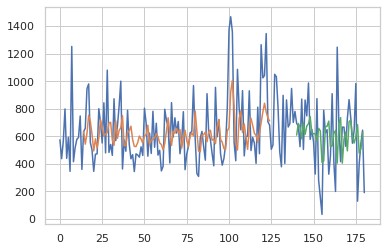

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_23 (LSTM)              (None, 4)                 304       
                                                                 
 dense_25 (Dense)            (None, 1)                 5         
                                                                 
Total params: 309
Trainable params: 309
Non-trainable params: 0
_________________________________________________________________


In [461]:
start_time19 =time.time()
for i in range(14,15):
    trainX, trainY = create_dataset(train, i) #converting as above mentioned function for training and testing.
    testX, testY = create_dataset(test, i)
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, i))) #4 are the hidden LSTM blocks and 1 input layer as visible.
    #model.add(Dense(units=4))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2) #training the data with epochs=100,batch size=1;
    # make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])              #Note that we invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data (thousands of passengers per month).
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train Score RMSE OF left leaning likes: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test Score RMSE OF left leaning likes: %.2f RMSE' % (testScore))
    # shift train predictions for plotting
    trainPredictPlot = numpy.empty_like(dataset1)         
    trainPredictPlot[:, :] = numpy.nan                                              #Because of how the dataset was prepared, we must shift the predictions so that they align on the x-axis with the original dataset. 
    trainPredictPlot[i:len(trainPredict)+i, :] = trainPredict
    # shift test predictions for plotting
    testPredictPlot = numpy.empty_like(dataset1)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(trainPredict)+(i*2)+1:len(dataset1)-1, :] = testPredict
    # plot baseline and predictions
    plt.plot(scaler.inverse_transform(dataset1))
    plt.plot(trainPredictPlot) #red is training data, green is testing data, blue is orginal dataset.
    plt.plot(testPredictPlot)  #https://www.applause.com/blog/training-data-validation-data-vs-test-data(differences between training data, test dataset)
    plt.show()
    model.summary()

In [462]:
#right leaning tweets

In [463]:
dataset1= right_leaning_likes_ts

In [464]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset1 = scaler.fit_transform(dataset1.values.reshape(-1,1))
train_size = int(len(dataset1) * 0.8)   #splitting the dataset into 67 and 33 percent.
test_size = len(dataset1) - train_size
train, test = dataset1[0:train_size,:], dataset1[train_size:len(dataset1),:]
print(len(train), len(test))

144 37


Epoch 1/100
129/129 - 1s - loss: 0.0405 - 1s/epoch - 10ms/step
Epoch 2/100
129/129 - 0s - loss: 0.0203 - 114ms/epoch - 884us/step
Epoch 3/100
129/129 - 0s - loss: 0.0204 - 113ms/epoch - 875us/step
Epoch 4/100
129/129 - 0s - loss: 0.0201 - 113ms/epoch - 876us/step
Epoch 5/100
129/129 - 0s - loss: 0.0195 - 108ms/epoch - 837us/step
Epoch 6/100
129/129 - 0s - loss: 0.0191 - 110ms/epoch - 850us/step
Epoch 7/100
129/129 - 0s - loss: 0.0189 - 110ms/epoch - 850us/step
Epoch 8/100
129/129 - 0s - loss: 0.0196 - 109ms/epoch - 844us/step
Epoch 9/100
129/129 - 0s - loss: 0.0187 - 111ms/epoch - 861us/step
Epoch 10/100
129/129 - 0s - loss: 0.0188 - 110ms/epoch - 855us/step
Epoch 11/100
129/129 - 0s - loss: 0.0184 - 109ms/epoch - 847us/step
Epoch 12/100
129/129 - 0s - loss: 0.0182 - 110ms/epoch - 851us/step
Epoch 13/100
129/129 - 0s - loss: 0.0181 - 109ms/epoch - 848us/step
Epoch 14/100
129/129 - 0s - loss: 0.0178 - 110ms/epoch - 849us/step
Epoch 15/100
129/129 - 0s - loss: 0.0177 - 110ms/epoch - 849u

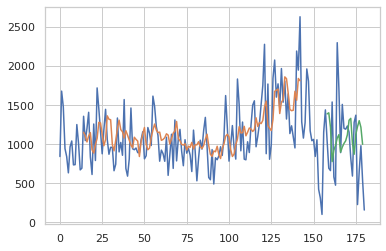

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 4)                 304       
                                                                 
 dense_26 (Dense)            (None, 1)                 5         
                                                                 
Total params: 309
Trainable params: 309
Non-trainable params: 0
_________________________________________________________________


In [465]:
start_time19 =time.time()
for i in range(14,15):
    trainX, trainY = create_dataset(train, i) #converting as above mentioned function for training and testing.
    testX, testY = create_dataset(test, i)
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, i))) #4 are the hidden LSTM blocks and 1 input layer as visible.
    #model.add(Dense(units=4))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2) #training the data with epochs=100,batch size=1;
    # make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])              #Note that we invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data (thousands of passengers per month).
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('Train Score RMSE OF right leaning likes: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test Score RMSE OF right leaning likes: %.2f RMSE' % (testScore))
    # shift train predictions for plotting
    trainPredictPlot = numpy.empty_like(dataset1)         
    trainPredictPlot[:, :] = numpy.nan                                              #Because of how the dataset was prepared, we must shift the predictions so that they align on the x-axis with the original dataset. 
    trainPredictPlot[i:len(trainPredict)+i, :] = trainPredict
    # shift test predictions for plotting
    testPredictPlot = numpy.empty_like(dataset1)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(trainPredict)+(i*2)+1:len(dataset1)-1, :] = testPredict
    # plot baseline and predictions
    plt.plot(scaler.inverse_transform(dataset1))
    plt.plot(trainPredictPlot) #red is training data, green is testing data, blue is orginal dataset.
    plt.plot(testPredictPlot)  #https://www.applause.com/blog/training-data-validation-data-vs-test-data(differences between training data, test dataset)
    plt.show()
    model.summary()

In [466]:
# Multistepforecasting of left likes

In [467]:
#left likes forecasting

105/105 - 1s - loss: 0.1055 - 1s/epoch - 10ms/step
105/105 - 0s - loss: 0.0089 - 93ms/epoch - 888us/step
105/105 - 0s - loss: 0.0084 - 93ms/epoch - 882us/step
105/105 - 0s - loss: 0.0081 - 93ms/epoch - 884us/step
105/105 - 0s - loss: 0.0079 - 92ms/epoch - 874us/step
105/105 - 0s - loss: 0.0078 - 91ms/epoch - 869us/step
105/105 - 0s - loss: 0.0076 - 92ms/epoch - 879us/step
105/105 - 0s - loss: 0.0075 - 91ms/epoch - 869us/step
105/105 - 0s - loss: 0.0074 - 92ms/epoch - 874us/step
105/105 - 0s - loss: 0.0073 - 92ms/epoch - 873us/step
105/105 - 0s - loss: 0.0072 - 93ms/epoch - 882us/step
105/105 - 0s - loss: 0.0071 - 93ms/epoch - 890us/step
105/105 - 0s - loss: 0.0071 - 92ms/epoch - 880us/step
105/105 - 0s - loss: 0.0070 - 91ms/epoch - 871us/step
105/105 - 0s - loss: 0.0070 - 111ms/epoch - 1ms/step
105/105 - 0s - loss: 0.0069 - 91ms/epoch - 871us/step
105/105 - 0s - loss: 0.0069 - 92ms/epoch - 876us/step
105/105 - 0s - loss: 0.0068 - 92ms/epoch - 876us/step
105/105 - 0s - loss: 0.0068 - 93

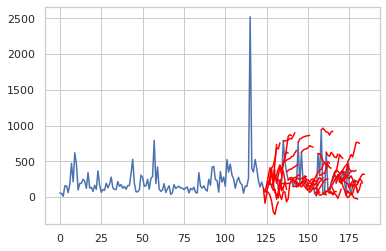

In [468]:
# load dataset
start_time22 = time.time()
series = left_likes_ts
# configure
n_lag = 14
n_seq = 7
n_test = 55
n_epochs = 150
n_batch = 1
n_neurons = 8
# prepare data
scaler, train, test = prepare_data(series, n_test, n_lag, n_seq)
# fit model
model = fit_lstm(train, n_lag, n_seq, n_batch, n_epochs, n_neurons)
# make forecasts
forecasts = make_forecasts(model, n_batch, train, test, n_lag, n_seq)
# inverse transform forecasts and test
forecasts = inverse_transform(series, forecasts, scaler, n_test+2)
actual = [row[n_lag:] for row in test]
actual = inverse_transform(series, actual, scaler, n_test+2)
# evaluate forecasts
evaluate_forecasts(actual, forecasts, n_lag, n_seq)
# plot forecasts
plot_forecasts(series, forecasts, n_test+2)

In [469]:
# right likes forecasting

123/123 - 1s - loss: 0.0394 - 1s/epoch - 9ms/step
123/123 - 0s - loss: 0.0126 - 107ms/epoch - 873us/step
123/123 - 0s - loss: 0.0122 - 105ms/epoch - 853us/step
123/123 - 0s - loss: 0.0120 - 108ms/epoch - 874us/step
123/123 - 0s - loss: 0.0118 - 109ms/epoch - 888us/step
123/123 - 0s - loss: 0.0116 - 113ms/epoch - 921us/step
123/123 - 0s - loss: 0.0114 - 109ms/epoch - 888us/step
123/123 - 0s - loss: 0.0112 - 111ms/epoch - 904us/step
123/123 - 0s - loss: 0.0111 - 111ms/epoch - 902us/step
123/123 - 0s - loss: 0.0109 - 110ms/epoch - 893us/step
123/123 - 0s - loss: 0.0108 - 111ms/epoch - 903us/step
123/123 - 0s - loss: 0.0106 - 112ms/epoch - 909us/step
123/123 - 0s - loss: 0.0105 - 111ms/epoch - 903us/step
123/123 - 0s - loss: 0.0104 - 112ms/epoch - 907us/step
123/123 - 0s - loss: 0.0102 - 111ms/epoch - 899us/step
123/123 - 0s - loss: 0.0101 - 112ms/epoch - 912us/step
123/123 - 0s - loss: 0.0100 - 112ms/epoch - 910us/step
123/123 - 0s - loss: 0.0099 - 108ms/epoch - 876us/step
123/123 - 0s - 

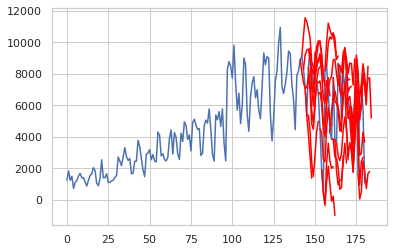

In [470]:
# load dataset
start_time22 = time.time()
series = right_likes_ts
# configure
n_lag = 14
n_seq = 7
n_test = 37
n_epochs = 100
n_batch = 1
n_neurons = 8
# prepare data
scaler, train, test = prepare_data(series, n_test, n_lag, n_seq)
# fit model
model = fit_lstm(train, n_lag, n_seq, n_batch, n_epochs, n_neurons)
# make forecasts
forecasts = make_forecasts(model, n_batch, train, test, n_lag, n_seq)
# inverse transform forecasts and test
forecasts = inverse_transform(series, forecasts, scaler, n_test+2)
actual = [row[n_lag:] for row in test]
actual = inverse_transform(series, actual, scaler, n_test+2)
# evaluate forecasts
evaluate_forecasts(actual, forecasts, n_lag, n_seq)
# plot forecasts
plot_forecasts(series, forecasts, n_test+2)

123/123 - 1s - loss: 0.0671 - 1s/epoch - 9ms/step
123/123 - 0s - loss: 0.0103 - 108ms/epoch - 877us/step
123/123 - 0s - loss: 0.0099 - 105ms/epoch - 851us/step
123/123 - 0s - loss: 0.0098 - 104ms/epoch - 848us/step
123/123 - 0s - loss: 0.0097 - 104ms/epoch - 845us/step
123/123 - 0s - loss: 0.0096 - 105ms/epoch - 850us/step
123/123 - 0s - loss: 0.0095 - 107ms/epoch - 868us/step
123/123 - 0s - loss: 0.0095 - 109ms/epoch - 885us/step
123/123 - 0s - loss: 0.0094 - 107ms/epoch - 873us/step
123/123 - 0s - loss: 0.0093 - 108ms/epoch - 874us/step
123/123 - 0s - loss: 0.0093 - 107ms/epoch - 874us/step
123/123 - 0s - loss: 0.0093 - 109ms/epoch - 885us/step
123/123 - 0s - loss: 0.0092 - 110ms/epoch - 898us/step
123/123 - 0s - loss: 0.0092 - 111ms/epoch - 904us/step
123/123 - 0s - loss: 0.0091 - 111ms/epoch - 906us/step
123/123 - 0s - loss: 0.0091 - 111ms/epoch - 901us/step
123/123 - 0s - loss: 0.0091 - 111ms/epoch - 900us/step
123/123 - 0s - loss: 0.0090 - 110ms/epoch - 897us/step
123/123 - 0s - 

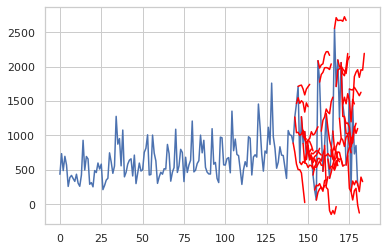

In [471]:
# load dataset
start_time22 = time.time()
series = centre_likes_ts
# configure
n_lag = 14
n_seq = 7
n_test = 37
n_epochs = 100
n_batch = 1
n_neurons = 8
# prepare data
scaler, train, test = prepare_data(series, n_test, n_lag, n_seq)
# fit model
model = fit_lstm(train, n_lag, n_seq, n_batch, n_epochs, n_neurons)
# make forecasts
forecasts = make_forecasts(model, n_batch, train, test, n_lag, n_seq)
# inverse transform forecasts and test
forecasts = inverse_transform(series, forecasts, scaler, n_test+2)
actual = [row[n_lag:] for row in test]
actual = inverse_transform(series, actual, scaler, n_test+2)
# evaluate forecasts
evaluate_forecasts(actual, forecasts, n_lag, n_seq)
# plot forecasts
plot_forecasts(series, forecasts, n_test+2)

105/105 - 1s - loss: 0.0791 - 1s/epoch - 10ms/step
105/105 - 0s - loss: 0.0264 - 96ms/epoch - 913us/step
105/105 - 0s - loss: 0.0257 - 94ms/epoch - 894us/step
105/105 - 0s - loss: 0.0252 - 92ms/epoch - 878us/step
105/105 - 0s - loss: 0.0249 - 91ms/epoch - 871us/step
105/105 - 0s - loss: 0.0246 - 90ms/epoch - 862us/step
105/105 - 0s - loss: 0.0244 - 90ms/epoch - 855us/step
105/105 - 0s - loss: 0.0242 - 90ms/epoch - 857us/step
105/105 - 0s - loss: 0.0240 - 94ms/epoch - 894us/step
105/105 - 0s - loss: 0.0239 - 92ms/epoch - 875us/step
105/105 - 0s - loss: 0.0238 - 94ms/epoch - 898us/step
105/105 - 0s - loss: 0.0237 - 95ms/epoch - 901us/step
105/105 - 0s - loss: 0.0236 - 95ms/epoch - 909us/step
105/105 - 0s - loss: 0.0235 - 95ms/epoch - 901us/step
105/105 - 0s - loss: 0.0234 - 93ms/epoch - 889us/step
105/105 - 0s - loss: 0.0233 - 95ms/epoch - 902us/step
105/105 - 0s - loss: 0.0232 - 97ms/epoch - 924us/step
105/105 - 0s - loss: 0.0232 - 94ms/epoch - 899us/step
105/105 - 0s - loss: 0.0231 - 9

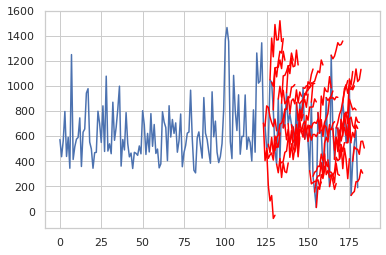

In [472]:
# load dataset
start_time22 = time.time()
series = left_leaning_likes_ts
# configure
n_lag = 14
n_seq = 7
n_test = 55
n_epochs = 150
n_batch = 1
n_neurons = 8
# prepare data
scaler, train, test = prepare_data(series, n_test, n_lag, n_seq)
# fit model
model = fit_lstm(train, n_lag, n_seq, n_batch, n_epochs, n_neurons)
# make forecasts
forecasts = make_forecasts(model, n_batch, train, test, n_lag, n_seq)
# inverse transform forecasts and test
forecasts = inverse_transform(series, forecasts, scaler, n_test+2)
actual = [row[n_lag:] for row in test]
actual = inverse_transform(series, actual, scaler, n_test+2)
# evaluate forecasts
evaluate_forecasts(actual, forecasts, n_lag, n_seq)
# plot forecasts
plot_forecasts(series, forecasts, n_test+2)

123/123 - 1s - loss: 0.0329 - 1s/epoch - 12ms/step
123/123 - 0s - loss: 0.0191 - 111ms/epoch - 902us/step
123/123 - 0s - loss: 0.0187 - 112ms/epoch - 914us/step
123/123 - 0s - loss: 0.0184 - 116ms/epoch - 943us/step
123/123 - 0s - loss: 0.0181 - 115ms/epoch - 932us/step
123/123 - 0s - loss: 0.0179 - 111ms/epoch - 899us/step
123/123 - 0s - loss: 0.0177 - 109ms/epoch - 887us/step
123/123 - 0s - loss: 0.0176 - 110ms/epoch - 894us/step
123/123 - 0s - loss: 0.0174 - 112ms/epoch - 909us/step
123/123 - 0s - loss: 0.0173 - 113ms/epoch - 920us/step
123/123 - 0s - loss: 0.0172 - 111ms/epoch - 904us/step
123/123 - 0s - loss: 0.0171 - 111ms/epoch - 904us/step
123/123 - 0s - loss: 0.0170 - 114ms/epoch - 923us/step
123/123 - 0s - loss: 0.0169 - 113ms/epoch - 920us/step
123/123 - 0s - loss: 0.0168 - 113ms/epoch - 922us/step
123/123 - 0s - loss: 0.0167 - 112ms/epoch - 914us/step
123/123 - 0s - loss: 0.0167 - 114ms/epoch - 925us/step
123/123 - 0s - loss: 0.0166 - 112ms/epoch - 912us/step
123/123 - 0s -

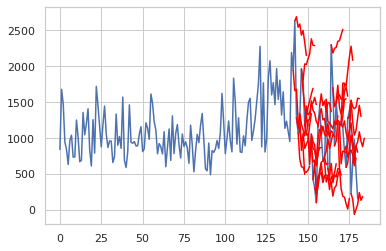

In [473]:
# load dataset
start_time22 = time.time()
series = right_leaning_likes_ts
# configure
n_lag = 14
n_seq = 7
n_test = 37
n_epochs = 100
n_batch = 1
n_neurons = 8
# prepare data
scaler, train, test = prepare_data(series, n_test, n_lag, n_seq)
# fit model
model = fit_lstm(train, n_lag, n_seq, n_batch, n_epochs, n_neurons)
# make forecasts
forecasts = make_forecasts(model, n_batch, train, test, n_lag, n_seq)
# inverse transform forecasts and test
forecasts = inverse_transform(series, forecasts, scaler, n_test+2)
actual = [row[n_lag:] for row in test]
actual = inverse_transform(series, actual, scaler, n_test+2)
# evaluate forecasts
evaluate_forecasts(actual, forecasts, n_lag, n_seq)
# plot forecasts
plot_forecasts(series, forecasts, n_test+2)

In [474]:
# gru forecasting

In [475]:
#left likes forecasting

In [476]:
left_likes_gru = left_likes_filtered
centre_likes_gru =centre_likes_filtered
right_likes_gru = right_likes_filtered
left_leaning_likes_gru = left_leaning_likes_filtered
right_leaning_likes_gru = right_leaning_likes_filtered

In [477]:
#left likes prediction

In [478]:
train_size = int(len(left_likes_gru)*0.8)

train_data = left_likes_gru.iloc[:train_size]
test_data = left_likes_gru.iloc[train_size:]

In [479]:
scaler = MinMaxScaler().fit(train_data)
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

In [480]:
def create_dataset (X, look_back = 1):
    Xs, ys = [], []
 
    for i in range(len(X)-look_back):
        v = X[i:i+look_back]
        Xs.append(v)
        ys.append(X[i+look_back])
 
    return np.array(Xs), np.array(ys)
LOOK_BACK = 14
X_train, y_train = create_dataset(train_scaled,LOOK_BACK)
X_test, y_test = create_dataset(test_scaled,LOOK_BACK)
# Print data shape
print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
print("X_test.shape: ", X_test.shape) 
print("y_test.shape: ", y_test.shape)

X_train.shape:  (130, 14, 1)
y_train.shape:  (130, 1)
X_test.shape:  (23, 14, 1)
y_test.shape:  (23, 1)


In [481]:
# Create GRU model
def create_gru(units):
    model = Sequential()
    # Input layer
    model.add(GRU (units = units, return_sequences = True, 
    input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2)) 
    # Hidden layer
    model.add(GRU(units = units)) 
    model.add(Dropout(0.2))
    model.add(Dense(units = 1)) 
    #Compile model
    model.compile(optimizer="adam",loss="mse")
    return model
model_gru = create_gru(64)

In [482]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = "val_loss",
                                               patience = 10)
    history = model.fit(X_train, y_train, epochs = 100,  
                        validation_split = 0.2,
                        batch_size = 16, shuffle = False, 
                        callbacks = [early_stop])
    return history
history_gru = fit_model(model_gru)

Epoch 1/100
7/7 [==============================] - 3s 100ms/step - loss: 0.0062 - val_loss: 0.0347
Epoch 2/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0040 - val_loss: 0.0371
Epoch 3/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0042 - val_loss: 0.0361
Epoch 4/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0038 - val_loss: 0.0350
Epoch 5/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0035 - val_loss: 0.0356
Epoch 6/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0039 - val_loss: 0.0359
Epoch 7/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0038 - val_loss: 0.0355
Epoch 8/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0036 - val_loss: 0.0355
Epoch 9/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0036 - val_loss: 0.0357
Epoch 10/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0037 - val_loss: 0.0356
Epoch 11/100
7/7 [

In [483]:
y_test = scaler.inverse_transform(y_test)
y_train = scaler.inverse_transform(y_train)

5/5 [==============================] - 0s 3ms/step


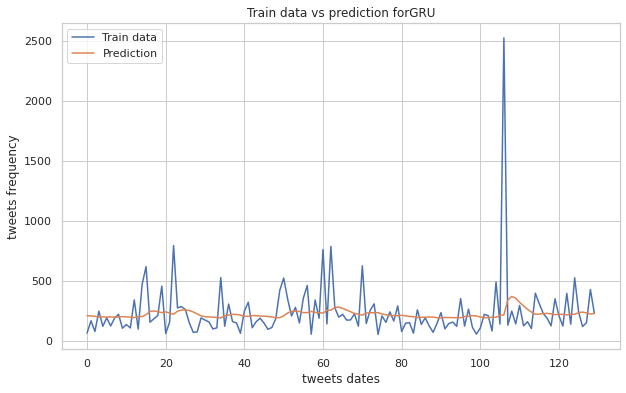

In [484]:
def prediction(model):
    prediction = model.predict(X_train)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)

# Plot test data vs prediction
def plot_future(prediction, model_name, y_train):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_train), 
             label="Train data")
    plt.plot(np.arange(range_future), 
             np.array(prediction),label="Prediction")
    plt.title("Train data vs prediction for" + model_name)
    plt.legend(loc="upper left")
    plt.xlabel("tweets dates")
    plt.ylabel("tweets frequency")
 
plot_future(prediction_gru, "GRU", y_train)

In [485]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ":")
    print("Mean Absolute Error: {:.4f}".format(mae))
    print("Root Mean Square Error: {:.4f}".format(rmse))
    print("")
evaluate_prediction(prediction_gru, y_train, "GRU")

GRU:
Mean Absolute Error: 125.6820
Root Mean Square Error: 251.5650



1/1 [==============================] - 0s 21ms/step


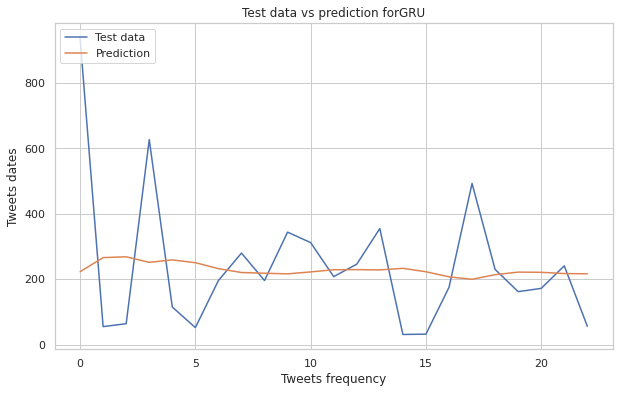

In [486]:
# Make prediction
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)
#prediction_bilstm = prediction(model_bilstm)
# Plot test data vs prediction
def plot_future(prediction, model_name, y_test):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), 
             label= "Test data")
    plt.plot(np.arange(range_future), 
             np.array(prediction),label="Prediction")
    plt.title("Test data vs prediction for" + model_name)
    plt.legend(loc="upper left")
    plt.xlabel("Tweets frequency")
    plt.ylabel("Tweets dates")
 
plot_future(prediction_gru, "GRU", y_test)

In [487]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ":")
    print("Mean Absolute Error: {:.4f}".format(mae))
    print("Root Mean Square Error: {:.4f}".format(rmse))
    print("")
evaluate_prediction(prediction_gru, y_test, "GRU")

GRU:
Mean Absolute Error: 146.8035
Root Mean Square Error: 212.8801



In [488]:
#right likes prediction using gru

In [489]:
train_size = int(len(right_likes_gru)*0.8)

train_data = right_likes_gru.iloc[:train_size]
test_data = right_likes_gru.iloc[train_size:]

In [490]:
scaler = MinMaxScaler().fit(train_data)
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

In [491]:
def create_dataset (X, look_back = 1):
    Xs, ys = [], []
 
    for i in range(len(X)-look_back):
        v = X[i:i+look_back]
        Xs.append(v)
        ys.append(X[i+look_back])
 
    return np.array(Xs), np.array(ys)
LOOK_BACK = 14
X_train, y_train = create_dataset(train_scaled,LOOK_BACK)
X_test, y_test = create_dataset(test_scaled,LOOK_BACK)
# Print data shape
print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
print("X_test.shape: ", X_test.shape) 
print("y_test.shape: ", y_test.shape)

X_train.shape:  (130, 14, 1)
y_train.shape:  (130, 1)
X_test.shape:  (23, 14, 1)
y_test.shape:  (23, 1)


In [492]:
# Create GRU model
def create_gru(units):
    model = Sequential()
    # Input layer
    model.add(GRU (units = units, return_sequences = True, 
    input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2)) 
    # Hidden layer
    model.add(GRU(units = units)) 
    model.add(Dropout(0.2))
    model.add(Dense(units = 1)) 
    #Compile model
    model.compile(optimizer="adam",loss="mse")
    return model
model_gru = create_gru(64)

In [493]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = "val_loss",
                                               patience = 10)
    history = model.fit(X_train, y_train, epochs = 100,  
                        validation_split = 0.2,
                        batch_size = 16, shuffle = False, 
                        callbacks = [early_stop])
    return history
history_gru = fit_model(model_gru)

Epoch 1/100
7/7 [==============================] - 3s 97ms/step - loss: 0.0565 - val_loss: 0.0462
Epoch 2/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0485 - val_loss: 0.0440
Epoch 3/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0376 - val_loss: 0.0417
Epoch 4/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0375 - val_loss: 0.0404
Epoch 5/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0364 - val_loss: 0.0439
Epoch 6/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0314 - val_loss: 0.0409
Epoch 7/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0314 - val_loss: 0.0421
Epoch 8/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0280 - val_loss: 0.0445
Epoch 9/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0288 - val_loss: 0.0421
Epoch 10/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0307 - val_loss: 0.0432
Epoch 11/100
7/7 [=

In [494]:
y_test = scaler.inverse_transform(y_test)
y_train = scaler.inverse_transform(y_train)

5/5 [==============================] - 0s 3ms/step


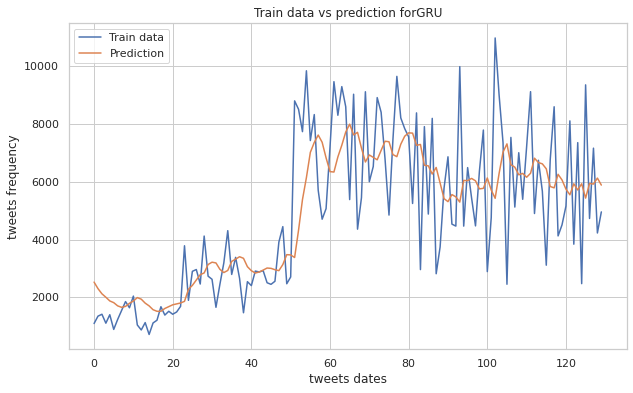

In [495]:
def prediction(model):
    prediction = model.predict(X_train)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)

# Plot test data vs prediction
def plot_future(prediction, model_name, y_train):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_train), 
             label="Train data")
    plt.plot(np.arange(range_future), 
             np.array(prediction),label="Prediction")
    plt.title("Train data vs prediction for" + model_name)
    plt.legend(loc="upper left")
    plt.xlabel("tweets dates")
    plt.ylabel("tweets frequency")
 
plot_future(prediction_gru, "GRU", y_train)

In [496]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ":")
    print("Mean Absolute Error: {:.4f}".format(mae))
    print("Root Mean Square Error: {:.4f}".format(rmse))
    print("")
evaluate_prediction(prediction_gru, y_train, "GRU")

GRU:
Mean Absolute Error: 1382.6148
Root Mean Square Error: 1829.3110



1/1 [==============================] - 0s 21ms/step


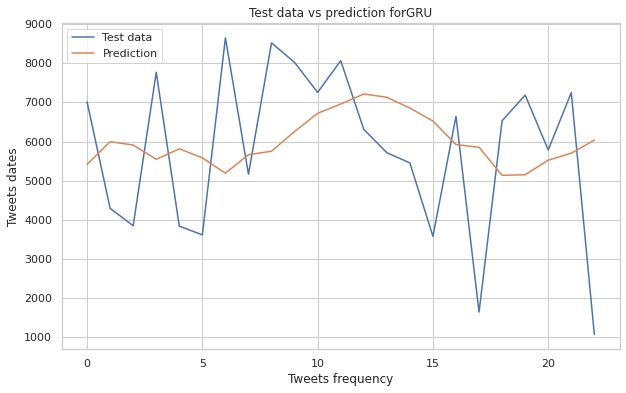

In [497]:
# Make prediction
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)
#prediction_bilstm = prediction(model_bilstm)
# Plot test data vs prediction
def plot_future(prediction, model_name, y_test):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), 
             label= "Test data")
    plt.plot(np.arange(range_future), 
             np.array(prediction),label="Prediction")
    plt.title("Test data vs prediction for" + model_name)
    plt.legend(loc="upper left")
    plt.xlabel("Tweets frequency")
    plt.ylabel("Tweets dates")
 
plot_future(prediction_gru, "GRU", y_test)

In [498]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ":")
    print("Mean Absolute Error: {:.4f}".format(mae))
    print("Root Mean Square Error: {:.4f}".format(rmse))
    print("")
evaluate_prediction(prediction_gru, y_test, "GRU")

GRU:
Mean Absolute Error: 1890.9092
Root Mean Square Error: 2206.4655



In [499]:
# centre likes prediction

In [500]:
train_size = int(len(centre_likes_gru)*0.8)

train_data = centre_likes_gru.iloc[:train_size]
test_data = centre_likes_gru.iloc[train_size:]

In [501]:
scaler = MinMaxScaler().fit(train_data)
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

In [502]:
def create_dataset (X, look_back = 1):
    Xs, ys = [], []
 
    for i in range(len(X)-look_back):
        v = X[i:i+look_back]
        Xs.append(v)
        ys.append(X[i+look_back])
 
    return np.array(Xs), np.array(ys)
LOOK_BACK = 14
X_train, y_train = create_dataset(train_scaled,LOOK_BACK)
X_test, y_test = create_dataset(test_scaled,LOOK_BACK)
# Print data shape
print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
print("X_test.shape: ", X_test.shape) 
print("y_test.shape: ", y_test.shape)

X_train.shape:  (130, 14, 1)
y_train.shape:  (130, 1)
X_test.shape:  (23, 14, 1)
y_test.shape:  (23, 1)


In [503]:
# Create GRU model
def create_gru(units):
    model = Sequential()
    # Input layer
    model.add(GRU (units = units, return_sequences = True, 
    input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2)) 
    # Hidden layer
    model.add(GRU(units = units)) 
    model.add(Dropout(0.2))
    model.add(Dense(units = 1)) 
    #Compile model
    model.compile(optimizer="adam",loss="mse")
    return model
model_gru = create_gru(64)

In [504]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = "val_loss",
                                               patience = 10)
    history = model.fit(X_train, y_train, epochs = 100,  
                        validation_split = 0.2,
                        batch_size = 16, shuffle = False, 
                        callbacks = [early_stop])
    return history
history_gru = fit_model(model_gru)

Epoch 1/100
7/7 [==============================] - 3s 98ms/step - loss: 0.0517 - val_loss: 0.0456
Epoch 2/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0414 - val_loss: 0.0299
Epoch 3/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0382 - val_loss: 0.0294
Epoch 4/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0349 - val_loss: 0.0299
Epoch 5/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0328 - val_loss: 0.0312
Epoch 6/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0359 - val_loss: 0.0293
Epoch 7/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0338 - val_loss: 0.0292
Epoch 8/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0330 - val_loss: 0.0300
Epoch 9/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0340 - val_loss: 0.0295
Epoch 10/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0342 - val_loss: 0.0296
Epoch 11/100
7/7 [=

In [505]:
y_test = scaler.inverse_transform(y_test)
y_train = scaler.inverse_transform(y_train)

5/5 [==============================] - 0s 3ms/step


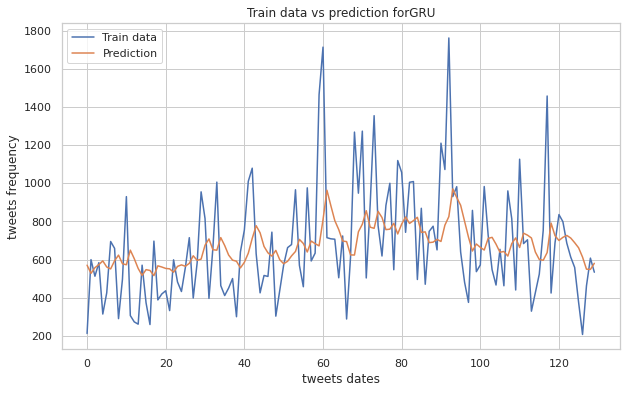

In [506]:
def prediction(model):
    prediction = model.predict(X_train)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)

# Plot test data vs prediction
def plot_future(prediction, model_name, y_train):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_train), 
             label="Train data")
    plt.plot(np.arange(range_future), 
             np.array(prediction),label="Prediction")
    plt.title("Train data vs prediction for" + model_name)
    plt.legend(loc="upper left")
    plt.xlabel("tweets dates")
    plt.ylabel("tweets frequency")
 
plot_future(prediction_gru, "GRU", y_train)

In [507]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ":")
    print("Mean Absolute Error: {:.4f}".format(mae))
    print("Root Mean Square Error: {:.4f}".format(rmse))
    print("")
evaluate_prediction(prediction_gru, y_train, "GRU")

GRU:
Mean Absolute Error: 214.4968
Root Mean Square Error: 276.8999



1/1 [==============================] - 0s 21ms/step


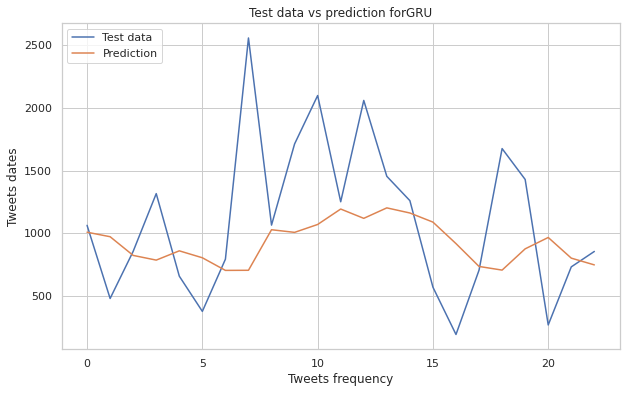

In [508]:
# Make prediction
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)
#prediction_bilstm = prediction(model_bilstm)
# Plot test data vs prediction
def plot_future(prediction, model_name, y_test):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), 
             label= "Test data")
    plt.plot(np.arange(range_future), 
             np.array(prediction),label="Prediction")
    plt.title("Test data vs prediction for" + model_name)
    plt.legend(loc="upper left")
    plt.xlabel("Tweets frequency")
    plt.ylabel("Tweets dates")
 
plot_future(prediction_gru, "GRU", y_test)

In [509]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ":")
    print("Mean Absolute Error: {:.4f}".format(mae))
    print("Root Mean Square Error: {:.4f}".format(rmse))
    print("")
evaluate_prediction(prediction_gru, y_test, "GRU")

GRU:
Mean Absolute Error: 455.1012
Root Mean Square Error: 634.0726



In [510]:
#left leaning likes prediction

In [511]:
train_size = int(len(left_leaning_likes_gru)*0.8)

train_data = left_leaning_likes_gru.iloc[:train_size]
test_data = left_leaning_likes_gru.iloc[train_size:]

In [512]:
scaler = MinMaxScaler().fit(train_data)
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

In [513]:
def create_dataset (X, look_back = 1):
    Xs, ys = [], []
 
    for i in range(len(X)-look_back):
        v = X[i:i+look_back]
        Xs.append(v)
        ys.append(X[i+look_back])
 
    return np.array(Xs), np.array(ys)
LOOK_BACK = 14
X_train, y_train = create_dataset(train_scaled,LOOK_BACK)
X_test, y_test = create_dataset(test_scaled,LOOK_BACK)
# Print data shape
print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
print("X_test.shape: ", X_test.shape) 
print("y_test.shape: ", y_test.shape)

X_train.shape:  (130, 14, 1)
y_train.shape:  (130, 1)
X_test.shape:  (23, 14, 1)
y_test.shape:  (23, 1)


In [514]:
# Create GRU model
def create_gru(units):
    model = Sequential()
    # Input layer
    model.add(GRU (units = units, return_sequences = True, 
    input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2)) 
    # Hidden layer
    model.add(GRU(units = units)) 
    model.add(Dropout(0.2))
    model.add(Dense(units = 1)) 
    #Compile model
    model.compile(optimizer="adam",loss="mse")
    return model
model_gru = create_gru(64)

In [515]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = "val_loss",
                                               patience = 10)
    history = model.fit(X_train, y_train, epochs = 100,  
                        validation_split = 0.2,
                        batch_size = 16, shuffle = False, 
                        callbacks = [early_stop])
    return history
history_gru = fit_model(model_gru)

Epoch 1/100
7/7 [==============================] - 3s 97ms/step - loss: 0.0916 - val_loss: 0.0530
Epoch 2/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0495 - val_loss: 0.0552
Epoch 3/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0381 - val_loss: 0.0442
Epoch 4/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0388 - val_loss: 0.0439
Epoch 5/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0375 - val_loss: 0.0465
Epoch 6/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0342 - val_loss: 0.0478
Epoch 7/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0357 - val_loss: 0.0451
Epoch 8/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0326 - val_loss: 0.0446
Epoch 9/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0336 - val_loss: 0.0458
Epoch 10/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0344 - val_loss: 0.0461
Epoch 11/100
7/7 [=

In [516]:
y_test = scaler.inverse_transform(y_test)
y_train = scaler.inverse_transform(y_train)

5/5 [==============================] - 0s 3ms/step


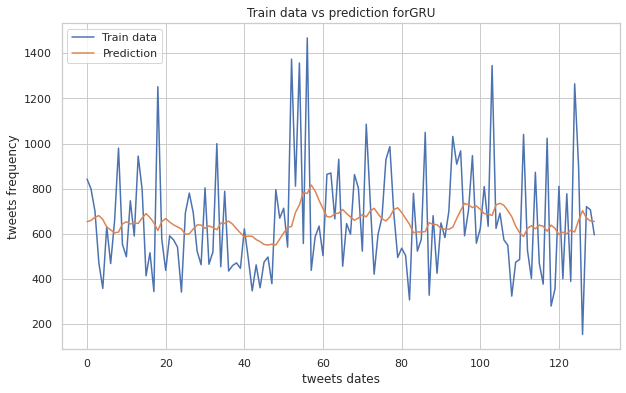

In [517]:
def prediction(model):
    prediction = model.predict(X_train)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)

# Plot test data vs prediction
def plot_future(prediction, model_name, y_train):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_train), 
             label="Train data")
    plt.plot(np.arange(range_future), 
             np.array(prediction),label="Prediction")
    plt.title("Train data vs prediction for" + model_name)
    plt.legend(loc="upper left")
    plt.xlabel("tweets dates")
    plt.ylabel("tweets frequency")
 
plot_future(prediction_gru, "GRU", y_train)

In [518]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ":")
    print("Mean Absolute Error: {:.4f}".format(mae))
    print("Root Mean Square Error: {:.4f}".format(rmse))
    print("")
evaluate_prediction(prediction_gru, y_train, "GRU")

GRU:
Mean Absolute Error: 196.0885
Root Mean Square Error: 246.4280



1/1 [==============================] - 0s 21ms/step


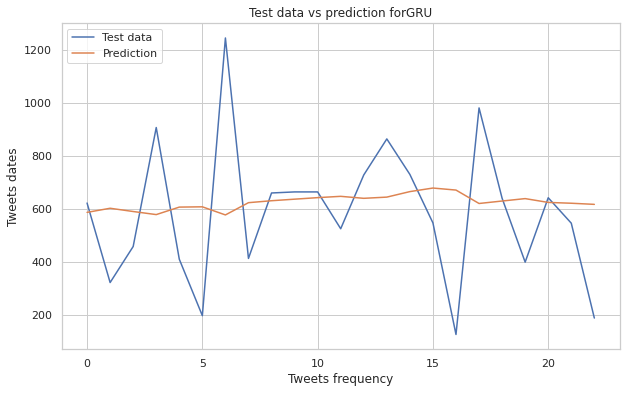

In [519]:
# Make prediction
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)
#prediction_bilstm = prediction(model_bilstm)
# Plot test data vs prediction
def plot_future(prediction, model_name, y_test):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), 
             label= "Test data")
    plt.plot(np.arange(range_future), 
             np.array(prediction),label="Prediction")
    plt.title("Test data vs prediction for" + model_name)
    plt.legend(loc="upper left")
    plt.xlabel("Tweets frequency")
    plt.ylabel("Tweets dates")
 
plot_future(prediction_gru, "GRU", y_test)

In [520]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ":")
    print("Mean Absolute Error: {:.4f}".format(mae))
    print("Root Mean Square Error: {:.4f}".format(rmse))
    print("")
evaluate_prediction(prediction_gru, y_test, "GRU")

GRU:
Mean Absolute Error: 201.9282
Root Mean Square Error: 269.6406



In [521]:
#right leaning likes forecasting

In [522]:
train_size = int(len(right_leaning_likes_gru)*0.8)

train_data = right_leaning_likes_gru.iloc[:train_size]
test_data = right_leaning_likes_gru.iloc[train_size:]

In [523]:
scaler = MinMaxScaler().fit(train_data)
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

In [524]:
def create_dataset (X, look_back = 1):
    Xs, ys = [], []
 
    for i in range(len(X)-look_back):
        v = X[i:i+look_back]
        Xs.append(v)
        ys.append(X[i+look_back])
 
    return np.array(Xs), np.array(ys)
LOOK_BACK = 14
X_train, y_train = create_dataset(train_scaled,LOOK_BACK)
X_test, y_test = create_dataset(test_scaled,LOOK_BACK)
# Print data shape
print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
print("X_test.shape: ", X_test.shape) 
print("y_test.shape: ", y_test.shape)

X_train.shape:  (130, 14, 1)
y_train.shape:  (130, 1)
X_test.shape:  (23, 14, 1)
y_test.shape:  (23, 1)


In [525]:
# Create GRU model
def create_gru(units):
    model = Sequential()
    # Input layer
    model.add(GRU (units = units, return_sequences = True, 
    input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2)) 
    # Hidden layer
    model.add(GRU(units = units)) 
    model.add(Dropout(0.2))
    model.add(Dense(units = 1)) 
    #Compile model
    model.compile(optimizer="adam",loss="mse")
    return model
model_gru = create_gru(64)

In [526]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = "val_loss",
                                               patience = 10)
    history = model.fit(X_train, y_train, epochs = 100,  
                        validation_split = 0.2,
                        batch_size = 16, shuffle = False, 
                        callbacks = [early_stop])
    return history
history_gru = fit_model(model_gru)

Epoch 1/100
7/7 [==============================] - 3s 96ms/step - loss: 0.0449 - val_loss: 0.0540
Epoch 2/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0341 - val_loss: 0.0449
Epoch 3/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0333 - val_loss: 0.0454
Epoch 4/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0301 - val_loss: 0.0444
Epoch 5/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0302 - val_loss: 0.0433
Epoch 6/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0329 - val_loss: 0.0439
Epoch 7/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0267 - val_loss: 0.0430
Epoch 8/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0308 - val_loss: 0.0429
Epoch 9/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0308 - val_loss: 0.0429
Epoch 10/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0287 - val_loss: 0.0428
Epoch 11/100
7/7 [=

In [527]:
y_test = scaler.inverse_transform(y_test)
y_train = scaler.inverse_transform(y_train)

5/5 [==============================] - 0s 3ms/step


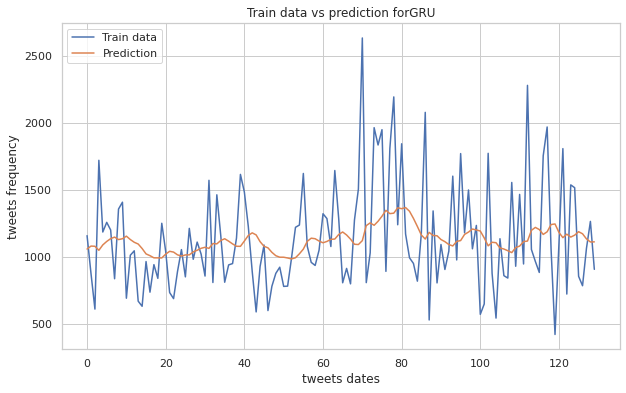

In [528]:
def prediction(model):
    prediction = model.predict(X_train)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)

# Plot test data vs prediction
def plot_future(prediction, model_name, y_train):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_train), 
             label="Train data")
    plt.plot(np.arange(range_future), 
             np.array(prediction),label="Prediction")
    plt.title("Train data vs prediction for" + model_name)
    plt.legend(loc="upper left")
    plt.xlabel("tweets dates")
    plt.ylabel("tweets frequency")
 
plot_future(prediction_gru, "GRU", y_train)

In [529]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ":")
    print("Mean Absolute Error: {:.4f}".format(mae))
    print("Root Mean Square Error: {:.4f}".format(rmse))
    print("")
evaluate_prediction(prediction_gru, y_train, "GRU")

GRU:
Mean Absolute Error: 303.6063
Root Mean Square Error: 390.5973



1/1 [==============================] - 0s 25ms/step


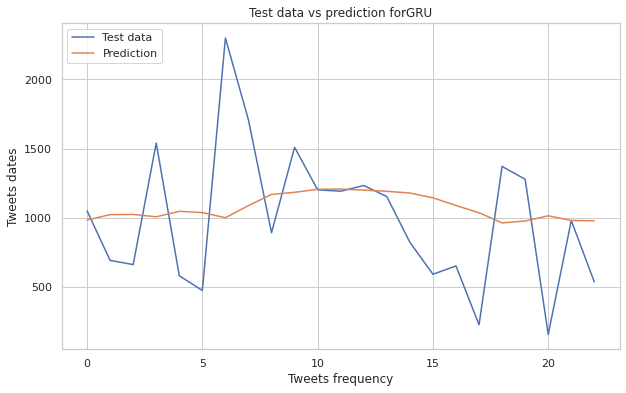

In [530]:
# Make prediction
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)
#prediction_bilstm = prediction(model_bilstm)
# Plot test data vs prediction
def plot_future(prediction, model_name, y_test):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), 
             label= "Test data")
    plt.plot(np.arange(range_future), 
             np.array(prediction),label="Prediction")
    plt.title("Test data vs prediction for" + model_name)
    plt.legend(loc="upper left")
    plt.xlabel("Tweets frequency")
    plt.ylabel("Tweets dates")
 
plot_future(prediction_gru, "GRU", y_test)

In [531]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ":")
    print("Mean Absolute Error: {:.4f}".format(mae))
    print("Root Mean Square Error: {:.4f}".format(rmse))
    print("")
evaluate_prediction(prediction_gru, y_test, "GRU")

GRU:
Mean Absolute Error: 395.3879
Root Mean Square Error: 501.3459

